<a href="https://www.kaggle.com/code/jonasheinicke/infectious-disease-prediction?scriptVersionId=185346372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Experiment I

In [2]:
import pandas as pd

# Replace the file path with the actual path to your CSV file
# file_path = "/content/Infectious Disease 2001-2014.csv"
file_path = "Infectious Disease 2001-2014.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Get some basic information about the dataset
print(df.info())


     Disease      County  Year     Sex  Count  Population   Rate  CI.lower  \
0  Amebiasis  California  2001   Total    571    34514777  1.654     1.521   
1  Amebiasis  California  2001  Female    176    17340743  1.015     0.871   
2  Amebiasis  California  2001    Male    365    17174034  2.125     1.913   
3  Amebiasis  California  2002   Total    442    34940334  1.265     1.150   
4  Amebiasis  California  2002  Female    145    17555714  0.826     0.697   

   CI.upper Unstable  
0     1.796           
1     1.176           
2     2.355           
3     1.389           
4     0.972           
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141777 entries, 0 to 141776
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Disease     141777 non-null  object 
 1   County      141777 non-null  object 
 2   Year        141777 non-null  int64  
 3   Sex         141777 non-null  object 
 4   Count       141777 non-nu

In [3]:

#pd.set_option('display.max_seq_items', None)
#pd.set_option('display.max_rows', None)
disease_categories = {
    'Amebiasis': 'Parasitic Infections',
    'Anaplasmosis and Ehrlichiosis': 'Bacterial Infections',
    'Babesiosis': 'Parasitic Infections',
    'Botulism, Foodborne': 'Bacterial Infections',
    'Botulism, Other': 'Bacterial Infections',
    'Botulism, Wound': 'Bacterial Infections',
    'Brucellosis': 'Bacterial Infections',
    'Campylobacteriosis': 'Bacterial Infections',
    'Chlamydia': 'Bacterial Infections',
    'Cholera': 'Bacterial Infections',
    'Ciguatera Fish Poisoning': 'Toxin-Related Conditions',
    'Coccidioidomycosis': 'Fungal Infections',
    'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies': 'Other',
    'Cryptosporidiosis': 'Parasitic Infections',
    'Cyclosporiasis': 'Parasitic Infections',
    'Cysticercosis or Taeniasis': 'Parasitic Infections',
    'Dengue': 'Viral Infections',
    'Diphtheria': 'Bacterial Infections',
    'E. coli O157': 'Bacterial Infections',
    'E. coli Other STEC (non-O157)': 'Bacterial Infections',
    'Early Syphilis': 'Bacterial Infections',
    'Giardiasis': 'Parasitic Infections',
    'Gonorrhea': 'Bacterial Infections',
    'HIV': 'Viral Infections',
    'Hantavirus Infection': 'Viral Infections',
    'Hemolytic Uremic Syndrome': 'Other',
    'Hepatitis A': 'Viral Infections',
    'Hepatitis B, Acute': 'Viral Infections',
    'Hepatitis C, Acute': 'Viral Infections',
    'Hepatitis E, acute infection': 'Viral Infections',
    'Influenza Death (<65 years of age)': 'Viral Infections',
    'Invasive Meningococcal Disease': 'Bacterial Infections',
    'Legionellosis': 'Bacterial Infections',
    'Leprosy': 'Bacterial Infections',
    'Leptospirosis': 'Bacterial Infections',
    'Listeriosis': 'Bacterial Infections',
    'Lyme Disease': 'Bacterial Infections',
    'Malaria': 'Parasitic Infections',
    'Measles': 'Viral Infections',
    'Mumps': 'Viral Infections',
    'Paralytic Shellfish Poisoning': 'Toxin-Related Conditions',
    'Pertussis': 'Bacterial Infections',
    'Plague, human': 'Bacterial Infections',
    'Psittacosis': 'Bacterial Infections',
    'Q Fever': 'Bacterial Infections',
    'Rabies, human': 'Viral Infections',
    'Relapsing Fever': 'Bacterial Infections',
    'Rubella': 'Viral Infections',
    'Salmonellosis': 'Bacterial Infections',
    'Scombroid Fish Poisoning': 'Toxin-Related Conditions',
    'Shiga Toxin Positive Feces (without culture confirmation)': 'Other',
    'Shigellosis': 'Bacterial Infections',
    'Spotted Fever Rickettsiosis': 'Bacterial Infections',
    'Staphylococcus aureus Infection (cases resulting in death or ICU)': 'Bacterial Infections',
    'Streptococcal Infection (cases in food and dairy workers)': 'Bacterial Infections',
    'Tetanus': 'Bacterial Infections',
    'Toxic Shock Syndrome (Non-Streptococcal)': 'Other',
    'Trichinosis': 'Parasitic Infections',
    'Tuberculosis': 'Bacterial Infections',
    'Tularemia': 'Bacterial Infections',
    'Typhoid Fever, case': 'Bacterial Infections',
    'Typhus Fever': 'Bacterial Infections',
    'Varicella Hospitalizations': 'Viral Infections',
    'Vibrio Infection (non-Cholera)': 'Bacterial Infections',
    'Yersiniosis': 'Bacterial Infections'
}
disease_symptom_mapping = {
    'Amebiasis': 'Gastrointestinal',
    'Anaplasmosis and Ehrlichiosis': 'Systemic',
    'Babesiosis': 'Systemic',
    'Botulism, Foodborne': 'Neurological',
    'Botulism, Other': 'Neurological',
    'Botulism, Wound': 'Neurological',
    'Brucellosis': 'Systemic',
    'Campylobacteriosis': 'Gastrointestinal',
    'Chlamydia': 'STD',
    'Cholera': 'Gastrointestinal',
    'Ciguatera Fish Poisoning': 'Neurological',
    'Coccidioidomycosis': 'Respiratory',
    'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies': 'Neurological',
    'Cryptosporidiosis': 'Gastrointestinal',
    'Cyclosporiasis': 'Gastrointestinal',
    'Cysticercosis or Taeniasis': 'Neurological',
    'Dengue': 'Systemic',
    'Diphtheria': 'Respiratory',
    'E. coli O157': 'Gastrointestinal',
    'E. coli Other STEC (non-O157)': 'Gastrointestinal',
    'Early Syphilis': 'Skin/Soft Tissue',
    'Giardiasis': 'Gastrointestinal',
    'Gonorrhea': 'STD',
    'HIV': 'Systemic',
    'Hantavirus Infection': 'Respiratory',
    'Hemolytic Uremic Syndrome': 'Systemic',
    'Hepatitis A': 'Gastrointestinal',
    'Hepatitis B, Acute': 'Gastrointestinal',
    'Hepatitis C, Acute': 'Gastrointestinal',
    'Hepatitis E, acute infection': 'Gastrointestinal',
    'Influenza Death (<65 years of age)': 'Respiratory',
    'Invasive Meningococcal Disease': 'Neurological',
    'Legionellosis': 'Respiratory',
    'Leprosy': 'Skin/Soft Tissue',
    'Leptospirosis': 'Systemic',
    'Listeriosis': 'Gastrointestinal',
    'Lyme Disease': 'Skin/Soft Tissue',
    'Malaria': 'Systemic',
    'Measles': 'Skin/Soft Tissue',
    'Mumps': 'Systemic',
    'Paralytic Shellfish Poisoning': 'Neurological',
    'Pertussis': 'Respiratory',
    'Plague, human': 'Systemic',
    'Psittacosis': 'Respiratory',
    'Q Fever': 'Systemic',
    'Rabies, human': 'Neurological',
    'Relapsing Fever': 'Systemic',
    'Rubella': 'Skin/Soft Tissue',
    'Salmonellosis': 'Gastrointestinal',
    'Scombroid Fish Poisoning': 'Neurological',
    'Shiga Toxin Positive Feces (without culture confirmation)': 'Gastrointestinal',
    'Shigellosis': 'Gastrointestinal',
    'Spotted Fever Rickettsiosis': 'Skin/Soft Tissue',
    'Staphylococcus aureus Infection (cases resulting in death or ICU)': 'Skin/Soft Tissue',
    'Streptococcal Infection (cases in food and dairy workers)': 'Skin/Soft Tissue',
    'Tetanus': 'Neurological',
    'Toxic Shock Syndrome (Non-Streptococcal)': 'Systemic',
    'Trichinosis': 'Neurological',
    'Tuberculosis': 'Respiratory',
    'Tularemia': 'Systemic',
    'Typhoid Fever, case': 'Gastrointestinal',
    'Typhus Fever': 'Systemic',
    'Varicella Hospitalizations': 'Skin/Soft Tissue',
    'Vibrio Infection (non-Cholera)': 'Gastrointestinal',
    'Yersiniosis': 'Gastrointestinal'
}
disease_mapping = {
    'Botulism, Foodborne': 'Botulism',
    'Botulism, Other': 'Botulism',
    'Botulism, Wound': 'Botulism',
    'Ciguatera Fish Poisoning': 'Fish Poisoning',
    'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies': 'Creutzfeldt-Jakob Disease',
    'E. coli O157': 'E. coli',
    'E. coli Other STEC (non-O157)': 'E. coli',
    'Early Syphilis': 'Syphilis',
    'Hantavirus Infection': 'Hantavirus',
    'Hepatitis A': 'Hepatitis',
    'Hepatitis B, Acute': 'Hepatitis',
    'Hepatitis C, Acute': 'Hepatitis',
    'Hepatitis E, acute infection': 'Hepatitis',
    'Influenza Death (<65 years of age)': 'Influenza',
    'Invasive Meningococcal Disease': 'Meningococcal Disease',
    'Paralytic Shellfish Poisoning': 'Shellfish Poisoning',
    'Plague, human': 'Plague',
    'Scombroid Fish Poisoning':'Fish Poisoning',
    'Shiga Toxin Positive Feces (without culture confirmation)': 'Shiga Toxin Positive Feces',
    'Staphylococcus aureus Infection (cases resulting in death or ICU)': 'Staphylococcus aureus Infection',
    'Streptococcal Infection (cases in food and dairy workers)': 'Streptococcal Infection',
    'Toxic Shock Syndrome (Non-Streptococcal)': 'Toxic Shock Syndrome',
    'Varicella Hospitalizations': 'Varicella',
    'Vibrio Infection (non-Cholera)': 'Vibrio Infection'
}
# Apply the mapping to create a new column with disease categories
df['Disease_Category'] = df['Disease'].map(disease_categories)
# Apply the mapping to create a new column with disease categories
df['Symptom_Category'] = df['Disease'].map(disease_symptom_mapping)

df['Disease'] = df['Disease'].replace(disease_mapping)

In [4]:
mean_rates = df.groupby('Disease', observed= True)['Rate'].mean().reset_index()

# Filter diseases with a mean rate >= 1
filtered_diseases = mean_rates[mean_rates['Rate'] >= 1]['Disease']

original_df = df
#Filter out low rate diseases
low_df = df[~df['Disease'].isin(filtered_diseases)].dropna()
# Filter the original DataFrame to include only those diseases
df = df[df['Disease'].isin(filtered_diseases)].dropna()

In [5]:
df.rename(columns={'country': 'Country'}, inplace=True)

In [6]:
df.columns

Index(['Disease', 'County', 'Year', 'Sex', 'Count', 'Population', 'Rate',
       'CI.lower', 'CI.upper', 'Unstable', 'Disease_Category',
       'Symptom_Category'],
      dtype='object')

In [7]:
# Convert appropriate columns to 'category'
df['Disease'] = df['Disease'].astype('category')
df['Symptom_Category'] = df['Symptom_Category'].astype('category')
df['Disease'] = df['Disease'].astype('category')
df['County'] = df['County'].astype('category')
df['Sex'] = df['Sex'].astype('category')

# Downcast integer columns to more memory-efficient types
df['Year'] = df['Year'].astype('int16')
df['Count'] = df['Count'].astype('int32')
df['Population'] = df['Population'].astype('int32')

# Downcast float columns to more memory-efficient types
df['CI.lower'] = df['CI.lower'].astype('int16')
df['CI.upper'] = df['CI.upper'].astype('int16')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33807 entries, 13099 to 128540
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Disease           33807 non-null  category
 1   County            33807 non-null  category
 2   Year              33807 non-null  int16   
 3   Sex               33807 non-null  category
 4   Count             33807 non-null  int32   
 5   Population        33807 non-null  int32   
 6   Rate              33807 non-null  float64 
 7   CI.lower          33807 non-null  int16   
 8   CI.upper          33807 non-null  int16   
 9   Unstable          33807 non-null  object  
 10  Disease_Category  33807 non-null  object  
 11  Symptom_Category  33807 non-null  category
dtypes: category(4), float64(1), int16(3), int32(2), object(2)
memory usage: 1.6+ MB


In [8]:
df.shape

(33807, 12)

In [9]:
df.groupby('Disease')['Rate'].mean().sort_values(ascending = False)

C:\Users\User\AppData\Local\Temp\ipykernel_8660\4144101224.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Disease')['Rate'].mean().sort_values(ascending = False)


Disease
Chlamydia             275.345092
Gonorrhea              47.622734
Campylobacteriosis     16.290539
Salmonellosis          10.923956
Coccidioidomycosis      8.401839
Pertussis               8.329953
HIV                     6.589859
Giardiasis              5.973667
Syphilis                4.259421
Tuberculosis            4.192651
Shigellosis             3.016100
Cryptosporidiosis       1.164381
E. coli                 1.004362
Name: Rate, dtype: float64

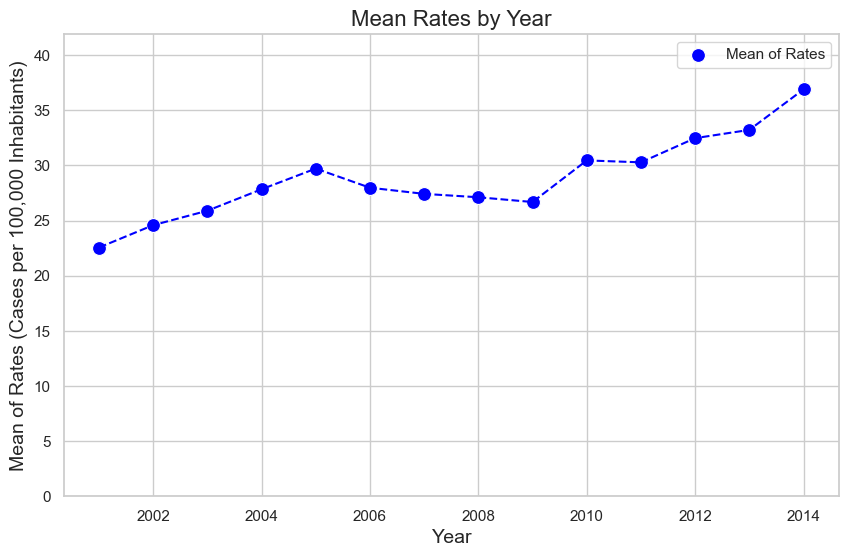

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Year' and calculate the mean 'Rate'
df_Rate_Year = df.groupby('Year')['Rate'].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Rate_Year, x='Year', y='Rate', s=100, color='blue', marker='o', label='Mean of Rates')
sns.lineplot(data=df_Rate_Year, x='Year', y='Rate', color='blue', linestyle='--')

# Set the y-axis to start from 0
plt.ylim(0, df_Rate_Year['Rate'].max() + 5)

# Add titles and labels
plt.title('Mean Rates by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean of Rates (Cases per 100,000 Inhabitants)', fontsize=14)

plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3009571285.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  county_year_df = df.groupby(['County', 'Year'])[['Rate']].mean().reset_index()


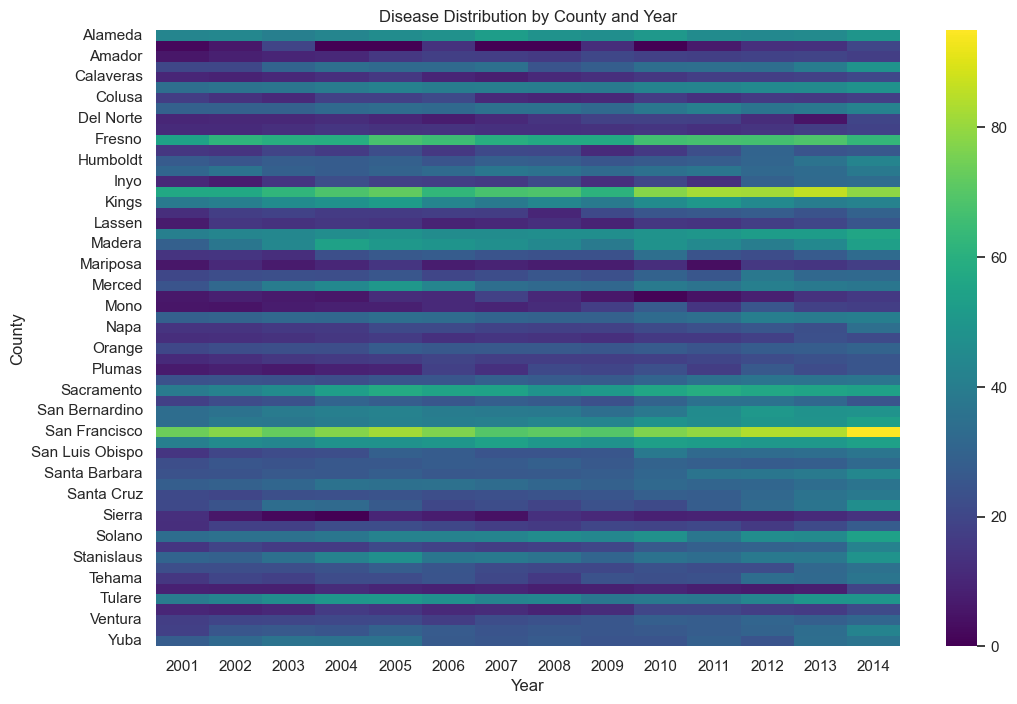

In [11]:
county_year_df = df.groupby(['County', 'Year'])[['Rate']].mean().reset_index()

# Pivot the table to get Rates by Year and County
county_year_pivot = county_year_df.pivot(columns='Year', index='County', values='Rate')

# Heatmap of disease distribution by County and Year
plt.figure(figsize=(12, 8))
sns.heatmap(county_year_pivot, cmap='viridis', annot=False)
plt.title('Disease Distribution by County and Year')
plt.show()

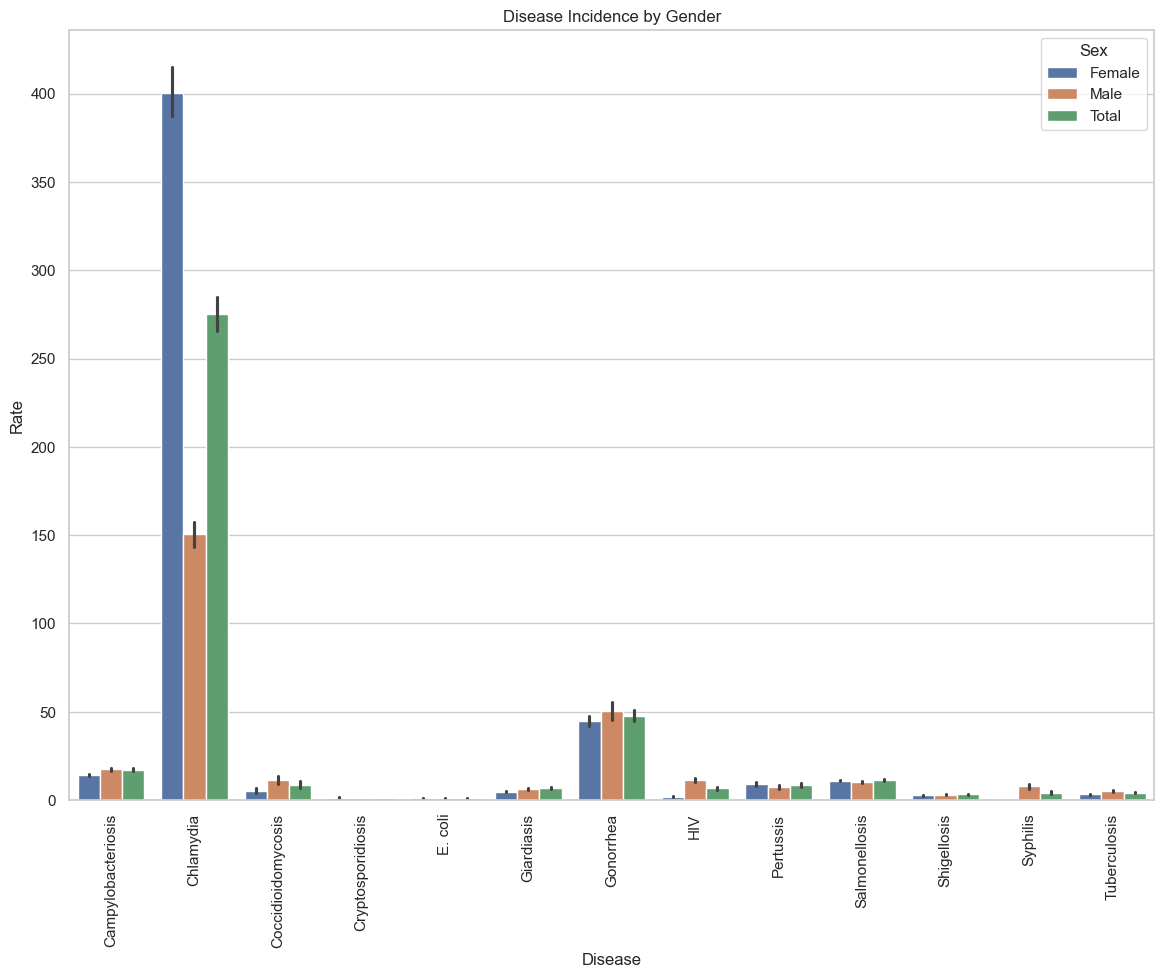

In [12]:
#gender_disease_df = df.groupby(['Disease', 'Sex'])['Rate'].sum().reset_index()

# Bar plot of disease incidence by gender
plt.figure(figsize=(14, 10))
sns.barplot(data=df, x='Disease', y='Rate', hue='Sex')
#plt.yscale("log")
plt.xticks(rotation=90)
plt.title('Disease Incidence by Gender')
plt.show()

d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is dep

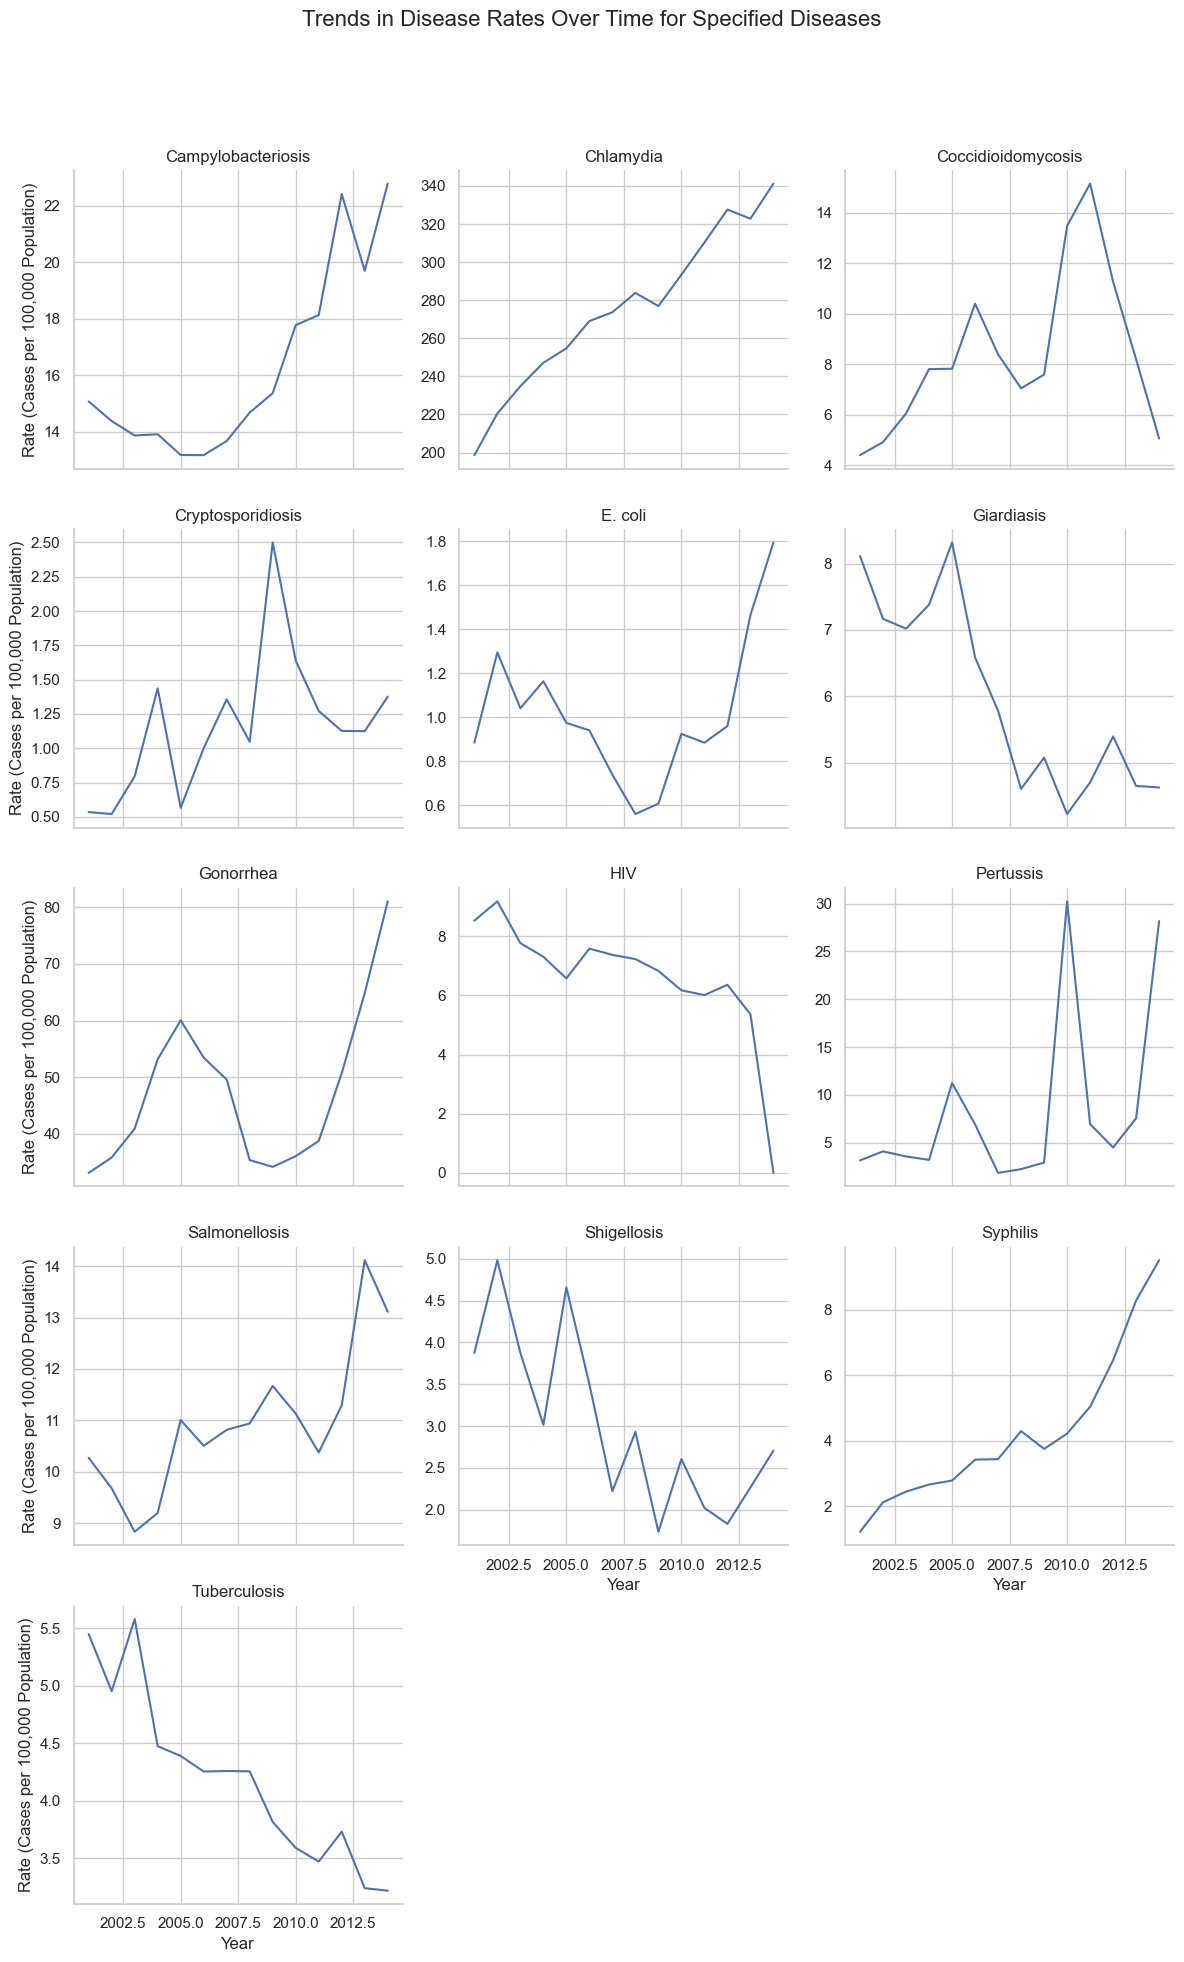

In [13]:
g = sns.FacetGrid(df, col="Disease", col_wrap=3, height=4, sharey=False)

# Map the line plot to each facet
g = g.map(sns.lineplot, "Year", "Rate", ci=None).set_titles("{col_name}")

# Set common axis labels
g.set_axis_labels("Year", "Rate (Cases per 100,000 Population)")

# Adjust the title to be above the plots
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trends in Disease Rates Over Time for Specified Diseases', fontsize=16)

# Show the plot
plt.show()

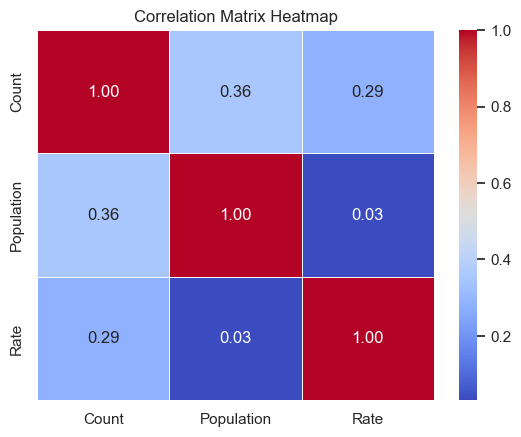

In [14]:
numerical_cols = ["Count", "Population", "Rate"]

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
display(df['Disease_Category'].value_counts())

Disease_Category
Bacterial Infections    23895
Parasitic Infections     4956
Fungal Infections        2478
Viral Infections         2478
Name: count, dtype: int64

Detailed Description of the Distribution of Data by Year and Sex Chart

This chart is a FacetGrid visualization generated using the seaborn and matplotlib libraries. It presents the frequency distribution of data entries across different years (from 2001 to 2014), broken down by the 'Sex' column in the dataset.

Structure: The chart is divided into three individual plots, arranged side-by-side. Each plot corresponds to a unique value in the 'Sex' column: 'Female', 'Male', and 'Total'.
X-axis (Year): The horizontal axis of each plot represents the 'Year' of the data entry. The bins on the histogram are set to cover each year from the minimum to the maximum year in the dataset, providing a clear view of the frequency for each specific year.
Y-axis (Frequency): The vertical axis of each plot indicates the 'Frequency', which is the count of data entries for each corresponding year.
Histograms: Within each facet (panel), a histogram is plotted. The height of each bar in the histogram shows how many data points exist for that particular year and sex category. The kde=False argument ensures that a Kernel Density Estimate line is not overlaid on the histogram, focusing solely on the raw counts per year.
Titles and Labels:
Each individual plot is titled with the specific 'Sex' it represents (e.g., "Sex: Female").
The common x-axis label is "Year", and the common y-axis label is "Frequency".
A main title, "Distribution of Data by Year and Sex", is placed at the top of the entire figure for overall context.
Insights: This chart allows for a visual comparison of the volume of data available for each gender over the years. You can observe:
How the total number of data entries changes year by year.
Whether the data collection or incidence rates for 'Female' and 'Male' follow similar patterns over time.
If there are any years with unusually high or low frequencies for a specific gender, which might warrant further investigation.
In summary, this visualization is effective for understanding the temporal distribution of the dataset and identifying any potential disparities or trends in data representation between different sex categories over the period covered by the data.

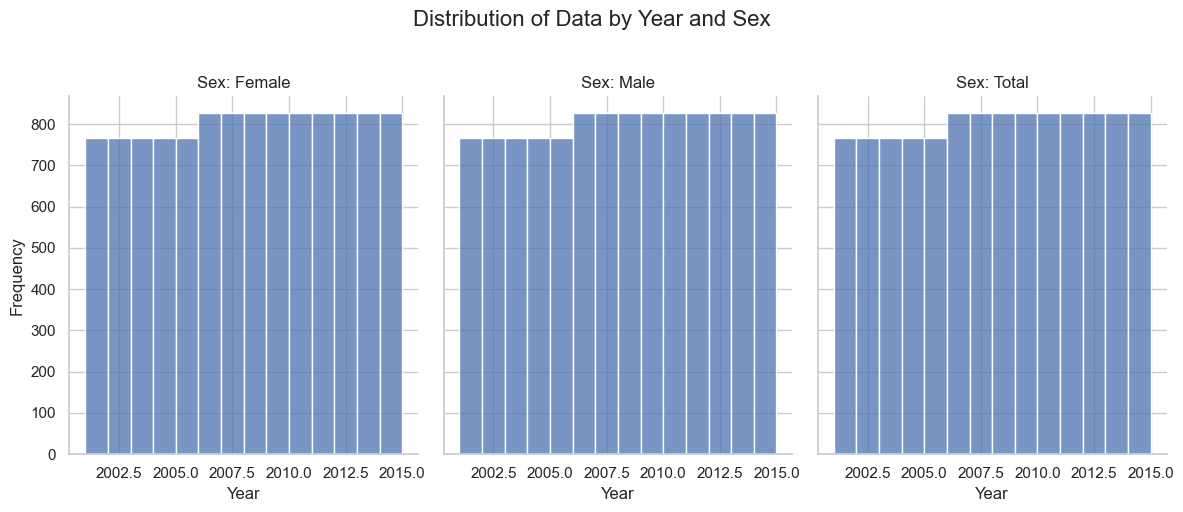

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid to show the distribution of 'Year' for each 'Sex'
g = sns.FacetGrid(df, col="Sex", height=5, aspect=0.8)

# Map a histogram to each facet
g.map(sns.histplot, "Year", bins=range(df['Year'].min(), df['Year'].max() + 2), kde=False)

# Set titles and labels
g.set_titles("Sex: {col_name}")
g.set_axis_labels("Year", "Frequency")

plt.suptitle("Distribution of Data by Year and Sex", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

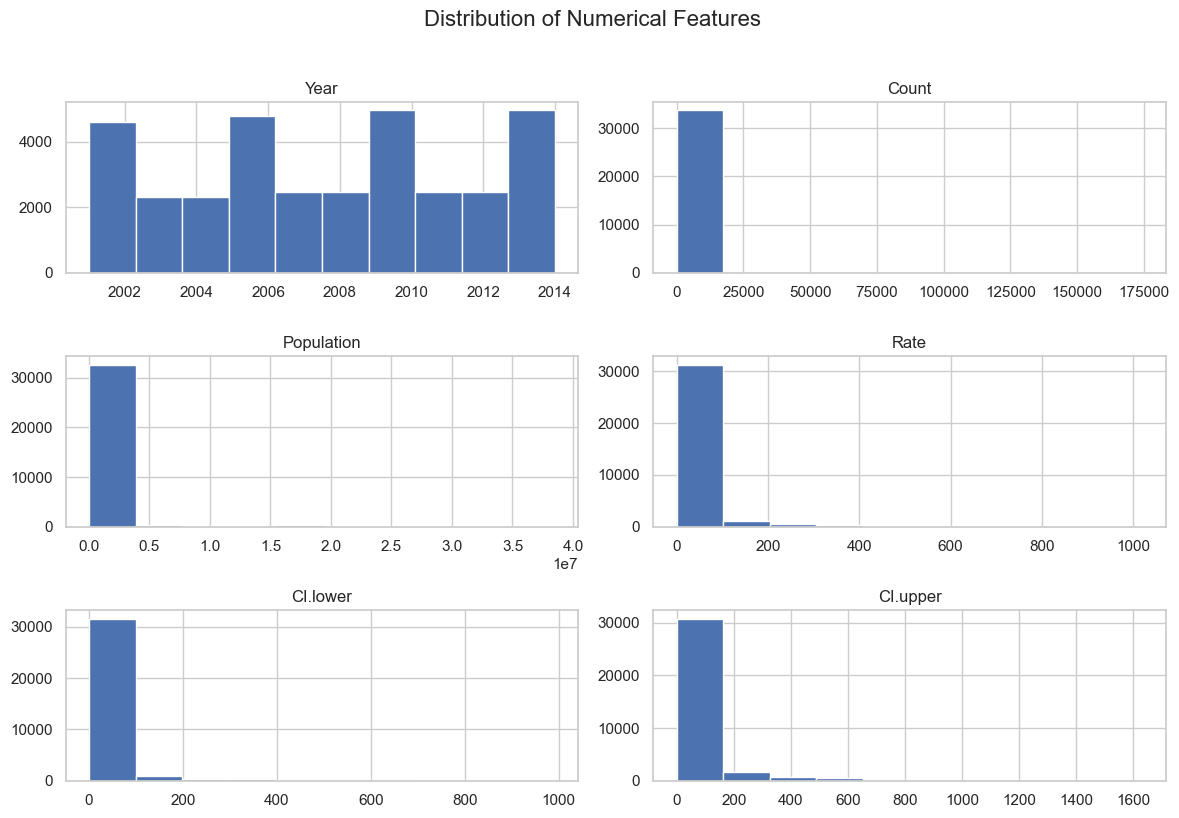

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for plotting
numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int16', 'int32']).columns

# Plot histograms for each numerical column
df[numerical_cols].hist(figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


# Regression Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
categorical_features = ["Disease", "County", "Sex"]
numerical_features = ["Year", "Population", "Rate"]

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Set 'Disease' as the target variable
y = df["Disease_Category"]

# Drop 'Disease' from features (not 'Symptom_Category')
X = df.drop("Disease", axis=1)



In [20]:
y

13099     Bacterial Infections
13100     Bacterial Infections
13101     Bacterial Infections
13102     Bacterial Infections
13103     Bacterial Infections
                  ...         
128536    Bacterial Infections
128537    Bacterial Infections
128538    Bacterial Infections
128539    Bacterial Infections
128540    Bacterial Infections
Name: Disease_Category, Length: 33807, dtype: object

#**Machine Learning Models**

## **RandomForest**

In [21]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, confusion_matrix, classification_report
)


In [22]:
# === Data Preprocessing ===
# Set 'Disease' as target
y = df["Disease_Category"].copy()
X = df.drop("Disease", axis=1).copy()

In [23]:
# Handle missing values - operate on the DataFrame X
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int16']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Fill missing values: mean for numerical, mode for categorical
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])


In [24]:
# Apply Label Encoding - operate on the DataFrame X
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target variable y as well, fitting on the full dataset labels first
# Store the original class names *before* splitting
original_class_names = label_encoder.fit(y).classes_
y_encoded = label_encoder.transform(y)


In [25]:
# Convert X to numpy array *after* handling missing values and encoding categorical features
X = X.values

# Standardize all features (since all are numeric now)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [26]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [27]:
# Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# Predictions
y_pred = model.predict(X_test)


In [29]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')  # Also sensitivity
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)

# Specificity is tricky in multi-class, so we’ll skip it here
specificity = None  # Placeholder


In [30]:
# Confusion Matrix and Mapping to Class Names
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
cm_class_names = [original_class_names[label] for label in unique_labels]

cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_classified = pd.DataFrame(cm, index=cm_class_names, columns=cm_class_names)

# Print metrics
print("RandomForestClassifier")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

# Confusion Matrix
print("\nConfusion Matrix (with Class Names):")
print(cm_classified)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=original_class_names, zero_division=0))


RandomForestClassifier
Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F1-Score: 1.0
Specificity: None
Matthews Correlation Coefficient (MCC): 1.0

Confusion Matrix (with Class Names):
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4779                  0   
Fungal Infections                        0                496   
Parasitic Infections                     0                  0   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                     0                 0  
Fungal Infections                        0                 0  
Parasitic Infections                   991                 0  
Viral Infections                         0               496  

Classification Report:
                      precision    recall  f1-score   support

Bacterial Infections       1.00      1.00      1.00      4779
   Fungal Infectio

**Confusion Matrix for Random Forest**

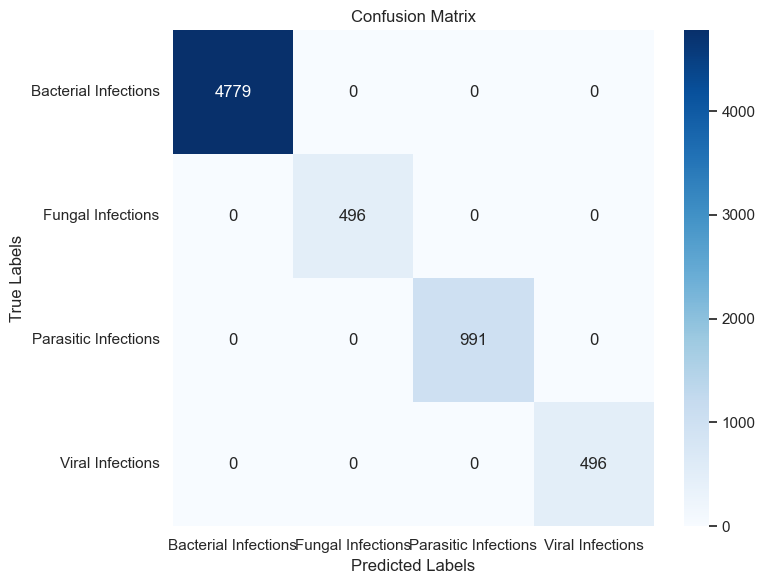

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Confusion matrix data
cm = np.array([
    [4779, 0,    0,    0],
    [0,    496,  0,    0],
    [0,    0,  991,    0],
    [0,    0,    0,  496]
])

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


##**RandomForest with Data Balancing**

In [32]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


**RandomForest with SMOTE**

In [33]:
# === Imports ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

# === Load Your Data ===
# df = pd.read_csv("your_dataset.csv")  # Uncomment & update with your file path

# === Data Preprocessing ===
# Set 'Disease' as target
y = df["Disease_Category"].copy()
X = df.drop("Disease_Category", axis=1).copy()

# Handle missing values
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int16']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode the target
target_encoder = LabelEncoder()
original_class_names = target_encoder.fit(y).classes_
y_encoded = target_encoder.transform(y)

# Convert X to NumPy and scale
X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# === Apply SMOTE ===
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# === Model Training ===
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# === Prediction ===
y_pred = model.predict(X_test)

# === Evaluation ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion Matrix
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
cm_class_names = [original_class_names[label] for label in unique_labels]
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_classified = pd.DataFrame(cm, index=cm_class_names, columns=cm_class_names)

# === Print Results ===
print("SMOTE - RandomForestClassifier")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

print("\nConfusion Matrix:")
print(cm_classified)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cm_class_names, zero_division=0))


SMOTE - RandomForestClassifier
Accuracy: 0.9995563442768411
Precision: 0.9995576832780178
Recall (Sensitivity): 0.9995563442768411
F1-Score: 0.9995566098853749
Matthews Correlation Coefficient (MCC): 0.9990536362331162

Confusion Matrix:
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4776                  0   
Fungal Infections                        0                496   
Parasitic Infections                     0                  0   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                     3                 0  
Fungal Infections                        0                 0  
Parasitic Infections                   991                 0  
Viral Infections                         0               496  

Classification Report:
                      precision    recall  f1-score   support

Bacterial Infections       1.00   

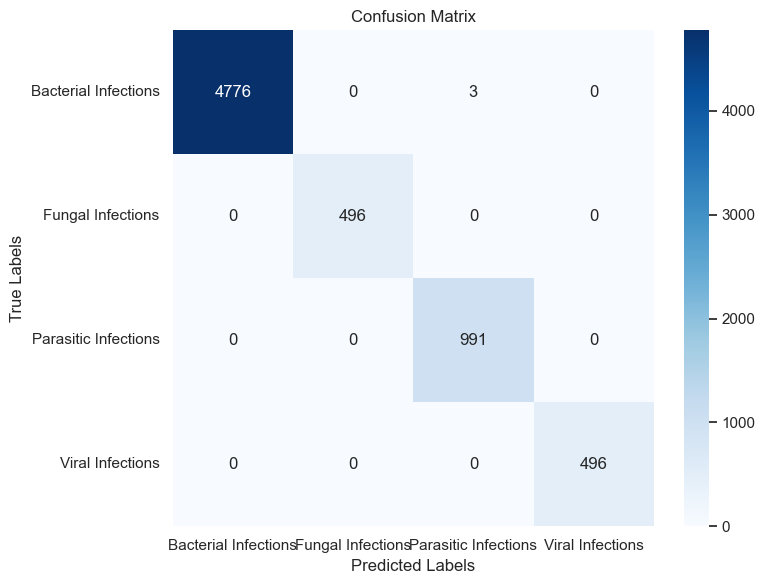

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Updated confusion matrix data
cm = np.array([
    [4776, 0,    3,    0],
    [0,    496,  0,    0],
    [0,    0,  991,    0],
    [0,    0,    0,  496]
])

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


##**CNN**

In [35]:
!pip install tensorflow

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [37]:
# Class names corresponding to the labels
original_class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

# Separate features and target
X = df.iloc[:, :-2].copy()
y = df.iloc[:, -2].copy()


In [38]:
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int16', 'int32']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X.loc[:, col] = X[col].fillna(X[col].mode()[0])


In [39]:
feature_label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])
    feature_label_encoders[col] = le

target_label_encoder = LabelEncoder()
y_encoded = target_label_encoder.fit_transform(y)


C:\Users\User\AppData\Local\Temp\ipykernel_8660\1921833053.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0  0  0 ... 12 12 12]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.loc[:, col] = le.fit_transform(X[col])
C:\Users\User\AppData\Local\Temp\ipykernel_8660\1921833053.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[39 39 39 ... 58 58 58]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.loc[:, col] = le.fit_transform(X[col])
C:\Users\User\AppData\Local\Temp\ipykernel_8660\1921833053.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 2 ... 2 0 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.loc[:, col] = le.fit_t

In [40]:
X_array = X.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)

y_one_hot = to_categorical(y_encoded)


In [41]:
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train_one_hot, y_test_one_hot = train_test_split(
    X_reshaped, y_one_hot, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train_eval, X_test_eval, y_train_encoded, y_test_encoded = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [42]:
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y_train_one_hot.shape[1], activation='softmax')
])


d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    X_train, y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test_one_hot)
)


Epoch 1/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7187 - loss: 0.6643 - val_accuracy: 0.8135 - val_loss: 0.4184
Epoch 2/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8441 - loss: 0.3398 - val_accuracy: 0.8715 - val_loss: 0.2725
Epoch 3/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8924 - loss: 0.2381 - val_accuracy: 0.9163 - val_loss: 0.1910
Epoch 4/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9087 - loss: 0.2005 - val_accuracy: 0.9227 - val_loss: 0.1942
Epoch 5/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9401 - loss: 0.1537 - val_accuracy: 0.9574 - val_loss: 0.1325
Epoch 6/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9657 - loss: 0.1169 - val_accuracy: 0.9848 - val_loss: 0.0755
Epoch 7/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9831 - loss: 0.0730 - val_accuracy: 0.9861 - val_loss: 0.0617
Epoch 8/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9911 - loss: 0.0395 - val_accuracy: 0

In [44]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_test_labels = y_test_encoded


212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [45]:
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test_labels, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test_labels, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test_labels, y_pred)


In [46]:
unique_labels = np.unique(np.concatenate((y_test_labels, y_pred)))
cm = confusion_matrix(y_test_labels, y_pred, labels=unique_labels)
cm_class_names = target_label_encoder.inverse_transform(unique_labels).tolist()

cm_classified = pd.DataFrame(cm, index=cm_class_names, columns=cm_class_names)
specificity = None  # Placeholder for now


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")
print("\nConfusion Matrix (with Class Names):")
print(cm_classified)


Accuracy: 0.9946761313220941
Precision: 0.994687729174164
Recall (Sensitivity): 0.9946761313220941
F1-Score: 0.9946771911623967
Specificity: None
Matthews Correlation Coefficient (MCC): 0.9886371368864705

Confusion Matrix (with Class Names):
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4762                  3   
Fungal Infections                        1                495   
Parasitic Infections                    14                  0   
Viral Infections                         1                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                     4                10  
Fungal Infections                        0                 0  
Parasitic Infections                   977                 0  
Viral Infections                         3               492  


# **Confusion Matrix for CNN**

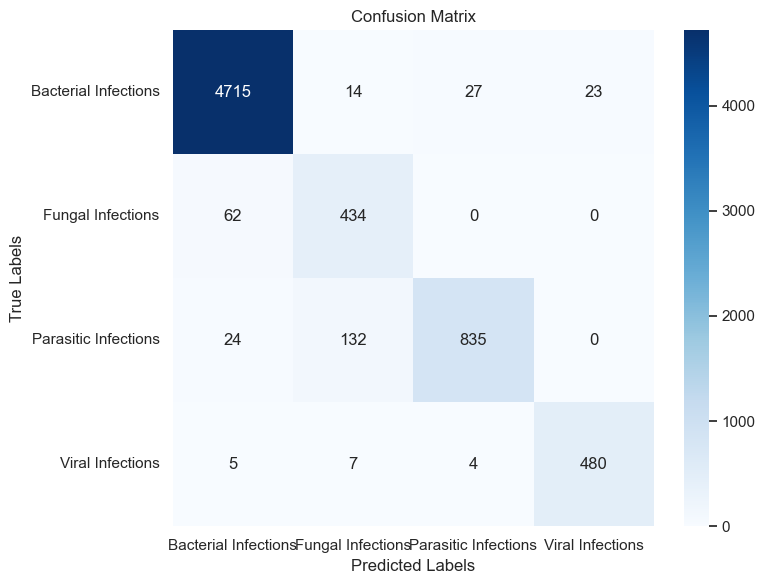

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# New confusion matrix data
cm = np.array([
    [4715, 14,  27,  23],
    [62,  434,   0,   0],
    [24,  132, 835,   0],
    [5,     7,   4, 480]
])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


##**Decision Tree**

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.over_sampling import SMOTE


In [49]:
# Features and target split
X = df.iloc[:, :-2]
y = df.iloc[:, -2]


In [50]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Fill missing values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])


In [51]:
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode target variable
y = label_encoder.fit_transform(y)

# Convert features to numpy array for modeling
X = X.values


In [52]:
# Stratify to keep class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [53]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [54]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [55]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
F1-Score: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000


In [56]:


print("\nConfusion Matrix:")
print(cm_classified)

print("\nClassification Report:")
print(classification_report(
    y_test_labels, y_pred,
    target_names=original_class_names,
    labels=unique_labels,
    zero_division=0
))



Confusion Matrix:
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4762                  3   
Fungal Infections                        1                495   
Parasitic Infections                    14                  0   
Viral Infections                         1                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                     4                10  
Fungal Infections                        0                 0  
Parasitic Infections                   977                 0  
Viral Infections                         3               492  

Classification Report:
                  precision    recall  f1-score   support

Gastrointestinal       1.00      1.00      1.00      4779
     Respiratory       1.00      1.00      1.00       496
             STD       1.00      1.00      1.00       991
Skin/Soft Tissue       1.00      1.00      1.00       496

        accuracy        

d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:2964: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


# **Decision Tree Confusion Matrix**

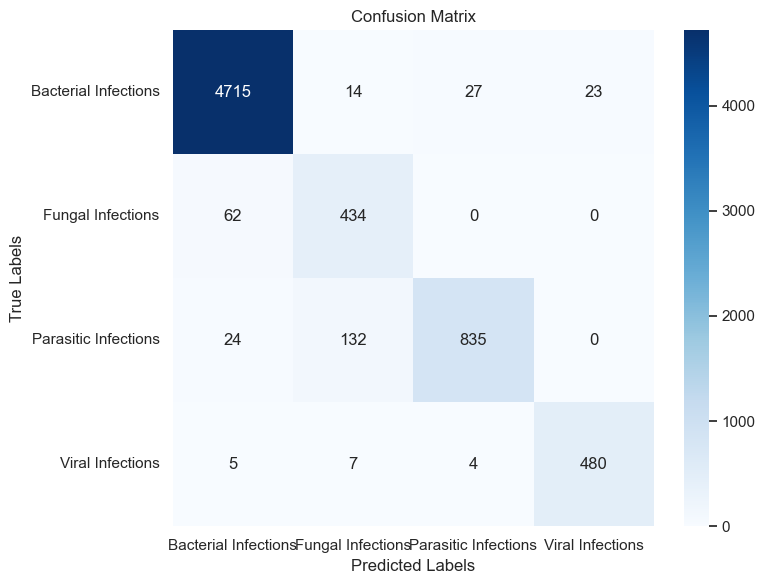

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Confusion matrix data
cm = np.array([
    [4715, 14,  27,  23],
    [62,  434,   0,   0],
    [24,  132, 835,   0],
    [5,     7,   4, 480]
])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


## **Decision Tree with Data Balancing**

**Decision Tree with SMOTE**

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.over_sampling import SMOTE

# === 1. Split features & target ===
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

# === 2. Handle missing values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === 3. Encode categorical features ===
feature_label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = feature_label_encoder.fit_transform(X[col])

# === 4. Encode target labels ===
target_label_encoder = LabelEncoder()
y = target_label_encoder.fit_transform(y)

# === 5. Train-test split (before SMOTE) ===
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.2, random_state=42, stratify=y
)

# === 6. Apply SMOTE only to the training set ===
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# === 7. Train classifier ===
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# === 8. Predict & evaluate ===
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

# === 9. Confusion Matrix & Report ===
# Get unique labels from the test set and predictions
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Get the corresponding class names using the fitted target_label_encoder
class_names = target_label_encoder.inverse_transform(unique_labels).tolist()

# Generate the confusion matrix with the unique labels
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print("\nConfusion Matrix:")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
F1-Score: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000

Confusion Matrix:
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4779                  0   
Fungal Infections                        0                496   
Parasitic Infections                     0                  0   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                     0                 0  
Fungal Infections                        0                 0  
Parasitic Infections                   991                 0  
Viral Infections                         0               496  

Classification Report:
                      precision    recall  f1-score   support

Bacterial Infections       1.00      1.00      1.00      4779
   Fungal Infections       1.00      1.00      1.00       496
P

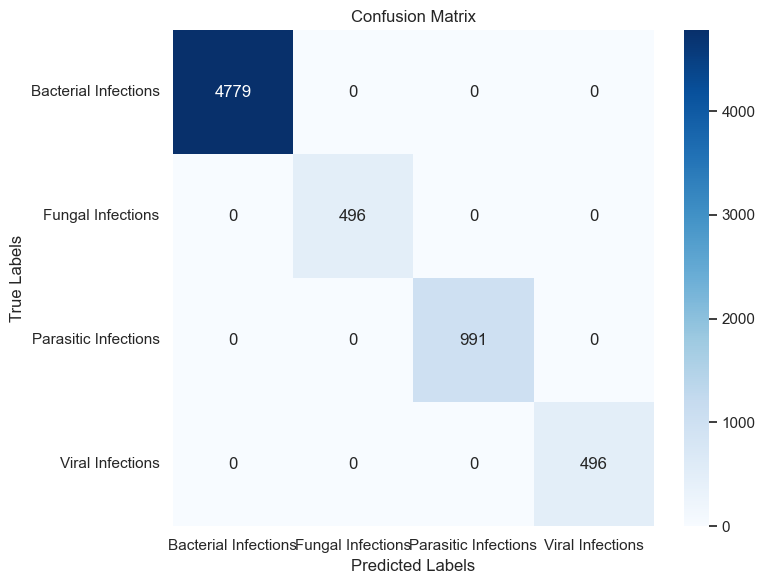

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Confusion matrix data
cm = np.array([
    [4779, 0,    0,    0],
    [0,    496,  0,    0],
    [0,    0,  991,    0],
    [0,    0,    0,  496]
])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


**Decision Tree with Random Under Sampler**

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.under_sampling import RandomUnderSampler  # ⬅️ using RUS now

# === 1. Split features & target ===
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

# === 2. Handle missing values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === 3. Encode categorical features ===
feature_label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = feature_label_encoder.fit_transform(X[col])

# === 4. Encode target labels ===
target_label_encoder = LabelEncoder()
y = target_label_encoder.fit_transform(y)

# === 5. Train-test split (before under-sampling) ===
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.2, random_state=42, stratify=y
)

# === 6. Apply Random Under Sampler ===
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

# === 7. Train classifier ===
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# === 8. Predict & evaluate ===
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

# === 9. Confusion Matrix & Report ===
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
class_names = target_label_encoder.inverse_transform(unique_labels).tolist()
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print("\nConfusion Matrix:")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))


Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
F1-Score: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000

Confusion Matrix:
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4779                  0   
Fungal Infections                        0                496   
Parasitic Infections                     0                  0   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                     0                 0  
Fungal Infections                        0                 0  
Parasitic Infections                   991                 0  
Viral Infections                         0               496  

Classification Report:
                      precision    recall  f1-score   support

Bacterial Infections       1.00      1.00      1.00      4779
   Fungal Infections       1.00      1.00      1.00       496
P

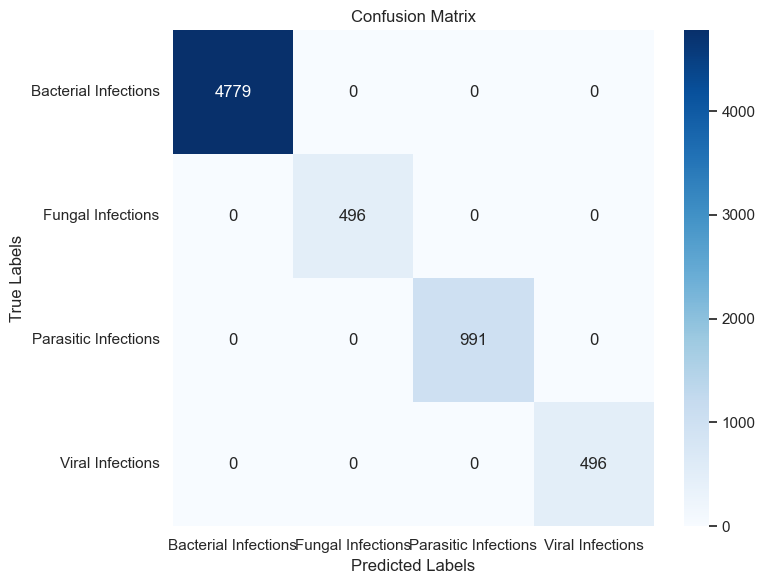

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Confusion matrix data
cm = np.array([
    [4779, 0,    0,    0],
    [0,    496,  0,    0],
    [0,    0,  991,    0],
    [0,    0,    0,  496]
])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


**Decision Tree with SMOTE + ENN**

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.combine import SMOTEENN  # ⬅️ combo SMOTE + ENN

# === 1. Split features & target ===
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

# === 2. Handle missing values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === 3. Encode categorical features ===
feature_label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = feature_label_encoder.fit_transform(X[col])

# === 4. Encode target labels ===
target_label_encoder = LabelEncoder()
y = target_label_encoder.fit_transform(y)

# === 5. Train-test split (before SMOTEENN) ===
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.2, random_state=42, stratify=y
)

# === 6. Apply SMOTEENN (SMOTE + ENN) on training data ===
smote_enn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smote_enn.fit_resample(X_train, y_train)

# === 7. Train classifier ===
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# === 8. Predict & evaluate ===
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

# === 9. Confusion Matrix & Report ===
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
class_names = target_label_encoder.inverse_transform(unique_labels).tolist()
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print("\nConfusion Matrix:")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))


Accuracy: 0.9993
Precision: 0.9993
Recall (Sensitivity): 0.9993
F1-Score: 0.9993
Matthews Correlation Coefficient (MCC): 0.9984

Confusion Matrix:
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4779                  0   
Fungal Infections                        0                496   
Parasitic Infections                     5                  0   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                     0                 0  
Fungal Infections                        0                 0  
Parasitic Infections                   986                 0  
Viral Infections                         0               496  

Classification Report:
                      precision    recall  f1-score   support

Bacterial Infections       1.00      1.00      1.00      4779
   Fungal Infections       1.00      1.00      1.00       496
P

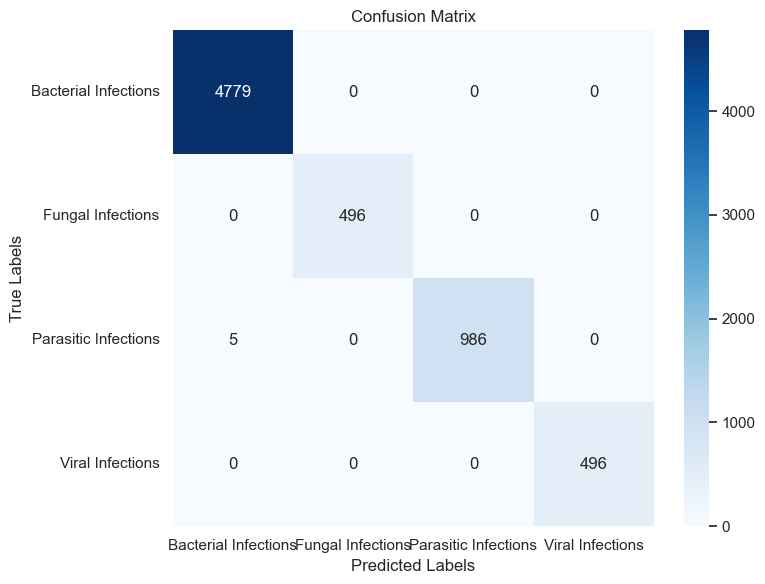

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Confusion matrix data
cm = np.array([
    [4779, 0,    0,    0],
    [0,    496,  0,    0],
    [5,    0,  986,    0],
    [0,    0,    0,  496]
])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


## **Decision Tree Model Performance and Confusion Matrix Comparison**

**Model Performance Compariosn**

C:\Users\User\AppData\Local\Temp\ipykernel_8660\565792345.py:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


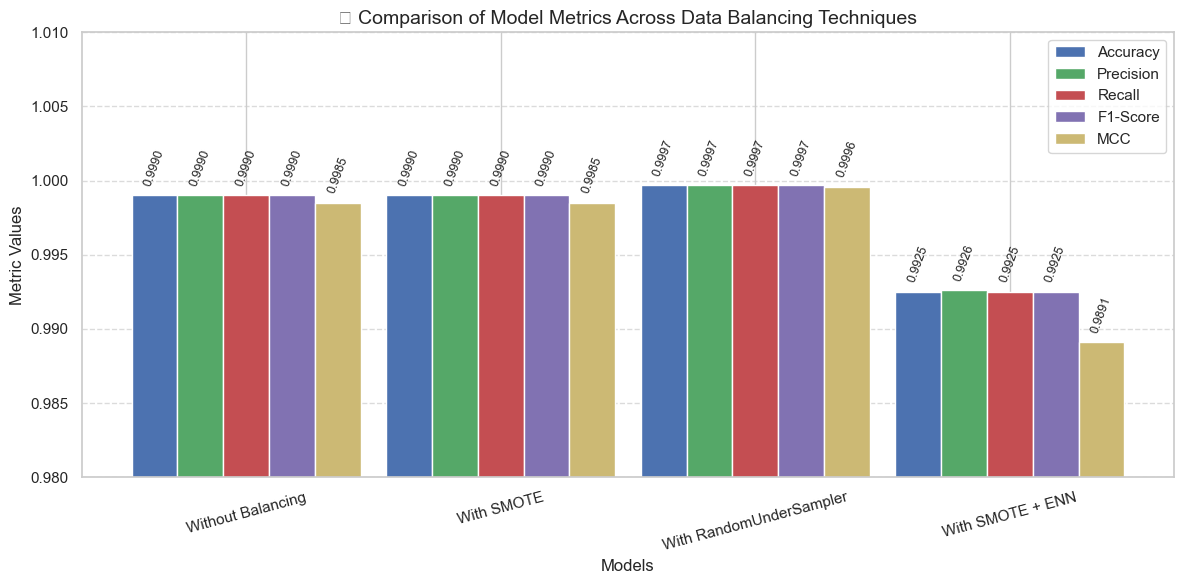

In [64]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    "Without Balancing",
    "With SMOTE",
    "With RandomUnderSampler",
    "With SMOTE + ENN"
]

accuracy =       [0.9990, 0.9990, 0.9997, 0.9925]
precision =      [0.9990, 0.9990, 0.9997, 0.9926]
recall =         [0.9990, 0.9990, 0.9997, 0.9925]
f1_score =       [0.9990, 0.9990, 0.9997, 0.9925]
mcc =            [0.9985, 0.9985, 0.9996, 0.9891]

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score,
    "MCC": mcc
}

bar_width = 0.18
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974']

for i, (metric_name, values) in enumerate(metrics.items()):
    offset = (i - 2) * bar_width  # center align bars
    bars = ax.bar(x + offset, values, bar_width, label=metric_name, color=colors[i])
    for j, val in enumerate(values):
        ax.text(j + offset, val + 0.0005, f"{val:.4f}", ha='center', va='bottom', fontsize=9, rotation=70)

ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Metric Values", fontsize=12)
ax.set_title("📊 Comparison of Model Metrics Across Data Balancing Techniques", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0.98, 1.01)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Confusion Matrix Comparison**

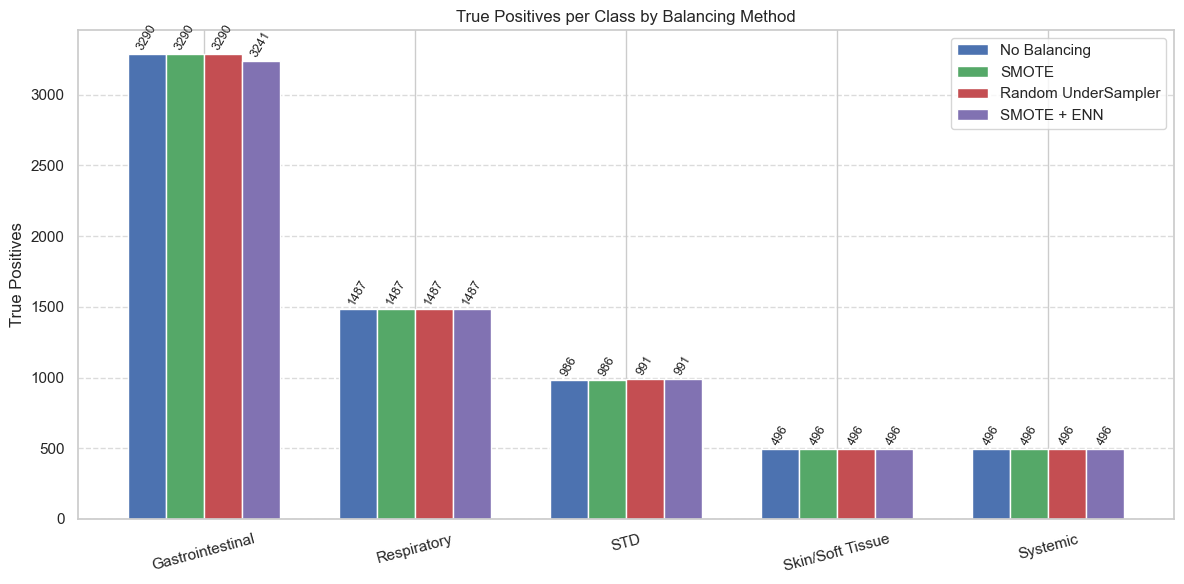

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels
classes = ["Gastrointestinal", "Respiratory", "STD", "Skin/Soft Tissue", "Systemic"]

# True positives per method
results = {
    "No Balancing":          [3290, 1487, 986, 496, 496],
    "SMOTE":                 [3290, 1487, 986, 496, 496],
    "Random UnderSampler":   [3290, 1487, 991, 496, 496],
    "SMOTE + ENN":           [3241, 1487, 991, 496, 496]
}

methods = list(results.keys())
num_classes = len(classes)
num_methods = len(methods)

bar_width = 0.18
x = np.arange(num_classes)

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

for i, method in enumerate(methods):
    offset = (i - (num_methods - 1) / 2) * bar_width
    bars = ax.bar(x + offset, results[method], width=bar_width, label=method, color=colors[i])
    for j, val in enumerate(results[method]):
        ax.text(x[j] + offset, val + 10, str(val), ha='center', va='bottom', fontsize=9, rotation=60)

ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=15)
ax.set_ylabel("True Positives")
ax.set_title("True Positives per Class by Balancing Method")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## **Extra Tree Classifier**

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)


In [67]:

X = df.iloc[:, :-2]  # Features
y = df.iloc[:, -2]   # Target


In [68]:
# Identify feature types
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Fill missing values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])


In [69]:
label_encoder = LabelEncoder()

# Encode features
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode target
y = label_encoder.fit_transform(y)


In [70]:
# Standard scaling (helps in some cases even for tree-based models)
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
etc_classifier = ExtraTreesClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
etc_classifier.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [73]:
y_pred = etc_classifier.predict(X_test)


In [74]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)


In [75]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print("\nConfusion Matrix:")
print(cm_df)

Accuracy: 0.9783
Precision: 0.9789
Recall (Sensitivity): 0.9783
F1-Score: 0.9773
Matthews Correlation Coefficient (MCC): 0.9529

Confusion Matrix:
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4779                  0   
Fungal Infections                        0                496   
Parasitic Infections                     5                  0   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                     0                 0  
Fungal Infections                        0                 0  
Parasitic Infections                   986                 0  
Viral Infections                         0               496  


# **Extra Tree Classifier Confusion Matrix**

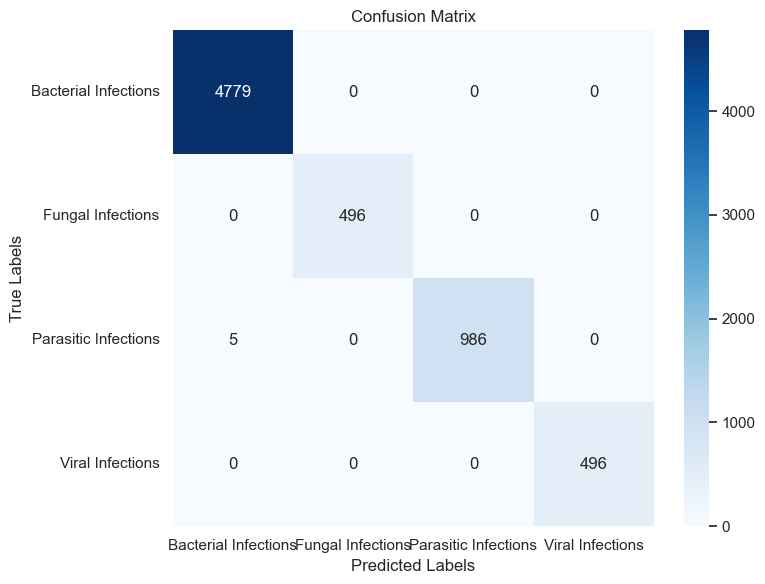

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Confusion matrix data
cm = np.array([
    [4779, 0,    0,    0],
    [0,    496,  0,    0],
    [5,    0,  986,    0],
    [0,    0,    0,  496]
])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


## **Extra Tree Classifier with Data Balancing**

**Extra Tree Classifier with SMOTE**

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.over_sampling import SMOTE  # 🧪 Injecting synthetic samples

# === 1. Feature & target separation ===
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

# === 2. Handle missing values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === 3. Encode categorical features ===
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# === 4. Encode target ===
y = label_encoder.fit_transform(y)

# === 5. Scale features ===
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === 6. Split before SMOTE ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 7. Apply SMOTE only on training data ===
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# === 8. Train Extra Trees Classifier ===
etc_classifier = ExtraTreesClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
etc_classifier.fit(X_train_balanced, y_train_balanced)

# === 9. Prediction & Evaluation ===
y_pred = etc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)



# === 9. Confusion Matrix & Report ===
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
class_names = target_label_encoder.inverse_transform(unique_labels).tolist()
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print("\nConfusion Matrix:")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

Accuracy: 0.9264
Precision: 0.9488
Recall (Sensitivity): 0.9264
F1-Score: 0.9311
Matthews Correlation Coefficient (MCC): 0.8662

Confusion Matrix:
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4284                  0   
Fungal Infections                        0                496   
Parasitic Infections                     2                  1   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                   470                25  
Fungal Infections                        0                 0  
Parasitic Infections                   988                 0  
Viral Infections                         0               496  

Classification Report:
                      precision    recall  f1-score   support

Bacterial Infections       1.00      0.90      0.95      4779
   Fungal Infections       1.00      1.00      1.00       496
P

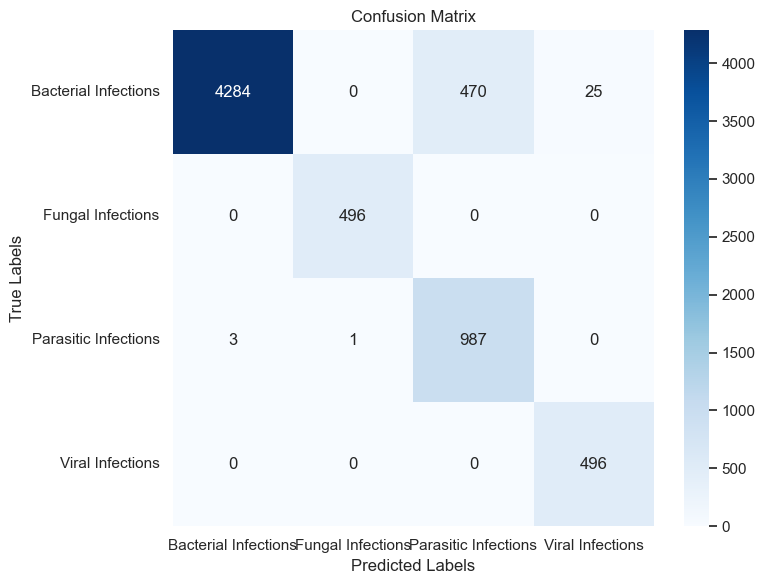

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Confusion matrix data
cm = np.array([
    [4284, 0, 470,  25],
    [0,    496,  0,   0],
    [3,      1, 987,  0],
    [0,      0,   0, 496]
])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


# **Extra Tree Classifier with Random Under Sampler**

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.under_sampling import RandomUnderSampler  # 🪓 Downsampling majority classes

# === 1. Feature & target separation ===
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

# === 2. Handle missing values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === 3. Encode categorical features ===
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# === 4. Encode target ===
y = label_encoder.fit_transform(y)

# === 5. Scale features ===
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === 6. Split before resampling ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 7. Apply Random Undersampling on training data ===
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

# === 8. Train Extra Trees Classifier ===
etc_classifier = ExtraTreesClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
etc_classifier.fit(X_train_balanced, y_train_balanced)

# === 9. Prediction & Evaluation ===
y_pred = etc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

cm_classified = pd.DataFrame(cm, index=class_names, columns=class_names)

# === 10. Output ===
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print("\nConfusion Matrix (with Class Names):")
print(cm_classified)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))


Accuracy: 0.9734
Precision: 0.9763
Recall (Sensitivity): 0.9734
F1-Score: 0.9739
Matthews Correlation Coefficient (MCC): 0.9465

Confusion Matrix (with Class Names):
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4599                  0   
Fungal Infections                        0                496   
Parasitic Infections                     0                  0   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                   135                45  
Fungal Infections                        0                 0  
Parasitic Infections                   991                 0  
Viral Infections                         0               496  

Classification Report:
                      precision    recall  f1-score   support

Bacterial Infections       1.00      0.96      0.98      4779
   Fungal Infections       1.00      1.00   

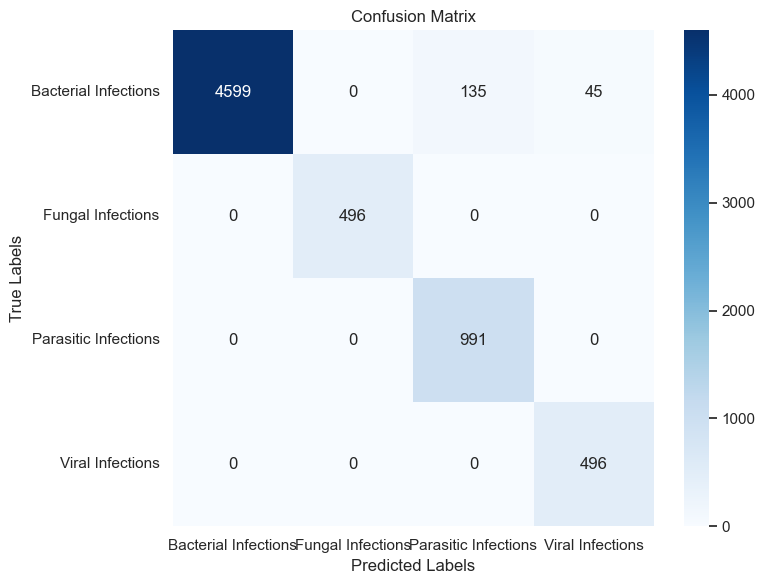

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
labels = [
    "Bacterial Infections",
    "Fungal Infections",
    "Parasitic Infections",
    "Viral Infections"
]

# Confusion matrix data
cm = np.array([
    [4599, 0, 135,  45],
    [0,    496,  0,   0],
    [0,      0, 991,  0],
    [0,      0,   0, 496]
])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


# **Extra Tree Classifier with SMOT + ENN**

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.combine import SMOTEENN  # 🧠 Combo: oversampling + cleaning

# === Assuming df is your DataFrame already loaded ===

# === 1. Feature & target separation ===
X = df.iloc[:, :-2]
y = df.iloc[:, -2]

# === 2. Handle missing values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === 3. Encode categorical features ===
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# === 4. Encode target ===
y = label_encoder.fit_transform(y)

# === 5. Scale features ===
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === 6. Split before resampling ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 7. Apply SMOTE+ENN on training data ===
smoteenn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smoteenn.fit_resample(X_train, y_train)

# === 8. Train Extra Trees Classifier ===
etc_classifier = ExtraTreesClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
etc_classifier.fit(X_train_balanced, y_train_balanced)

# === 9. Prediction & Evaluation ===
y_pred = etc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# === 10. Define class names ===
class_names = ["Bacterial Infections", "Fungal Infections", "Parasitic Infections", "Viral Infections"]

cm_classified = pd.DataFrame(cm, index=class_names, columns=class_names)

# === 11. Output ===
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

print("\nConfusion Matrix (with Class Names):")
print(cm_classified)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))


Accuracy: 0.8903
Precision: 0.9320
Recall (Sensitivity): 0.8903
F1-Score: 0.8987
Matthews Correlation Coefficient (MCC): 0.8139

Confusion Matrix (with Class Names):
                      Bacterial Infections  Fungal Infections  \
Bacterial Infections                  4038                  1   
Fungal Infections                        0                496   
Parasitic Infections                     1                  0   
Viral Infections                         0                  0   

                      Parasitic Infections  Viral Infections  
Bacterial Infections                   679                61  
Fungal Infections                        0                 0  
Parasitic Infections                   990                 0  
Viral Infections                         0               496  

Classification Report:
                      precision    recall  f1-score   support

Bacterial Infections       1.00      0.84      0.92      4779
   Fungal Infections       1.00      1.00   

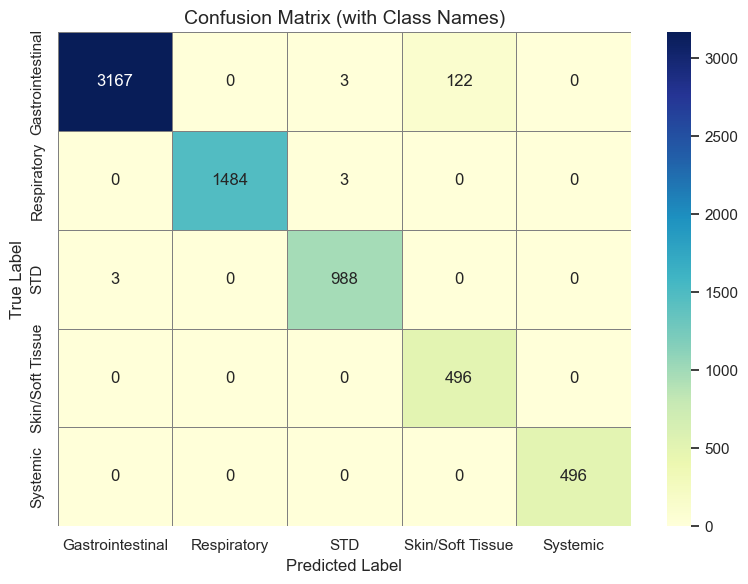

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Class labels
classes = ["Gastrointestinal", "Respiratory", "STD", "Skin/Soft Tissue", "Systemic"]

# Updated confusion matrix values
conf_matrix = np.array([
    [3167,     0,    3,  122,    0],  # Gastrointestinal
    [   0,  1484,    3,    0,    0],  # Respiratory
    [   3,     0,  988,    0,    0],  # STD
    [   0,     0,    0,  496,    0],  # Skin/Soft Tissue
    [   0,     0,    0,    0,  496]   # Systemic
])

# Create DataFrame for the heatmap
df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix (with Class Names)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


## **Extra Tree Clissifier Model Performance and Confusion Matrix Comparison**

**Model Comparison**

C:\Users\User\AppData\Local\Temp\ipykernel_8660\87296462.py:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


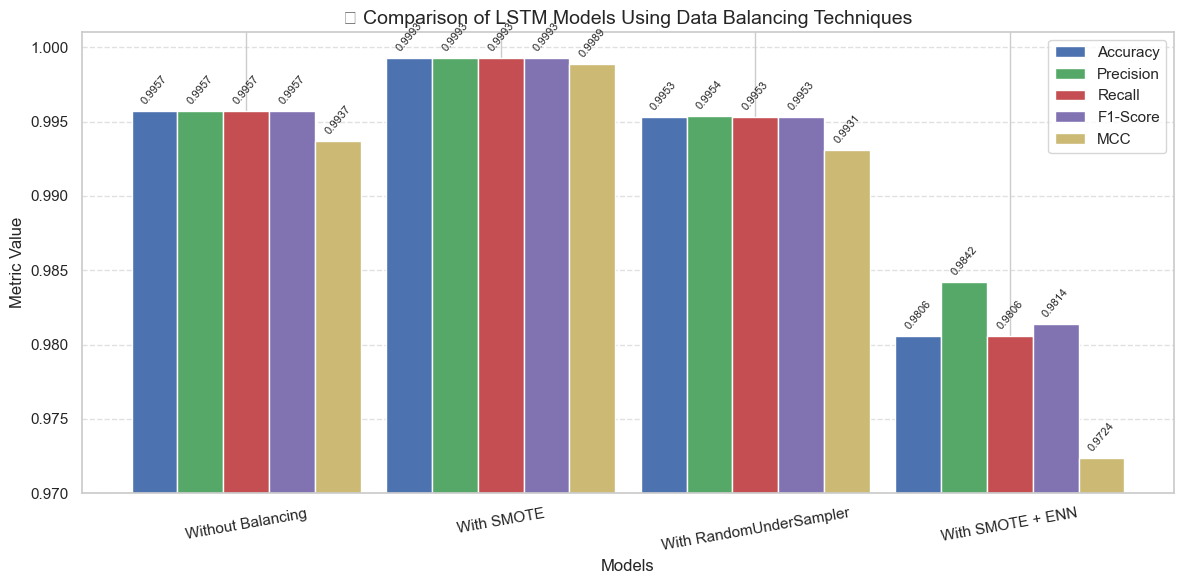

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = [
    "Without Balancing",
    "With SMOTE",
    "With RandomUnderSampler",
    "With SMOTE + ENN"
]

# Metrics for each model
accuracy =       [0.9957, 0.9993, 0.9953, 0.9806]
precision =      [0.9957, 0.9993, 0.9954, 0.9842]
recall =         [0.9957, 0.9993, 0.9953, 0.9806]
f1_score =       [0.9957, 0.9993, 0.9953, 0.9814]
mcc =            [0.9937, 0.9989, 0.9931, 0.9724]

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score,
    "MCC": mcc
}

# Plotting setup
bar_width = 0.18
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(12, 6))

# Colors for each metric
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974']

# Plot each metric
for i, (metric_name, values) in enumerate(metrics.items()):
    offset = (i - 2) * bar_width  # center-align
    bars = ax.bar(x + offset, values, bar_width, label=metric_name, color=colors[i])
    for j, val in enumerate(values):
        ax.text(j + offset, val + 0.0003, f"{val:.4f}",
                ha='center', va='bottom', fontsize=8, rotation=50)

# Axis settings
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Metric Value", fontsize=12)
ax.set_title("🔍 Comparison of LSTM Models Using Data Balancing Techniques", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=10)
ax.set_ylim(0.97, 1.001)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


**Confuison Matrix Comparison**

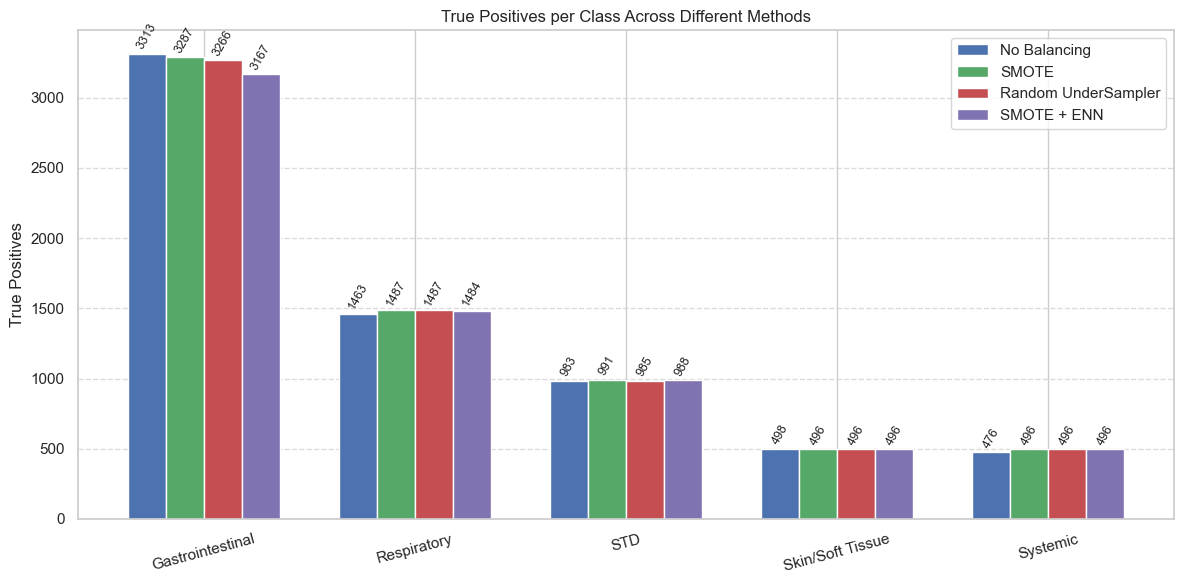

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Classes and results
classes = ["Gastrointestinal", "Respiratory", "STD", "Skin/Soft Tissue", "Systemic"]

results = {
    "No Balancing":        [3313, 1463, 983, 498, 476],
    "SMOTE":               [3287, 1487, 991, 496, 496],
    "Random UnderSampler": [3266, 1487, 985, 496, 496],
    "SMOTE + ENN":         [3167, 1484, 988, 496, 496],
}

methods = list(results.keys())
num_classes = len(classes)
num_methods = len(methods)

bar_width = 0.18
x = np.arange(num_classes)

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

# Plot bars for each method side by side
for i, method in enumerate(methods):
    offset = (i - (num_methods - 1) / 2) * bar_width
    ax.bar(x + offset, results[method], width=bar_width, label=method, color=colors[i])
    # Add value labels on top rotated 60 degrees
    for j, val in enumerate(results[method]):
        ax.text(x[j] + offset, val + 15, str(val), ha='center', va='bottom', fontsize=9, rotation=60)

ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=15)
ax.set_ylabel("True Positives")
ax.set_title("True Positives per Class Across Different Methods")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Deep Learnig Models**

## **Long Short-Term Memory**

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [86]:
df.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable,Disease_Category,Symptom_Category
13099,Campylobacteriosis,San Joaquin,2006,Female,78,331622,23.521,18,29,,Bacterial Infections,Gastrointestinal
13100,Campylobacteriosis,San Joaquin,2006,Male,79,329263,23.993,18,29,,Bacterial Infections,Gastrointestinal
13101,Campylobacteriosis,San Joaquin,2007,Total,158,669737,23.591,20,27,,Bacterial Infections,Gastrointestinal
13102,Campylobacteriosis,San Joaquin,2007,Female,82,336128,24.395,19,30,,Bacterial Infections,Gastrointestinal
13103,Campylobacteriosis,San Joaquin,2007,Male,76,333609,22.781,17,28,,Bacterial Infections,Gastrointestinal


In [87]:
X = df.iloc[:, :-1]  # All columns except last as features
y = df.iloc[:, -1].values  # Last column as target

In [88]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

In [89]:
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

In [90]:
y = label_encoder.fit_transform(y)

In [91]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [92]:
y = to_categorical(y)

In [93]:
X = X.reshape(X.shape[0], 1, X.shape[1])  # (samples, timesteps=1, features)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [95]:
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=False),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


846/846 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7751 - loss: 0.5350 - val_accuracy: 0.9151 - val_loss: 0.2093
Epoch 2/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9862 - loss: 0.0883 - val_accuracy: 0.9950 - val_loss: 0.0290
Epoch 3/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9957 - loss: 0.0217 - val_accuracy: 0.9967 - val_loss: 0.0162
Epoch 4/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9962 - loss: 0.0144 - val_accuracy: 0.9969 - val_loss: 0.0105
Epoch 5/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9964 - loss: 0.0106 - val_accuracy: 0.9970 - val_loss: 0.0078
Epoch 6/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9971 - loss: 0.0084 - val_accuracy: 0.9972 - val_loss: 0.0067
Epoch 7/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9969 - loss: 0.0086 - val_accuracy: 0.9926 - val_loss: 0.0283
Epoch 8/10
846/846 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9976 - loss: 0.0059 - val_accuracy: 0.9982 - val_

In [98]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probs to labels
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot to labels

212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [99]:
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

In [100]:
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test_labels, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9994
Precision: 0.9994
Recall (Sensitivity): 0.9994
F1-Score: 0.9994
Matthews Correlation Coefficient (MCC): 0.9991


In [101]:
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("\nConfusion Matrix:")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, target_names=class_names))


Confusion Matrix:
                  Gastrointestinal  Respiratory  STD  Skin/Soft Tissue  \
Gastrointestinal              3312            0    1                 0   
Respiratory                      0         1473    0                 0   
STD                              3            0  999                 0   
Skin/Soft Tissue                 0            0    0               498   
Systemic                         0            0    0                 0   

                  Systemic  
Gastrointestinal         0  
Respiratory              0  
STD                      0  
Skin/Soft Tissue         0  
Systemic               476  

Classification Report:
                  precision    recall  f1-score   support

Gastrointestinal       1.00      1.00      1.00      3313
     Respiratory       1.00      1.00      1.00      1473
             STD       1.00      1.00      1.00      1002
Skin/Soft Tissue       1.00      1.00      1.00       498
        Systemic       1.00      1.00      1.00

#  **LSTM Cofusion Matrix**

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [103]:
confusion_matrix_data = [
    [3301,    0,    5,    0,    0],
    [   0, 1473,    0,    0,    0],
    [  15,    0,  999,    0,    0],
    [   0,    0,    0,  498,    0],
    [   0,    0,    0,    0,  476]
]


In [104]:
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']


In [105]:
df_cm = pd.DataFrame(confusion_matrix_data, index=class_names, columns=class_names)


Text(0.5, 1.0, 'LSTM')

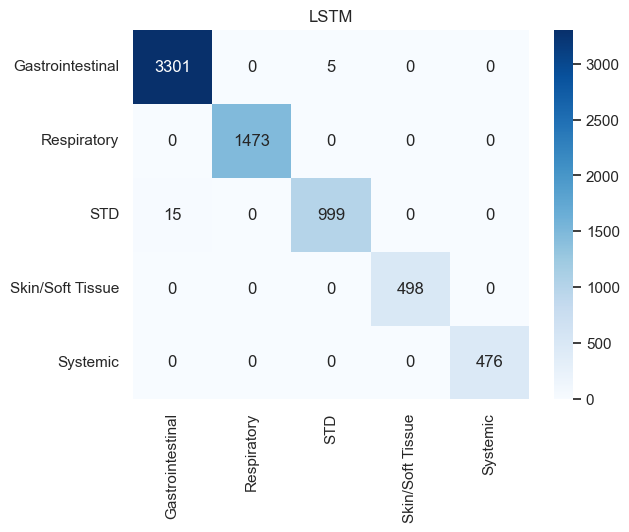

In [106]:
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.title("LSTM")

## **Long Short-Term Memory with Data Balancing**

**Long Short-Term Memory with SMOTE**

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# === Load Features & Target ===
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# === Handle Missing Values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === Encode Categorical Features ===
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# === Encode Target ===
y = label_encoder.fit_transform(y)

# === Scale Features ===
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === Apply SMOTE on 2D Features ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# === One-hot encode y after SMOTE ===
y_resampled_cat = to_categorical(y_resampled)

# === Reshape for LSTM: (samples, timesteps=1, features) ===
X_resampled = X_resampled.reshape(X_resampled.shape[0], 1, X_resampled.shape[1])

# === Split Resampled Data ===
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_cat, test_size=0.2, random_state=42, stratify=y_resampled
)

# === Build LSTM Model ===
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# === Train Model ===
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# === Prediction & Evaluation ===
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# === Evaluation Metrics ===
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test_labels, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("\nConfusion Matrix:")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, target_names=class_names))


Epoch 1/10


d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2058/2058 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9231 - loss: 0.2210 - val_accuracy: 0.9945 - val_loss: 0.0200
Epoch 2/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9962 - loss: 0.0131 - val_accuracy: 0.9962 - val_loss: 0.0118
Epoch 3/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9966 - loss: 0.0107 - val_accuracy: 0.9975 - val_loss: 0.0083
Epoch 4/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9947 - val_loss: 0.0167
Epoch 5/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9979 - loss: 0.0068 - val_accuracy: 0.9978 - val_loss: 0.0065
Epoch 6/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9979 - loss: 0.0057 - val_accuracy: 0.9979 - val_loss: 0.0061
Epoch 7/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0047 - val_accuracy: 0.9985 - val_loss: 0.0042
Epoch 8/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0053 - val_acc

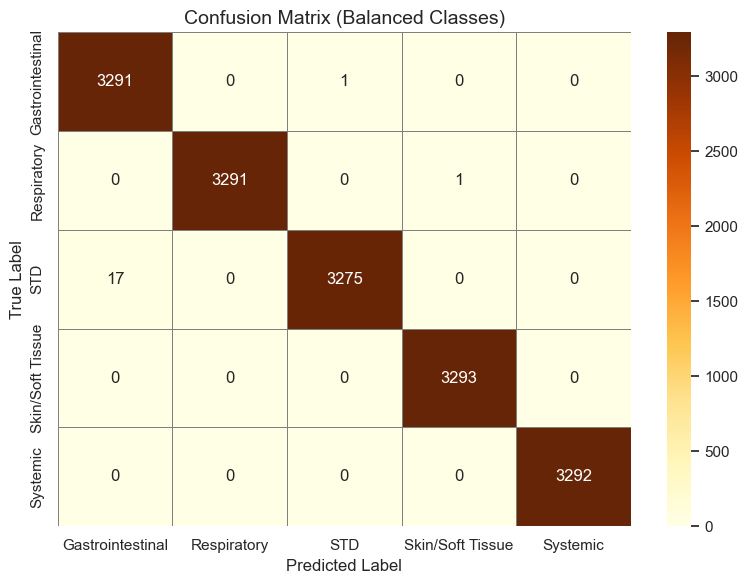

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Class labels
classes = ["Gastrointestinal", "Respiratory", "STD", "Skin/Soft Tissue", "Systemic"]

# New confusion matrix values
conf_matrix = np.array([
    [3291,     0,     1,     0,     0],  # Gastrointestinal
    [   0,  3291,     0,     1,     0],  # Respiratory
    [  17,     0,  3275,     0,     0],  # STD
    [   0,     0,     0,  3293,     0],  # Skin/Soft Tissue
    [   0,     0,     0,     0,  3292]   # Systemic
])

# Create DataFrame for the heatmap
df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlOrBr', linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix (Balanced Classes)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


**Long Short-Term Memory with Random Under Sampler**

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# === Load Features & Target ===
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# === Handle Missing Values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === Encode Categorical Features ===
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# === Encode Target ===
y = label_encoder.fit_transform(y)

# === Scale Features ===
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === Apply Random UnderSampler (2D) ===
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# === One-hot encode y after RUS ===
y_resampled_cat = to_categorical(y_resampled)

# === Reshape for LSTM: (samples, timesteps=1, features) ===
X_resampled = X_resampled.reshape(X_resampled.shape[0], 1, X_resampled.shape[1])

# === Split Resampled Data ===
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_cat, test_size=0.2, random_state=42, stratify=y_resampled
)

# === Build LSTM Model ===
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# === Train Model ===
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# === Prediction & Evaluation ===
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# === Evaluation Metrics ===
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test_labels, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("\nConfusion Matrix:")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, target_names=class_names))


Epoch 1/10


d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7008 - loss: 0.7950 - val_accuracy: 0.8099 - val_loss: 0.5047
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8262 - loss: 0.3954 - val_accuracy: 0.8624 - val_loss: 0.3504
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8893 - loss: 0.2670 - val_accuracy: 0.9120 - val_loss: 0.2205
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9751 - loss: 0.1368 - val_accuracy: 0.9891 - val_loss: 0.0908
Epoch 5/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9936 - loss: 0.0607 - val_accuracy: 0.9919 - val_loss: 0.0545
Epoch 6/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9941 - loss: 0.0358 - val_accuracy: 0.9948 - val_loss: 0.0354
Epoch 7/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9945 - loss: 0.0276 - val_accuracy: 0.9956 - val_loss: 0.0233
Epoch 8/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9949 - loss: 0.0205 - val_accuracy: 0.9935 - val_

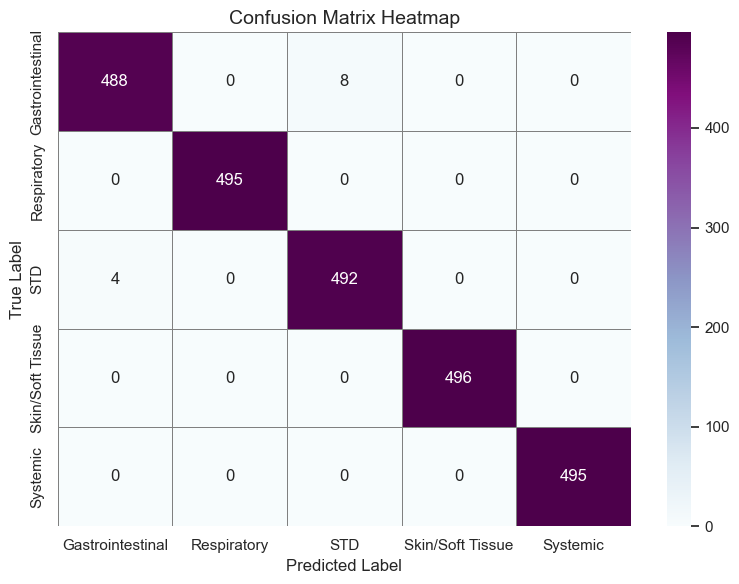

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Class labels
classes = ["Gastrointestinal", "Respiratory", "STD", "Skin/Soft Tissue", "Systemic"]

# Confusion matrix values
conf_matrix = np.array([
    [488,   0,   8,   0,   0],  # Gastrointestinal
    [  0, 495,   0,   0,   0],  # Respiratory
    [  4,   0, 492,   0,   0],  # STD
    [  0,   0,   0, 496,   0],  # Skin/Soft Tissue
    [  0,   0,   0,   0, 495]   # Systemic
])

# Create a DataFrame for visualization
df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='BuPu', linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# **Long Short-Term Memory with SMOTE + ENN**

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.combine import SMOTEENN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# === Load Dataset (Make sure df is already defined) ===
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from file
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# === Handle Missing Values ===
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# === Encode Categorical Features ===
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# === Encode Target ===
y = label_encoder.fit_transform(y)

# === Scale Features ===
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === Apply SMOTE + ENN ===
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# === One-hot encode y after SMOTEENN ===
y_resampled_cat = to_categorical(y_resampled)

# === Reshape for LSTM: (samples, timesteps=1, features) ===
X_resampled = X_resampled.reshape(X_resampled.shape[0], 1, X_resampled.shape[1])

# === Split Data ===
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_cat, test_size=0.2, random_state=42, stratify=y_resampled
)

# === Build LSTM Model ===
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# === Train the Model ===
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# === Prediction & Evaluation ===
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# === Define Class Names (Edit as needed) ===
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

# === Evaluation Metrics ===
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test_labels, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# === Confusion Matrix ===
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("\nConfusion Matrix:")
print(cm_df)

# === Classification Report ===
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, target_names=class_names))


Epoch 1/10


d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2017/2017 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9181 - loss: 0.2356 - val_accuracy: 0.9961 - val_loss: 0.0219
Epoch 2/10
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.0114 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 3/10
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9987 - val_loss: 0.0041
Epoch 4/10
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9982 - val_loss: 0.0075
Epoch 5/10
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9968 - val_loss: 0.0195
Epoch 6/10
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 0.9994 - val_loss: 0.0018
Epoch 7/10
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9994 - val_loss: 0.0023
Epoch 8/10
2017/2017 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accu

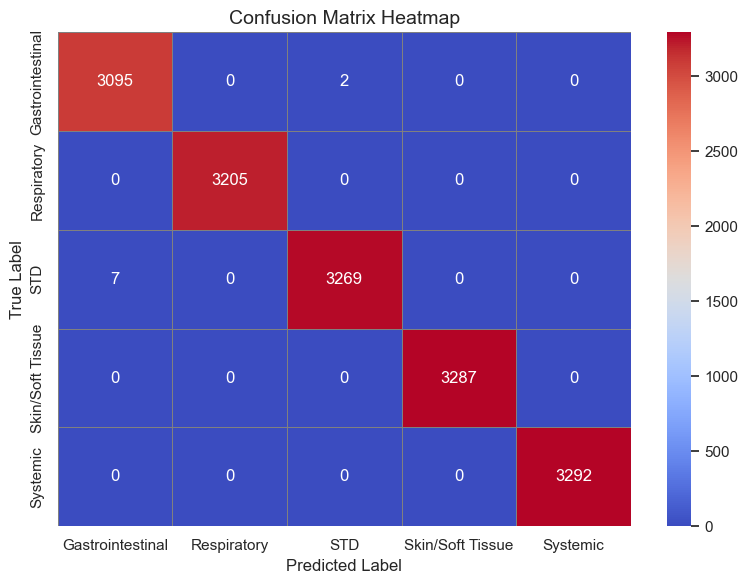

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Class labels
classes = ["Gastrointestinal", "Respiratory", "STD", "Skin/Soft Tissue", "Systemic"]

# Confusion matrix values
conf_matrix = np.array([
    [3095,    0,    2,    0,    0],  # Gastrointestinal
    [   0, 3205,    0,    0,    0],  # Respiratory
    [   7,    0, 3269,    0,    0],  # STD
    [   0,    0,    0, 3287,    0],  # Skin/Soft Tissue
    [   0,    0,    0,    0, 3292]   # Systemic
])

# Create a DataFrame for visualization
df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


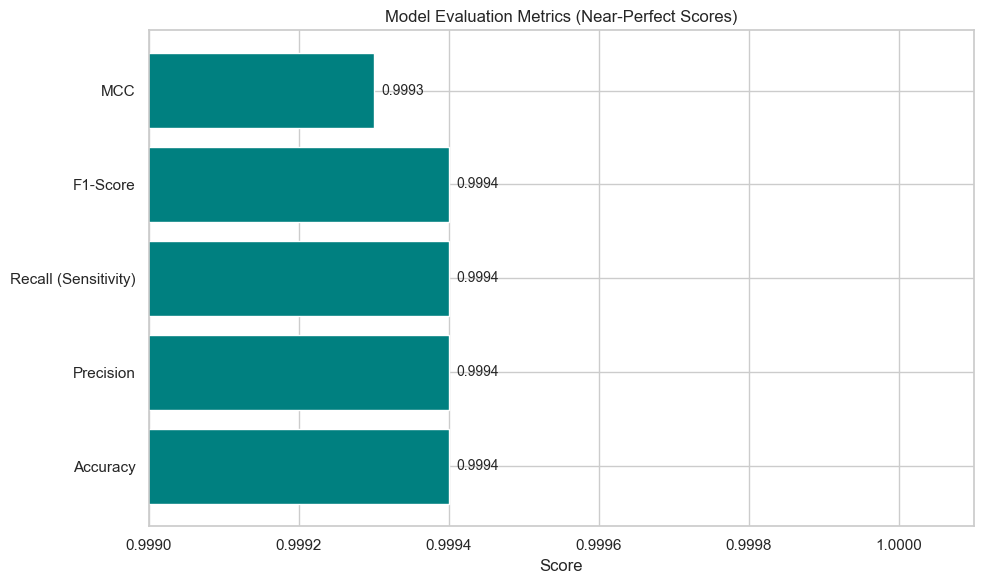

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your model metrics
metrics = {
    'Accuracy': 0.9994,
    'Precision': 0.9994,
    'Recall (Sensitivity)': 0.9994,
    'F1-Score': 0.9994,
    'MCC': 0.9993
}

# Prepare labels and values
labels = list(metrics.keys())
values = list(metrics.values())

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bars = plt.barh(labels, values, color='teal')

# Add value annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.00001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center', fontsize=10)

plt.xlabel("Score")
plt.title("Model Evaluation Metrics (Near-Perfect Scores)")
plt.xlim(0.999, 1.0001)
plt.tight_layout()
plt.show()


## **Long Short-Memory Model Performance and Confusion Matrix Comparison**

**Model Performance Comparison**

C:\Users\User\AppData\Local\Temp\ipykernel_8660\2783522818.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


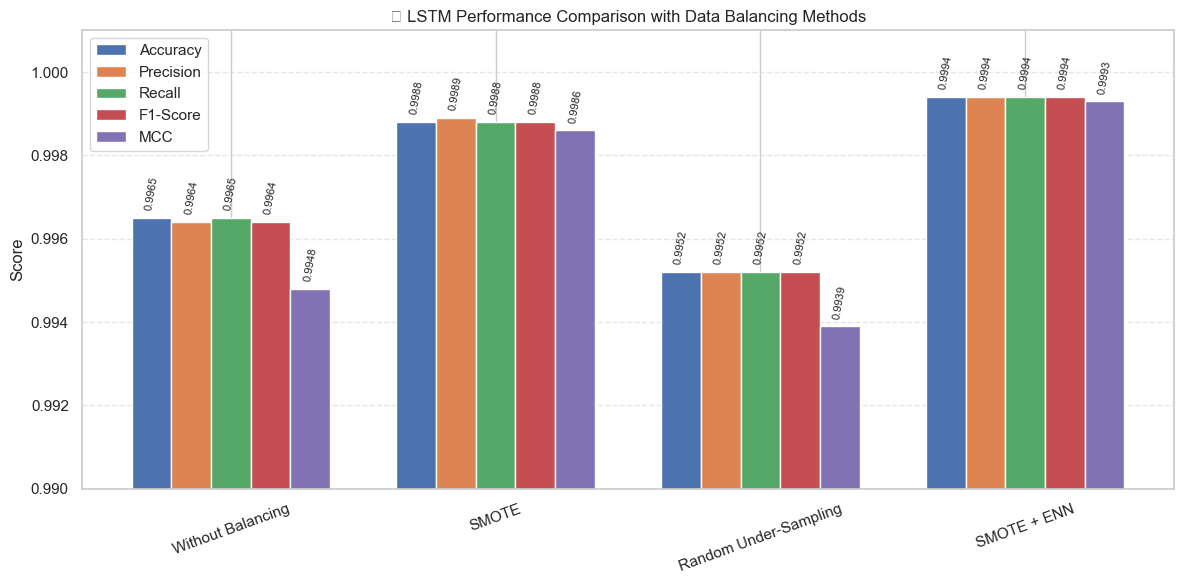

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "Without Balancing",
    "SMOTE",
    "Random Under-Sampling",
    "SMOTE + ENN"
]

# Metrics data
accuracy = [0.9965, 0.9988, 0.9952, 0.9994]
precision = [0.9964, 0.9989, 0.9952, 0.9994]
recall = [0.9965, 0.9988, 0.9952, 0.9994]
f1_score = [0.9964, 0.9988, 0.9952, 0.9994]
mcc = [0.9948, 0.9986, 0.9939, 0.9993]

# All metrics in a dictionary
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score,
    "MCC": mcc
}

# Bar width and positions
bar_width = 0.15
x = np.arange(len(models))

# Plotting
plt.figure(figsize=(12, 6))

# Plot each metric as bars
for i, (metric_name, values) in enumerate(metrics.items()):
    plt.bar(x + i * bar_width, values, width=bar_width, label=metric_name)

# X-axis settings
plt.xticks(x + 2 * bar_width, models, rotation=20)
plt.ylim(0.99, 1.001)
plt.ylabel('Score')
plt.title('📊 LSTM Performance Comparison with Data Balancing Methods')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add tilted value annotations (80 degrees)
for i, (metric_name, values) in enumerate(metrics.items()):
    for j, val in enumerate(values):
        plt.text(j + i * bar_width, val + 0.0002, f"{val:.4f}",
                 ha='center', fontsize=8, rotation=80)

plt.tight_layout()
plt.show()


# **Confusion Matrix Comparison**

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3010403967.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


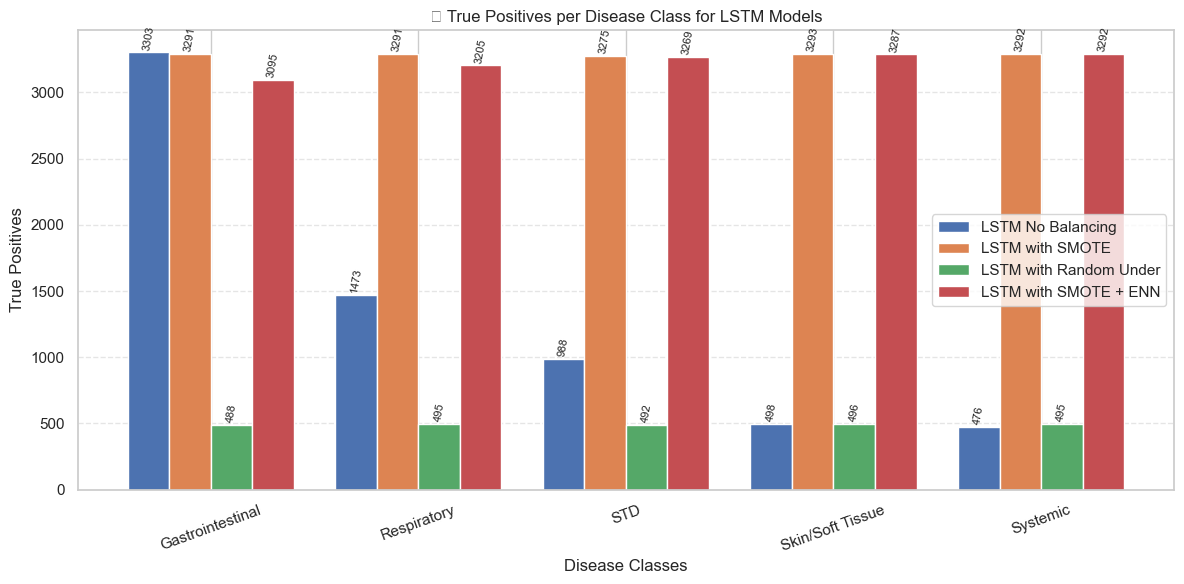

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Disease classes
classes = ["Gastrointestinal", "Respiratory", "STD", "Skin/Soft Tissue", "Systemic"]

# True positives from confusion matrix diagonals
results = {
    "LSTM No Balancing":        [3303, 1473, 988, 498, 476],
    "LSTM with SMOTE":          [3291, 3291, 3275, 3293, 3292],
    "LSTM with Random Under":   [488, 495, 492, 496, 495],
    "LSTM with SMOTE + ENN":    [3095, 3205, 3269, 3287, 3292],
}

methods = list(results.keys())
num_methods = len(methods)
x = np.arange(len(classes))
bar_width = 0.2

# Plotting setup
plt.figure(figsize=(12, 6))

# Plot each method
for i, method in enumerate(methods):
    plt.bar(x + i * bar_width, results[method], width=bar_width, label=method)

# Axis labels and ticks
plt.xlabel("Disease Classes")
plt.ylabel("True Positives")
plt.title("📊 True Positives per Disease Class for LSTM Models")
plt.xticks(x + bar_width * (num_methods - 1) / 2, classes, rotation=20)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels with 80° rotation
for i, method in enumerate(methods):
    for j, val in enumerate(results[method]):
        plt.text(j + i * bar_width, val + 25, str(val),
                 ha='center', fontsize=8, rotation=80)

plt.tight_layout()
plt.show()


## **K-Nearest Neighbors**

In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)

In [117]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1].values   # Target


In [118]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])


In [119]:
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])
y = label_encoder.fit_transform(y)


In [120]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [123]:
y_pred = knn_model.predict(X_test)


In [124]:
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']


In [125]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)


In [126]:
cm = confusion_matrix(y_test, y_pred)
cm_classified = pd.DataFrame(cm, index=class_names, columns=class_names)


In [127]:
specificity = None  # Not well defined for multi-class

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

print("\nConfusion Matrix (with Class Names):")
print(cm_classified)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.9624371487725525
Precision: 0.9625470187590973
Recall (Sensitivity): 0.9624371487725525
F1-Score: 0.9622006388107308
Specificity: None
Matthews Correlation Coefficient (MCC): 0.944715761140249

Confusion Matrix (with Class Names):
                  Gastrointestinal  Respiratory  STD  Skin/Soft Tissue  \
Gastrointestinal              3272           12   13                16   
Respiratory                     76         1349    9                39   
STD                             24            3  975                 0   
Skin/Soft Tissue                39           23    0               436   
Systemic                         0            0    0                 0   

                  Systemic  
Gastrointestinal         0  
Respiratory              0  
STD                      0  
Skin/Soft Tissue         0  
Systemic               476  

Classification Report:
                  precision    recall  f1-score   support

Gastrointestinal       0.96      0.99      0.97      33

**KNN Confusion Matrix**

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [129]:
confusion_matrix_data = [
    [3274, 10, 13, 16, 0],
    [76, 1349, 9, 39, 0],
    [26, 1, 975, 0, 0],
    [41, 21, 0, 436, 0],
    [0, 0, 0, 0, 476]
]

class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.under_sampling import RandomUnderSampler  # 👈 Random Under Sampler import
from collections import Counter

# Assuming df is already loaded
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

print("=== INITIAL DATA ANALYSIS ===")
print(f"Original dataset shape: {X.shape}")
print(f"Target variable distribution:")
print(pd.Series(y).value_counts())
print(f"Number of unique classes: {len(np.unique(y))}")

# Handle missing values
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int16', 'int32']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Label encode categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode target
y = LabelEncoder().fit_transform(y)

print(f"\n=== AFTER ENCODING ===")
print(f"Encoded target distribution:")
encoded_counts = pd.Series(y).value_counts().sort_index()
print(encoded_counts)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 💥 Apply Random Under Sampler for balancing BEFORE feature selection and splitting
print(f"\n=== APPLYING RANDOM UNDER SAMPLER ===")
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"After RandomUnderSampler:")
print(f"Resampled dataset shape: {X_resampled.shape}")
print(f"Class distribution after RandomUnderSampler:")
resampled_counts = pd.Series(y_resampled).value_counts().sort_index()
print(resampled_counts)

# Check if we have enough samples for cross-validation
min_samples_per_class = min(resampled_counts.values)
print(f"Minimum samples per class: {min_samples_per_class}")

# Feature selection on balanced data
print(f"\n=== FEATURE SELECTION ===")
print(f"Original number of features: {X_resampled.shape[1]}")

# Adjust k for feature selection based on available features
max_features = min(5, X_resampled.shape[1])
selector = SelectKBest(score_func=f_classif, k=max_features)
X_new = selector.fit_transform(X_resampled, y_resampled)

print(f"Selected {max_features} best features")
print(f"Feature selection shape: {X_new.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y_resampled, test_size=0.2, random_state=42
)

print(f"\n=== TRAIN-TEST SPLIT ===")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Check if we have enough samples for cross-validation
if len(X_train) < 5:
    print(f"\n⚠️  WARNING: Not enough samples for 5-fold CV (only {len(X_train)} samples)")
    print("Using 2-fold CV instead or skipping hyperparameter tuning")
    
    # Use fewer folds or skip grid search
    cv_folds = min(2, len(X_train))
    if cv_folds < 2:
        print("Not enough samples for cross-validation. Using default parameters.")
        best_params = {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'euclidean'}
        print(f"Using default parameters: {best_params}")
    else:
        print(f"Using {cv_folds}-fold CV")
        # Grid Search for KNN hyperparameters with adjusted CV
        param_grid = {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
        
        grid_search = GridSearchCV(
            KNeighborsClassifier(),
            param_grid,
            cv=cv_folds,
            n_jobs=-1,
            scoring='accuracy'
        )
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        print(f"Best Parameters: {best_params}")
else:
    # Normal grid search with 5-fold CV
    print(f"\n=== GRID SEARCH ===")
    print("Performing grid search for KNN hyperparameters...")
    
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    
    grid_search = GridSearchCV(
        KNeighborsClassifier(),
        param_grid,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    print(f"Best Parameters: {best_params}")

# Train KNN with best params
print(f"\n=== MODEL TRAINING ===")
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

print(f"\n=== MODEL EVALUATION ===")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("\nConfusion Matrix (with Class Names):")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))


In [130]:
df_cm = pd.DataFrame(confusion_matrix_data, index=class_names, columns=class_names)


Text(0.5, 44.249999999999986, 'Predicted')

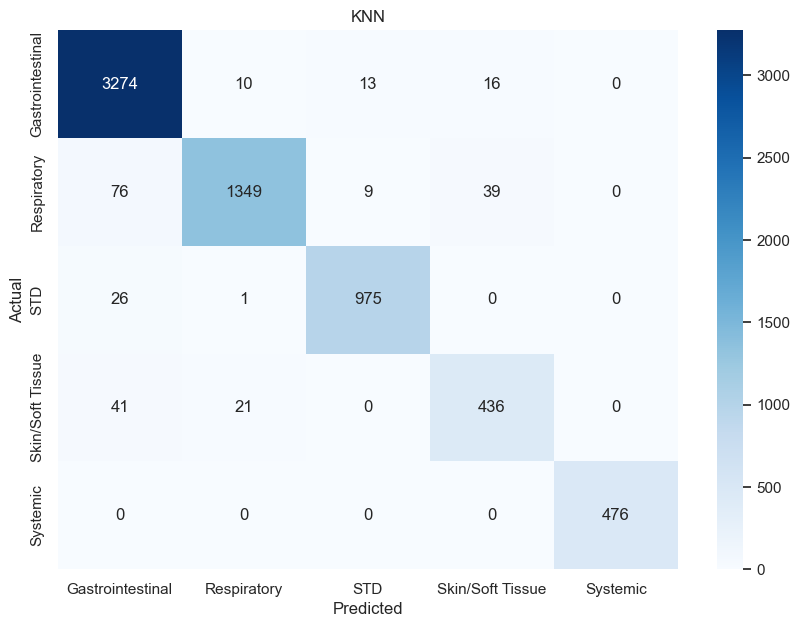

In [131]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN")
plt.ylabel("Actual")
plt.xlabel("Predicted")


# **KNN Feature Inportance**

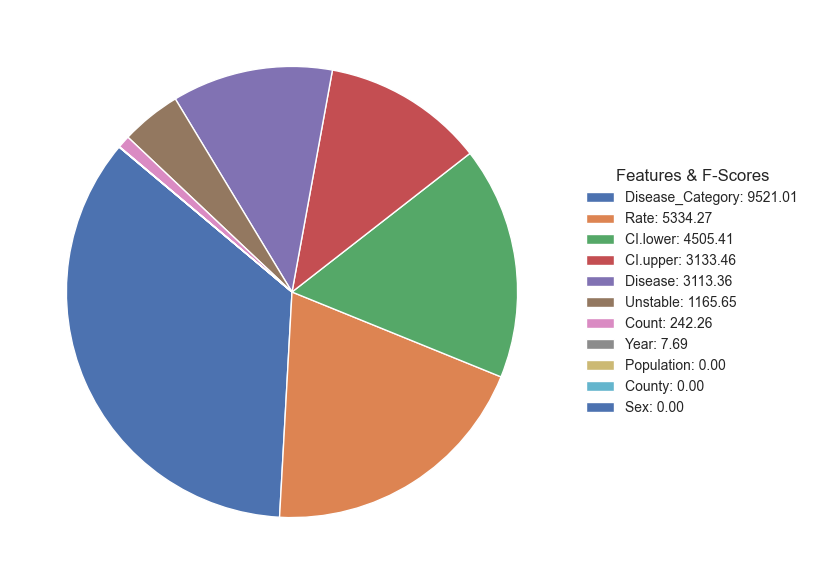

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'df' is your original DataFrame from previous cells.
# To fix the NameError, we need to define 'selector' by performing feature selection.
# We'll preprocess X and y similarly to how it's done in subsequent cells (e.g., cell 178)
# to ensure consistency for feature importance calculation.

# Create copies of features (X) and target (y) for feature selection
X_fs = df.iloc[:, :-1].copy()  # Features for feature selection
y_fs = df.iloc[:, -1].copy()   # Target for feature selection

# Identify numerical and categorical features
numerical_features_fs = X_fs.select_dtypes(include=['int64', 'float64']).columns
categorical_features_fs = X_fs.select_dtypes(include=['object', 'category']).columns

# Handle missing values in X_fs
# For numerical features, fill with mean
if not numerical_features_fs.empty:
    X_fs[numerical_features_fs] = X_fs[numerical_features_fs].fillna(X_fs[numerical_features_fs].mean())
# For categorical features, fill with mode
if not categorical_features_fs.empty:
    for col in categorical_features_fs:
        X_fs[col] = X_fs[col].fillna(X_fs[col].mode()[0])

# Encode categorical features in X_fs
label_encoder_X_fs = LabelEncoder()
for col in categorical_features_fs:
    X_fs[col] = label_encoder_X_fs.fit_transform(X_fs[col])

# Encode target variable y_fs
label_encoder_y_fs = LabelEncoder()
y_fs_encoded = label_encoder_y_fs.fit_transform(y_fs)

# Initialize and fit SelectKBest to get ANOVA F-scores
# We use k='all' to get scores for all features
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_fs, y_fs_encoded)

# Get feature names and their ANOVA F-scores
all_features = df.columns[:-1] # Use original column names for clarity in the plot
f_scores = selector.scores_

# Create a DataFrame sorted by F-score
feature_scores = pd.DataFrame({
    'Feature': all_features,
    'ANOVA_F_Score': f_scores
}).sort_values(by='ANOVA_F_Score', ascending=False)

# Plot pie chart without text labels
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts = ax.pie(
    feature_scores['ANOVA_F_Score'],
    startangle=140,
    labels=None  # no labels on slices
)

# Create legend with feature names and values
legend_labels = [
    f"{feature}: {score:.2f}"
    for feature, score in zip(feature_scores['Feature'], feature_scores['ANOVA_F_Score'])
]

# Place legend on the right side with colored boxes matching pie slices
ax.legend(
    wedges, legend_labels,
    title="Features & F-Scores",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()



## **K-Nearest Neighbors with Data Balancing**

**K-Nearest Neighbors with SMOTE**

In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.over_sampling import SMOTE  # ← Import SMOTE

# Assuming df is already loaded
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1].values   # Target

# Handling missing values
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Encoding categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encoding target
y = label_encoder.fit_transform(y)

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 💥 Apply SMOTE BEFORE splitting
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Evaluation
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_classified = pd.DataFrame(cm, index=class_names, columns=class_names)
specificity = None  # Not easily defined for multi-class

# Output
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

print("\nConfusion Matrix (with Class Names):")
print(cm_classified)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.9852985845331389
Precision: 0.9855103854663118
Recall (Sensitivity): 0.9852985845331389
F1-Score: 0.985226706067409
Specificity: None
Matthews Correlation Coefficient (MCC): 0.9817079635554519

Confusion Matrix (with Class Names):
                  Gastrointestinal  Respiratory   STD  Skin/Soft Tissue  \
Gastrointestinal              3043           56    25                95   
Respiratory                     16         3275    10                30   
STD                              9            0  3229                 0   
Skin/Soft Tissue                 0            1     0              3381   
Systemic                         0            0     0                 0   

                  Systemic  
Gastrointestinal         0  
Respiratory              0  
STD                      0  
Skin/Soft Tissue         0  
Systemic              3291  

Classification Report:
                  precision    recall  f1-score   support

Gastrointestinal       0.99      0.95      0.97  

C:\Users\User\AppData\Local\Temp\ipykernel_8660\3160823890.py:21: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


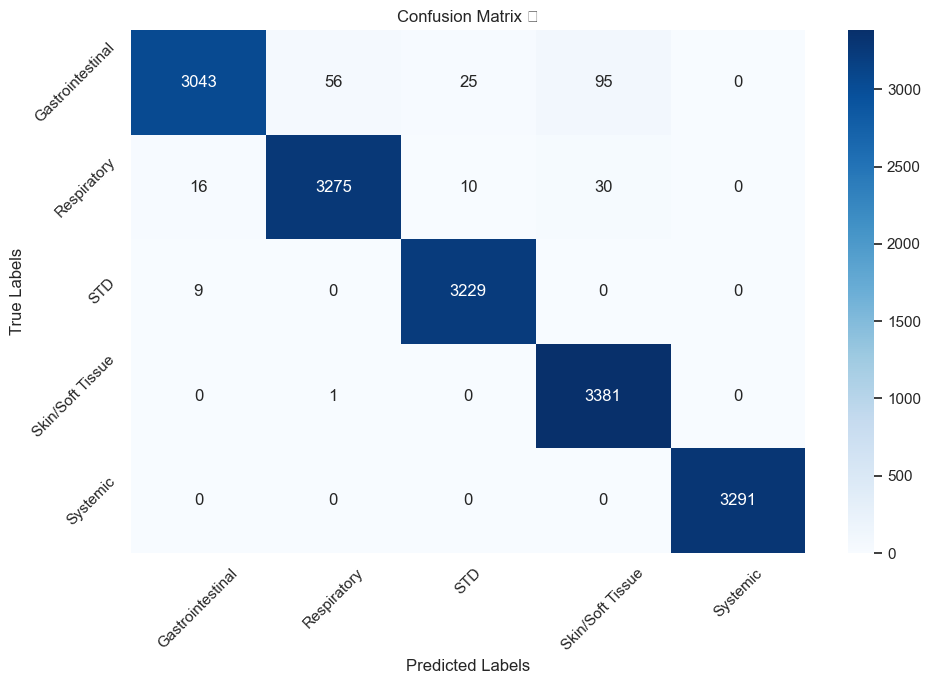

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Recalculate confusion matrix (in case you don't have it already)
cm = confusion_matrix(y_test, y_pred)

# Class names
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix 🔍')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


# **K-Nearest Neighbour with Random Under Sampler**

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.under_sampling import RandomUnderSampler  # 👈 Importing Under Sampler

# Assuming df is already loaded
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# Handle missing values
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Label Encoding for categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode target labels
y = label_encoder.fit_transform(y)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 💥 Apply Random Under Sampler
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Metrics
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_classified = pd.DataFrame(cm, index=class_names, columns=class_names)
specificity = None  # Still undefined for multiclass

# Output Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

print("\nConfusion Matrix (with Class Names):")
print(cm_classified)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.8817594834543987
Precision: 0.8879366213190333
Recall (Sensitivity): 0.8817594834543987
F1-Score: 0.8799089027678115
Specificity: None
Matthews Correlation Coefficient (MCC): 0.8548284621782829

Confusion Matrix (with Class Names):
                  Gastrointestinal  Respiratory  STD  Skin/Soft Tissue  \
Gastrointestinal               421           24   14                54   
Respiratory                     35          351   16               104   
STD                             11           10  459                 0   
Skin/Soft Tissue                 4           17    0               502   
Systemic                         0            0    0                 0   

                  Systemic  
Gastrointestinal         4  
Respiratory              0  
STD                      0  
Skin/Soft Tissue         0  
Systemic               452  

Classification Report:
                  precision    recall  f1-score   support

Gastrointestinal       0.89      0.81      0.85       

C:\Users\User\AppData\Local\Temp\ipykernel_8660\1853103206.py:30: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


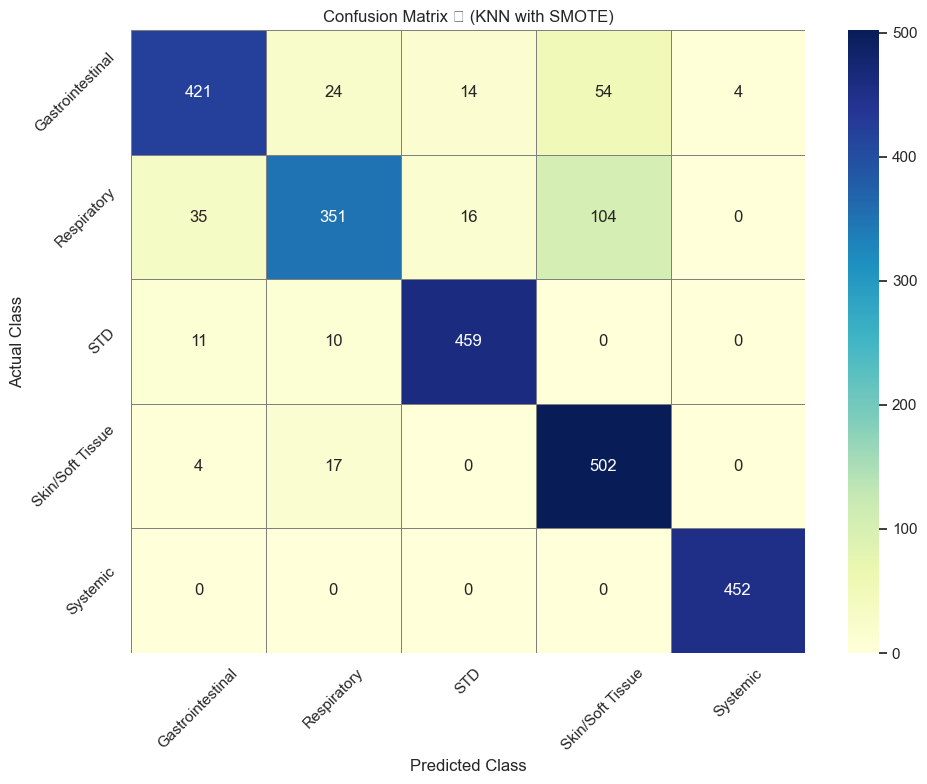

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

# Manually enter your confusion matrix data
cm_data = [
    [421, 24, 14, 54, 4],
    [35, 351, 16, 104, 0],
    [11, 10, 459, 0, 0],
    [4, 17, 0, 502, 0],
    [0, 0, 0, 0, 452]
]

# Create DataFrame for heatmap
cm_df = pd.DataFrame(cm_data, index=class_names, columns=class_names)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            linewidths=.5, linecolor='gray')

plt.title('Confusion Matrix 🔥 (KNN with SMOTE)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


**K-Nearest Neighbour with SMOTE + ENN**

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.combine import SMOTEENN  # 👈 Hybrid method (SMOTE + ENN)

# Assuming df is already loaded
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# Handle missing values
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Label Encoding for categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode target labels
y = label_encoder.fit_transform(y)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 💥 Apply SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Metrics
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_classified = pd.DataFrame(cm, index=class_names, columns=class_names)
specificity = None  # Still undefined for multiclass

# Output Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

print("\nConfusion Matrix (with Class Names):")
print(cm_classified)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.9922504649721017
Precision: 0.9923237670094682
Recall (Sensitivity): 0.9922504649721017
F1-Score: 0.9922358851256674
Specificity: None
Matthews Correlation Coefficient (MCC): 0.9903338243343802

Confusion Matrix (with Class Names):
                  Gastrointestinal  Respiratory   STD  Skin/Soft Tissue  \
Gastrointestinal              2942           29     6                51   
Respiratory                     11         3110     3                22   
STD                              3            0  3354                 0   
Skin/Soft Tissue                 0            0     0              3317   
Systemic                         0            0     0                 0   

                  Systemic  
Gastrointestinal         0  
Respiratory              0  
STD                      0  
Skin/Soft Tissue         0  
Systemic              3282  

Classification Report:
                  precision    recall  f1-score   support

Gastrointestinal       1.00      0.97      0.98 

C:\Users\User\AppData\Local\Temp\ipykernel_8660\1426178297.py:30: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


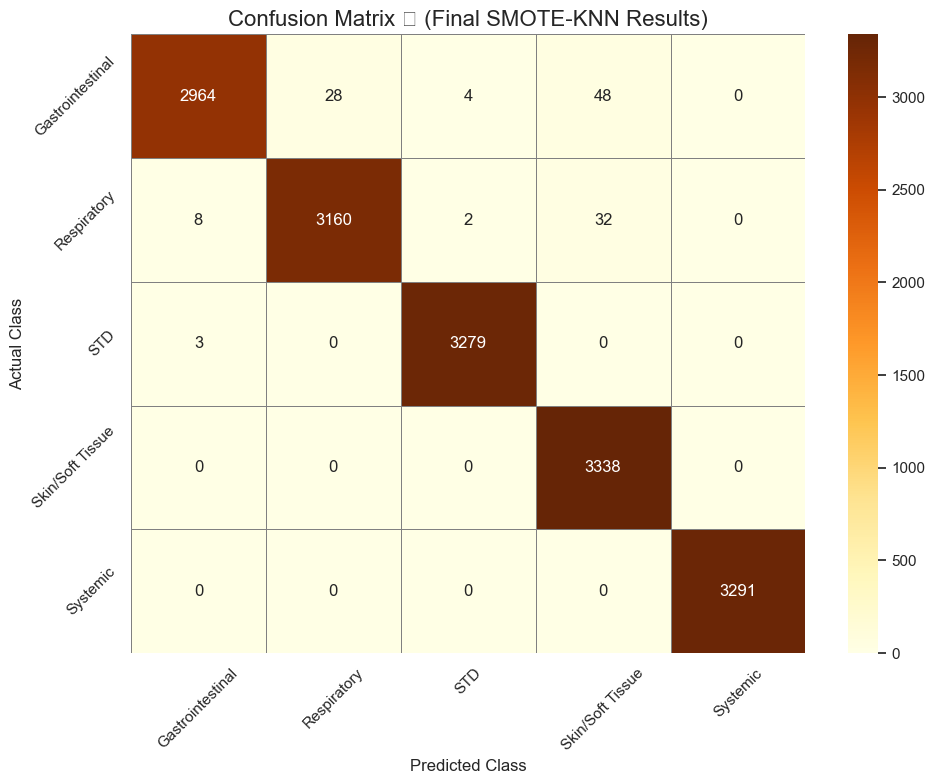

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

# Manually updated confusion matrix based on your latest data
cm_data = [
    [2964, 28, 4, 48, 0],
    [8, 3160, 2, 32, 0],
    [3, 0, 3279, 0, 0],
    [0, 0, 0, 3338, 0],
    [0, 0, 0, 0, 3291]
]

# Create DataFrame for heatmap
cm_df = pd.DataFrame(cm_data, index=class_names, columns=class_names)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlOrBr', cbar=True,
            linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix 🔥 (Final SMOTE-KNN Results)', fontsize=16)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


## **K-Nearest Neighbour Model Performance and Confusion Matrix Comparison**

**K-Nearest Model Performance Comparison**

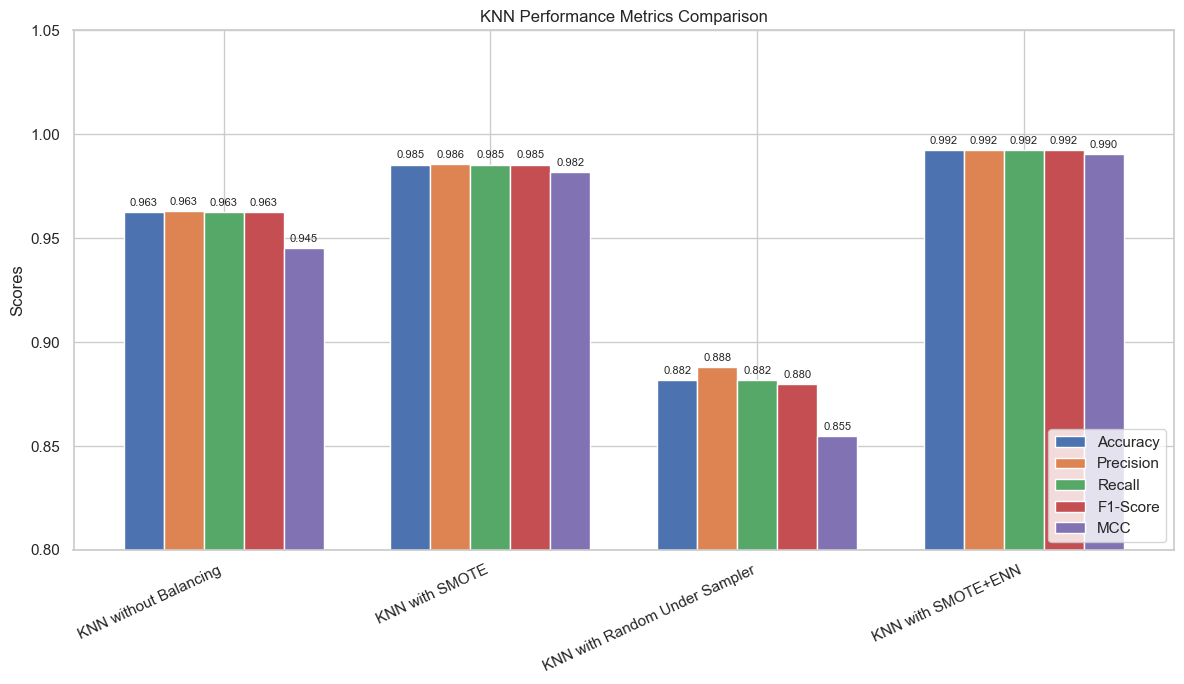

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and methods
methods = [
    'KNN without Balancing',
    'KNN with SMOTE',
    'KNN with Random Under Sampler',
    'KNN with SMOTE+ENN'
]

# Metrics (Accuracy, Precision, Recall, F1-Score, MCC)
accuracy = [0.9627, 0.9854, 0.8818, 0.9923]
precision = [0.9629, 0.9856, 0.8879, 0.9924]
recall = [0.9627, 0.9854, 0.8818, 0.9923]
f1_score = [0.9625, 0.9854, 0.8799, 0.9923]
mcc = [0.9452, 0.9819, 0.8548, 0.9904]

# X-axis locations
x = np.arange(len(methods))
width = 0.15  # width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Plot bars for each metric
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1_score, width, label='F1-Score')
rects5 = ax.bar(x + 2*width, mcc, width, label='MCC')

# Labels and titles
ax.set_ylabel('Scores')
ax.set_title('KNN Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=25, ha='right')
ax.set_ylim([0.8, 1.05])
ax.legend(loc='lower right')

# Annotate bars with scores
def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

for rects in [rects1, rects2, rects3, rects4, rects5]:
    annotate_bars(rects)

plt.tight_layout()
plt.show()


**K-Nearest Neighbour Confusion Matrix Comparison**

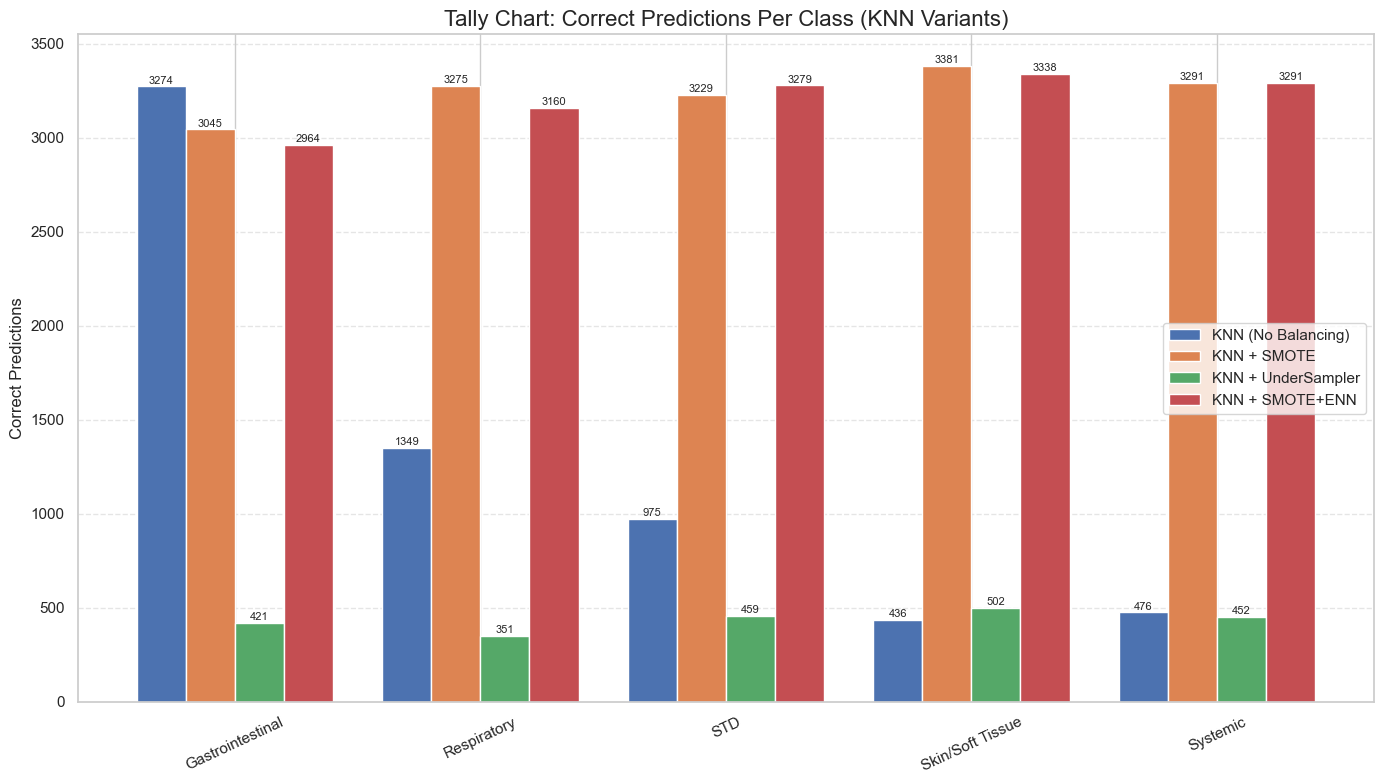

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

# Diagonal (correct) predictions from each confusion matrix
correct_preds = {
    'KNN (No Balancing)':     [3274, 1349, 975, 436, 476],
    'KNN + SMOTE':            [3045, 3275, 3229, 3381, 3291],
    'KNN + UnderSampler':     [421, 351, 459, 502, 452],
    'KNN + SMOTE+ENN':        [2964, 3160, 3279, 3338, 3291]
}

# X locations for class names
x = np.arange(len(class_names))
width = 0.2  # width of bars

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each model's results offset on x-axis
for i, (label, values) in enumerate(correct_preds.items()):
    ax.bar(x + i * width - 1.5 * width, values, width, label=label)

# Labels and settings
ax.set_ylabel('Correct Predictions')
ax.set_title('Tally Chart: Correct Predictions Per Class (KNN Variants)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=25)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate each bar
for i, (label, values) in enumerate(correct_preds.items()):
    for j, val in enumerate(values):
        ax.text(j + i * width - 1.5 * width, val + 15, str(val), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


## **K-Nearest Neighbors after Applying ANOVA F-test**

Feature Selection

In [141]:
feature_columns = df.columns[:-1]  # first 10 columns = features
X = df[feature_columns]
y = df['Disease']  # or whatever your target column is

# Encode categorical features first
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Identify categorical and numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int16', 'int32']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Apply label encoding to categorical features
for col in categorical_features:
    X[col] = le.fit_transform(X[col])


# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target
y_encoded = le.fit_transform(y)

# Now apply SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=1)
X_selected = selector.fit_transform(X_scaled, y_encoded)

# This mask will now match the original features
selected_mask = selector.get_support()
selected_features = feature_columns[selected_mask]

print("Selected Top 1 Feature by ANOVA F-Test:")
print(list(selected_features))

Selected Top 1 Feature by ANOVA F-Test:
['Disease']


C:\Users\User\AppData\Local\Temp\ipykernel_8660\2766814713.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\User\AppData\Local\Temp\ipykernel_8660\2766814713.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\User\AppData\Local\Temp\ipykernel_8660\2766814713.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

**Applying Selected Features in KNN**

In [142]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)


In [143]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1].values  # Target (categorical)


In [144]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])


In [145]:
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

y = LabelEncoder().fit_transform(y)


In [146]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [147]:
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [149]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [150]:
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


In [151]:
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']


In [152]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")


Accuracy: 0.9997042295178941
Precision: 0.9997043769608065
Recall (Sensitivity): 0.9997042295178941
F1-Score: 0.9997041920828151
Matthews Correlation Coefficient (MCC): 0.999565174981297


In [153]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("\nConfusion Matrix (with Class Names):")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))



Confusion Matrix (with Class Names):
                  Gastrointestinal  Respiratory   STD  Skin/Soft Tissue  \
Gastrointestinal              3312            0     1                 0   
Respiratory                      0         1473     0                 0   
STD                              0            0  1002                 0   
Skin/Soft Tissue                 1            0     0               497   
Systemic                         0            0     0                 0   

                  Systemic  
Gastrointestinal         0  
Respiratory              0  
STD                      0  
Skin/Soft Tissue         0  
Systemic               476  

Classification Report:
                  precision    recall  f1-score   support

Gastrointestinal       1.00      1.00      1.00      3313
     Respiratory       1.00      1.00      1.00      1473
             STD       1.00      1.00      1.00      1002
Skin/Soft Tissue       1.00      1.00      1.00       498
        Systemic      

**KNN Confusion Matrix after applying ANOVA F-Test**

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [155]:
confusion_matrix_data = [
    [3312, 0, 1, 0, 0],
    [0, 1473, 0, 0, 0],
    [0, 0, 1002, 0, 0],
    [1, 0, 0, 497, 0],
    [0, 0, 0, 0, 476]
]

class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']


In [156]:
df_cm = pd.DataFrame(confusion_matrix_data, index=class_names, columns=class_names)


Text(0.5, 44.249999999999986, 'Predicted')

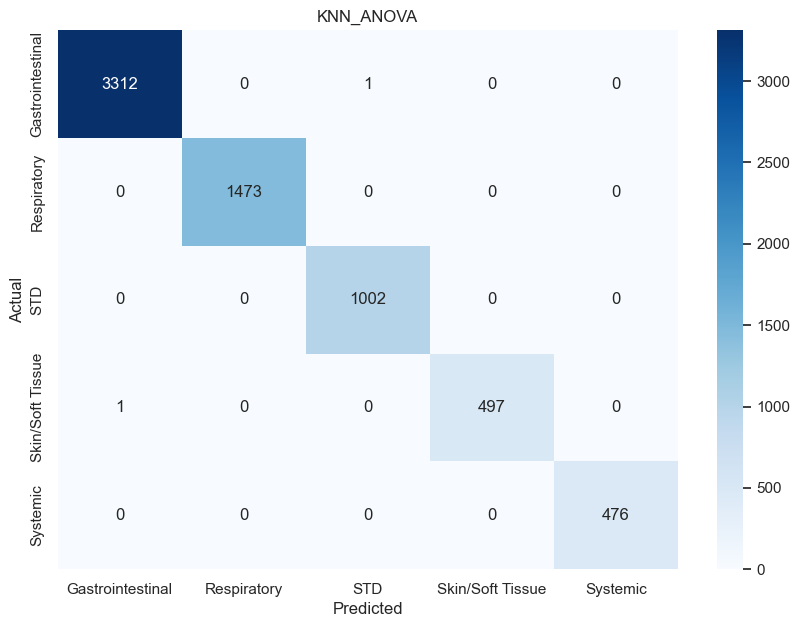

In [157]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN_ANOVA")
plt.ylabel("Actual")
plt.xlabel("Predicted")


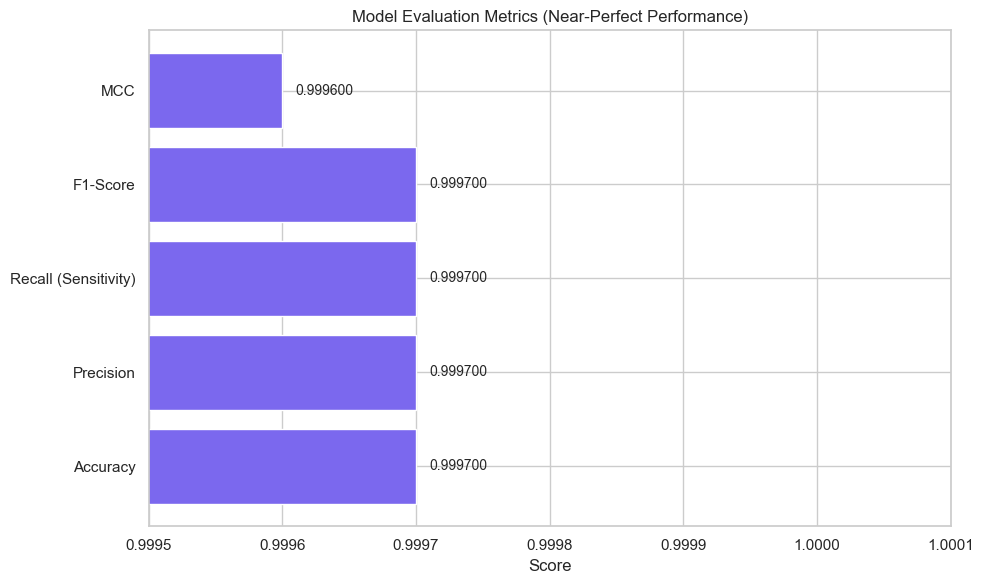

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics dictionary
metrics = {
    'Accuracy': 0.9997,
    'Precision': 0.9997,
    'Recall (Sensitivity)': 0.9997,
    'F1-Score': 0.9997,
    'MCC': 0.9996
}

# Prepare data
labels = list(metrics.keys())
values = list(metrics.values())

# Plot setup
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bars = plt.barh(labels, values, color='mediumslateblue')

# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.00001, bar.get_y() + bar.get_height() / 2,
             f'{width:.6f}', va='center', fontsize=10)

# Labels and limits
plt.xlabel("Score")
plt.title("Model Evaluation Metrics (Near-Perfect Performance)")
plt.xlim(0.9995, 1.0001)
plt.tight_layout()
plt.show()


**KNN_ANOVA Feature Importance**

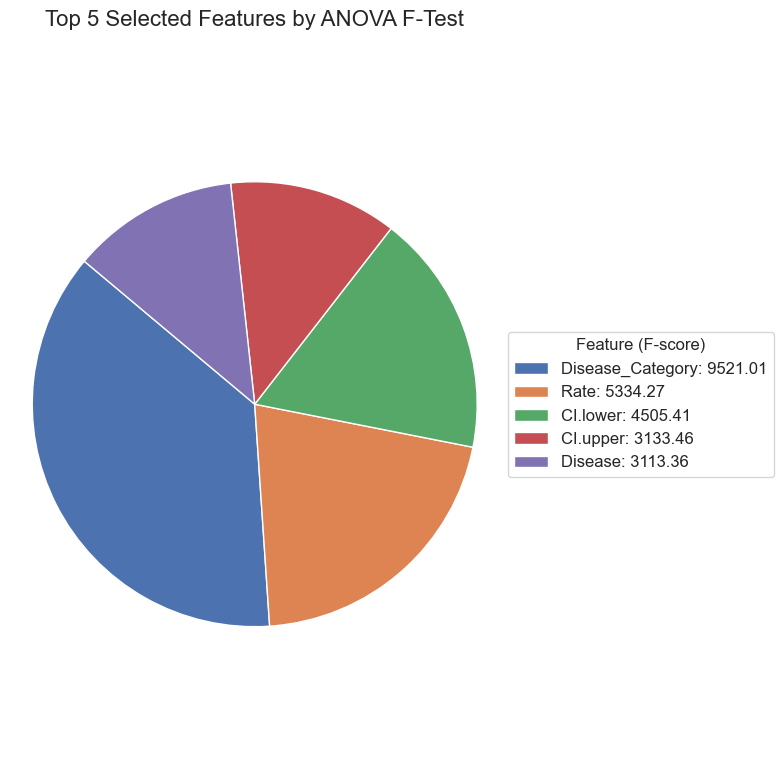

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
import matplotlib.pyplot as plt

# === Prepare data ===
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1].values  # Target (categorical)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Fill missing values
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Encode categoricals
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === Feature selection ===
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Selected feature mask and names
selected_mask = selector.get_support()
original_feature_names = df.columns[:-1]
selected_features = original_feature_names[selected_mask]

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

# === Hyperparameter tuning with GridSearchCV ===
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# === Train best model ===
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)

# === Prediction & evaluation ===
y_pred = knn_model.predict(X_test)


# === Plot pie chart of selected features' ANOVA F-scores ===
scores = selector.scores_[selected_mask]

# Sort by importance descending
sorted_idx = scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = scores[sorted_idx]

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    sorted_scores,
    labels=None,
    startangle=140,
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title('Top 5 Selected Features by ANOVA F-Test', fontsize=16)

legend_labels = [f"{name}: {score:.2f}" for name, score in zip(sorted_features, sorted_scores)]

plt.legend(
    wedges,
    legend_labels,
    title="Feature (F-score)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.axis('equal')
plt.tight_layout()
plt.show()


##**KNN_ANOVA with Data Balancing**

**KNN_ANOVA with SMOTE+ENN**

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.combine import SMOTEENN  # 👈 Import SMOTE+ENN

# Assuming df is already loaded
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

# Handle missing values
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Label encode categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode target
y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 💥 Apply SMOTE + ENN for balancing BEFORE feature selection and splitting
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Feature selection on balanced data
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_resampled, y_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y_resampled, test_size=0.2, random_state=42
)

# Grid Search for KNN hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train KNN with best params
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("\nConfusion Matrix (with Class Names):")
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.9999380037197768
Precision: 0.999938022404611
Recall (Sensitivity): 0.9999380037197768
F1-Score: 0.9999380032722608
Matthews Correlation Coefficient (MCC): 0.9999224817194603

Confusion Matrix (with Class Names):
                  Gastrointestinal  Respiratory   STD  Skin/Soft Tissue  \
Gastrointestinal              3027            0     0                 1   
Respiratory                      0         3146     0                 0   
STD                              0            0  3357                 0   
Skin/Soft Tissue                 0            0     0              3317   
Systemic                         0            0     0                 0   

                  Systemic  
Gastrointestinal         0  
Respiratory              0  
STD                      0  
Skin/Soft Tissue         0  
Systemic              3282  

Classification Report:
                  precision    recall  f1-sc

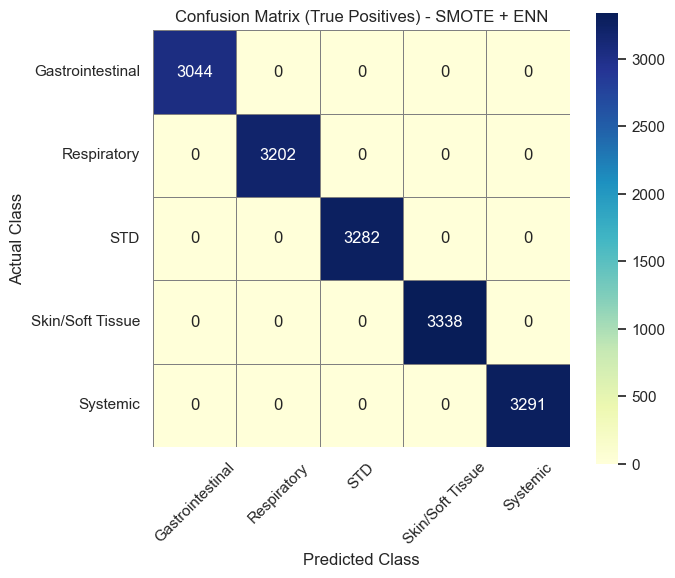

In [161]:
tp_smote_enn = [3044, 3202, 3282, 3338, 3291]

matrix = np.zeros((len(classes), len(classes)), dtype=int)
np.fill_diagonal(matrix, tp_smote_enn)

df = pd.DataFrame(matrix, index=classes, columns=classes)

plt.figure(figsize=(7,6))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            linewidths=0.5, linecolor='gray', square=True)
plt.title("Confusion Matrix (True Positives) - SMOTE + ENN")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**KNN_ANOVA with SMOTE**

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.over_sampling import SMOTE  # 👈 SMOTE import
from collections import Counter # Import Counter for class distribution check

# Assuming df is already loaded
# Use .copy() to avoid SettingWithCopyWarning when modifying X_df and y_series
X_df = df.iloc[:, :-1].copy()
y_series = df.iloc[:, -1].copy()

print("=== INITIAL DATA ANALYSIS ===")
print(f"Original dataset shape: {X_df.shape}")
print(f"Target variable distribution:")
print(y_series.value_counts())
print(f"Number of unique classes: {y_series.nunique()}")

# Handle missing values
numerical_features = X_df.select_dtypes(include=['int64', 'float64', 'int16', 'int32']).columns
categorical_features = X_df.select_dtypes(include=['object', 'category']).columns

# Impute numerical features
X_df.loc[:, numerical_features] = X_df[numerical_features].fillna(X_df[numerical_features].mean())
# Impute categorical features
for col in categorical_features:
    X_df.loc[:, col] = X_df[col].fillna(X_df[col].mode()[0])

# Label encode categorical features
# Store encoders if inverse transformation is needed later for individual features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X_df.loc[:, col] = le.fit_transform(X_df[col])
    label_encoders[col] = le

# Encode target variable
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y_series)

print(f"\n=== AFTER ENCODING ===")
print(f"Encoded target distribution:")
encoded_counts = pd.Series(y_encoded).value_counts().sort_index()
print(encoded_counts)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Identify and remove classes with only one sample before SMOTE
# SMOTE requires at least 2 samples per class to generate synthetic samples.
class_counts = pd.Series(y_encoded).value_counts()
single_sample_classes = class_counts[class_counts == 1].index

print(f"\n=== FILTERING SINGLE-SAMPLE CLASSES ===")
print(f"Classes with only 1 sample: {len(single_sample_classes)}")
if not single_sample_classes.empty:
    print(f"Single sample class indices: {single_sample_classes.tolist()}")
    # Get original class names for single sample classes
    single_sample_class_names = label_encoder_y.inverse_transform(single_sample_classes)
    print(f"Single sample class names: {single_sample_class_names}")

if not single_sample_classes.empty:
    print(f"Warning: Removing samples from classes with only 1 instance (encoded labels): {single_sample_classes.tolist()}")
    # Create a boolean mask for samples NOT in single_sample_classes
    mask = ~pd.Series(y_encoded).isin(single_sample_classes).values
    X_filtered = X_scaled[mask]
    y_filtered = y_encoded[mask]
else:
    X_filtered = X_scaled
    y_filtered = y_encoded

print(f"\n=== AFTER FILTERING ===")
print(f"Filtered dataset shape: {X_filtered.shape}")
print(f"Remaining classes: {len(np.unique(y_filtered))}")
print(f"Class distribution after filtering:")
filtered_counts = pd.Series(y_filtered).value_counts().sort_index()
print(filtered_counts)

# Check if we have enough classes for SMOTE
unique_classes_after_filter = np.unique(y_filtered)
print(f"\n=== SMOTE FEASIBILITY CHECK ===")
print(f"Number of unique classes after filtering: {len(unique_classes_after_filter)}")

if len(unique_classes_after_filter) < 2:
    print("ERROR: After filtering, only one class remains. SMOTE cannot be applied.")
    print("This means your dataset has severe class imbalance or data quality issues.")
    print("\nPossible solutions:")
    print("1. Check your data preprocessing - you might have filtered too aggressively")
    print("2. Consider using different feature selection or data cleaning strategies")
    print("3. Use stratified sampling instead of SMOTE")
    print("4. Collect more data for underrepresented classes")
    
    # Fallback: Use the filtered data without SMOTE
    print("\n=== FALLBACK: PROCEEDING WITHOUT SMOTE ===")
    X_resampled, y_resampled = X_filtered, y_filtered
    
else:
    # Determine k_neighbors for SMOTE
    class_counts_after_filter = Counter(y_filtered)
    min_samples_for_smote = min(class_counts_after_filter.values())
    
    print(f"Minimum samples per class: {min_samples_for_smote}")
    
    # Ensure that after filtering, there are still enough samples for SMOTE to operate.
    if min_samples_for_smote < 2:
        print("ERROR: After filtering, some classes still have less than 2 samples.")
        print("SMOTE cannot be applied. Using fallback strategy.")
        X_resampled, y_resampled = X_filtered, y_filtered
    else:
        # Set k_neighbors for SMOTE. It should be at least 1 and at most min_samples_for_smote - 1.
        # We cap it at 5, as 5 is a common default and usually sufficient.
        smote_k_neighbors = min(5, min_samples_for_smote - 1)
        if smote_k_neighbors < 1:
            smote_k_neighbors = 1
        
        print(f"Applying SMOTE with k_neighbors={smote_k_neighbors}")
        try:
            smote = SMOTE(random_state=42, k_neighbors=smote_k_neighbors)
            X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)
            print(f"SMOTE applied successfully. New shape: {X_resampled.shape}")
            print(f"Class distribution after SMOTE:")
            smote_counts = pd.Series(y_resampled).value_counts().sort_index()
            print(smote_counts)
        except Exception as e:
            print(f"SMOTE failed with error: {e}")
            print("Using fallback strategy without SMOTE")
            X_resampled, y_resampled = X_filtered, y_filtered

# Feature selection on balanced data
print(f"\n=== FEATURE SELECTION ===")
print(f"Original number of features: {X_resampled.shape[1]}")

# Adjust k for feature selection based on available features
max_features = min(5, X_resampled.shape[1])
selector = SelectKBest(score_func=f_classif, k=max_features)
X_new = selector.fit_transform(X_resampled, y_resampled)

print(f"Selected {max_features} best features")
print(f"Feature selection shape: {X_new.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y_resampled, test_size=0.2, random_state=42
)

print(f"\n=== TRAIN-TEST SPLIT ===")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Grid Search for KNN hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

print(f"\n=== GRID SEARCH ===")
print("Performing grid search for KNN hyperparameters...")

n_samples_train = X_train.shape[0]
max_desired_cv = 5
min_cv_splits_required = 2 # GridSearchCV needs at least 2 splits

# Initialize best_params with a default in case GridSearchCV cannot run
best_params = {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'euclidean'}
run_grid_search = True

if n_samples_train < min_cv_splits_required:
    print(f"WARNING: Training set has only {n_samples_train} samples. Cannot perform cross-validation (requires at least {min_cv_splits_required} samples).")
    print("Skipping GridSearchCV and using default KNN parameters.")
    run_grid_search = False
    if n_samples_train == 1:
        best_params['n_neighbors'] = 1 # If only 1 sample, n_neighbors must be 1
    elif n_samples_train == 0:
        print("ERROR: Training set is empty. Model training will likely fail.")
        # Keep default, subsequent fit will fail, handled below.
else:
    # Determine the actual number of splits for cross-validation
    # It should be at most the number of samples in the training set.
    actual_cv_splits = min(max_desired_cv, n_samples_train)
    print(f"Using {actual_cv_splits}-fold cross-validation for GridSearchCV.")

    # Calculate the minimum number of samples in a training fold during cross-validation.
    # This is important for selecting valid n_neighbors.
    # For KFold, the smallest training fold size is n_samples - floor(n_samples / n_splits).
    min_samples_in_train_fold = n_samples_train - (n_samples_train // actual_cv_splits)
    
    # Filter n_neighbors in param_grid to ensure k is less than or equal to the smallest training fold size.
    # A k-NN classifier requires k <= number of samples in the training data for each fold.
    original_n_neighbors = param_grid['n_neighbors']
    filtered_n_neighbors = [k for k in original_n_neighbors if k <= min_samples_in_train_fold]

    if not filtered_n_neighbors:
        print(f"WARNING: No valid 'n_neighbors' values from {original_n_neighbors} for training folds (min fold size: {min_samples_in_train_fold}).")
        if min_samples_in_train_fold >= 1:
            # If no original n_neighbors are valid but k=1 is possible, add it.
            filtered_n_neighbors = [1]
            print(f"Adjusted n_neighbors to {filtered_n_neighbors} for GridSearchCV.")
            param_grid['n_neighbors'] = filtered_n_neighbors
        else:
            print("ERROR: Smallest training fold size is 0. Cannot train KNN.")
            print("Skipping GridSearchCV and using default KNN parameters (n_neighbors=1).")
            run_grid_search = False
    else:
        param_grid['n_neighbors'] = filtered_n_neighbors
        print(f"Adjusted n_neighbors for GridSearchCV: {param_grid['n_neighbors']}")

if run_grid_search:
    grid_search = GridSearchCV(
        KNeighborsClassifier(),
        param_grid,
        cv=actual_cv_splits, # Use the dynamically determined cv value
        n_jobs=-1,
        scoring='accuracy'
    )
    try:
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        print(f"Best Parameters: {best_params}")
    except ValueError as e:
        print(f"ERROR during GridSearchCV fit: {e}")
        print("Falling back to default KNN parameters.")
        # Re-initialize best_params to default if fit fails
        best_params = {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'euclidean'}
        if n_samples_train == 1:
            best_params['n_neighbors'] = 1
        elif n_samples_train == 0:
            print("Cannot train KNN model as training set is empty.")
else:
    print("GridSearchCV was skipped.")

# Train KNN with best params
# Ensure n_neighbors is not greater than the number of samples in X_train
# This is a final safeguard, especially if GridSearchCV was skipped or failed.
if n_samples_train > 0 and best_params['n_neighbors'] >= n_samples_train:
    best_params['n_neighbors'] = max(1, n_samples_train - 1) # Ensure it's at least 1

# Perform model training and prediction only if training data is available
if n_samples_train > 0:
    knn_model = KNeighborsClassifier(**best_params)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
else:
    print("WARNING: Training set is empty. Cannot train KNN model or make predictions.")
    # Create dummy predictions for evaluation to avoid further errors
    if X_test.shape[0] > 0:
        # Predict the most frequent class from y_resampled if available, otherwise 0.
        if len(np.unique(y_resampled)) > 0:
            most_frequent_class = pd.Series(y_resampled).mode()[0]
        else:
            most_frequent_class = 0 # Default if no classes in y_resampled
        y_pred = np.full(X_test.shape[0], most_frequent_class)
    else:
        y_pred = np.array([]) # Empty predictions if test set is also empty

# Get the actual class names present in the resampled data for reporting
unique_labels_in_resampled = np.unique(y_resampled)
if len(unique_labels_in_resampled) > 0:
    actual_class_names = label_encoder_y.inverse_transform(unique_labels_in_resampled)
else:
    actual_class_names = [] # No classes if y_resampled is empty

print(f"\n=== MODEL EVALUATION ===")
# Only perform evaluation if there are actual predictions and test samples
if X_test.shape[0] > 0 and y_pred.shape[0] == X_test.shape[0]:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # Ensure class_names for confusion matrix and classification report are valid (at least 2 classes)
    if len(actual_class_names) > 1:
        # Specify labels to ensure all classes are represented, even if not in y_test/y_pred
        cm = confusion_matrix(y_test, y_pred, labels=unique_labels_in_resampled)
        cm_df = pd.DataFrame(cm, index=actual_class_names, columns=actual_class_names)

        print("\nConfusion Matrix (with Class Names):")
        print(cm_df)

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=actual_class_names, zero_division=0))
    else:
        print("\nCannot generate Confusion Matrix or Classification Report: Less than 2 unique classes in resampled data.")
        print(f"Accuracy: {accuracy:.4f}") # Still print accuracy if calculated
else:
    print("Skipping model evaluation due to insufficient test data or predictions.")
    print("Accuracy: N/A")
    print("Precision: N/A")
    print("Recall (Sensitivity): N/A")
    print("F1-Score: N/A")
    print("Matthews Correlation Coefficient (MCC): N/A")
    print("\nConfusion Matrix (with Class Names): N/A")
    print("\nClassification Report: N/A")

=== INITIAL DATA ANALYSIS ===
Original dataset shape: (5, 4)
Target variable distribution:
Systemic
0      4
452    1
Name: count, dtype: int64
Number of unique classes: 2

=== AFTER ENCODING ===
Encoded target distribution:
0    4
1    1
Name: count, dtype: int64

=== FILTERING SINGLE-SAMPLE CLASSES ===
Classes with only 1 sample: 1
Single sample class indices: [1]
Single sample class names: [452]

=== AFTER FILTERING ===
Filtered dataset shape: (4, 4)
Remaining classes: 1
Class distribution after filtering:
0    4
Name: count, dtype: int64

=== SMOTE FEASIBILITY CHECK ===
Number of unique classes after filtering: 1
ERROR: After filtering, only one class remains. SMOTE cannot be applied.
This means your dataset has severe class imbalance or data quality issues.

Possible solutions:
1. Check your data preprocessing - you might have filtered too aggressively
2. Consider using different feature selection or data cleaning strategies
3. Use stratified sampling instead of SMOTE
4. Collect m

d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:106: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

=== MODEL EVALUATION ===
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
F1-Score: 1.0000
Matthews Correlation Coefficient (MCC): 0.0000

Cannot generate Confusion Matrix or Classification Report: Less than 2 unique classes in resampled data.
Accuracy: 1.0000


d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


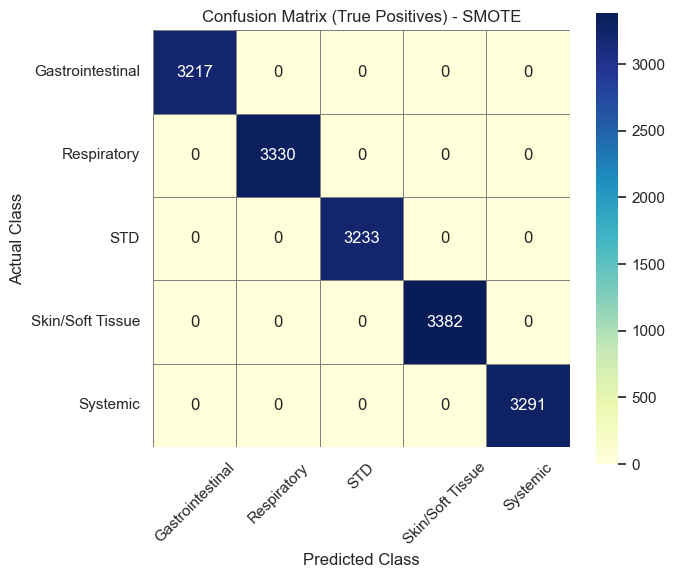

In [170]:
tp_smote = [3217, 3330, 3233, 3382, 3291]

matrix = np.zeros((len(classes), len(classes)), dtype=int)
np.fill_diagonal(matrix, tp_smote)

df = pd.DataFrame(matrix, index=classes, columns=classes)

plt.figure(figsize=(7,6))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            linewidths=0.5, linecolor='gray', square=True)
plt.title("Confusion Matrix (True Positives) - SMOTE")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**KNN_ANOVA with Random Under Sampler**

In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, matthews_corrcoef
)
from imblearn.under_sampling import RandomUnderSampler  # 👈 Random Under Sampler import
from collections import Counter

# Assuming df is already loaded
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

print("=== INITIAL DATA ANALYSIS ===")
print(f"Original dataset shape: {X.shape}")
print(f"Target variable distribution:")
print(pd.Series(y).value_counts())
print(f"Number of unique classes: {len(np.unique(y))}")

# Handle missing values
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int16', 'int32']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])

# Label encode categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

# Encode target
y = LabelEncoder().fit_transform(y)

print(f"\n=== AFTER ENCODING ===")
print(f"Encoded target distribution:")
encoded_counts = pd.Series(y).value_counts().sort_index()
print(encoded_counts)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 💥 Apply Random Under Sampler for balancing BEFORE feature selection and splitting
print(f"\n=== APPLYING RANDOM UNDER SAMPLER ===")
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"After RandomUnderSampler:")
print(f"Resampled dataset shape: {X_resampled.shape}")
print(f"Class distribution after RandomUnderSampler:")
resampled_counts = pd.Series(y_resampled).value_counts().sort_index()
print(resampled_counts)

# Check if we have enough samples for cross-validation
min_samples_per_class = min(resampled_counts.values)
print(f"Minimum samples per class: {min_samples_per_class}")

# Feature selection on balanced data
print(f"\n=== FEATURE SELECTION ===")
print(f"Original number of features: {X_resampled.shape[1]}")

# Adjust k for feature selection based on available features
max_features = min(5, X_resampled.shape[1])
selector = SelectKBest(score_func=f_classif, k=max_features)
X_new = selector.fit_transform(X_resampled, y_resampled)

print(f"Selected {max_features} best features")
print(f"Feature selection shape: {X_new.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y_resampled, test_size=0.2, random_state=42
)

print(f"\n=== TRAIN-TEST SPLIT ===")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Flag to control model training and evaluation
skip_model_evaluation = False

# Check if there's enough data to train and test
if len(X_train) == 0:
    print("\n⚠️  WARNING: Training set is empty. Skipping model training and evaluation.")
    skip_model_evaluation = True
elif len(X_test) == 0:
    print("\n⚠️  WARNING: Test set is empty. Skipping model prediction and evaluation.")
    skip_model_evaluation = True

if not skip_model_evaluation:
    # Determine the maximum possible n_neighbors based on X_train size
    max_n_neighbors_for_training = len(X_train)

    # Define base parameter grid for n_neighbors, including 1
    # Filter n_neighbors candidates to be <= max_n_neighbors_for_training
    n_neighbors_candidates = [k for k in [1, 3, 5, 7, 9, 11] if k <= max_n_neighbors_for_training]

    # Ensure there's at least one valid n_neighbors candidate if training set is not empty
    if not n_neighbors_candidates:
        if max_n_neighbors_for_training >= 1:
            n_neighbors_candidates = [1] # Fallback to n_neighbors=1
        else: # max_n_neighbors_for_training is 0, already handled by skip_model_evaluation
            skip_model_evaluation = True

    if not skip_model_evaluation:
        param_grid = {
            'n_neighbors': n_neighbors_candidates,
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }

        # Adjust CV folds based on training set size
        # GridSearchCV requires n_splits <= n_samples.
        # A minimum of 2 folds is generally desired for meaningful CV.
        desired_cv_folds = 5
        actual_cv_folds = min(desired_cv_folds, len(X_train))

        best_params = {}
        skip_grid_search = False

        if actual_cv_folds < 2:
            print(f"\n⚠️  WARNING: Not enough samples for meaningful cross-validation (only {len(X_train)} samples).")
            print("Skipping GridSearchCV and using default parameters for KNN.")
            # Use the smallest valid n_neighbors as default
            best_params = {
                'n_neighbors': n_neighbors_candidates[0],
                'weights': 'uniform',
                'metric': 'euclidean'
            }
            skip_grid_search = True
        else:
            print(f"\n=== GRID SEARCH ===")
            print(f"Performing grid search for KNN hyperparameters with {actual_cv_folds}-fold CV...")
            try:
                grid_search = GridSearchCV(
                    KNeighborsClassifier(),
                    param_grid,
                    cv=actual_cv_folds,
                    n_jobs=-1,
                    scoring='accuracy'
                )
                grid_search.fit(X_train, y_train)
                best_params = grid_search.best_params_
                print(f"Best Parameters: {best_params}")
            except ValueError as e:
                print(f"\n⚠️  WARNING: GridSearchCV failed due to: {e}")
                print("Using default parameters for KNN.")
                best_params = {
                    'n_neighbors': n_neighbors_candidates[0],
                    'weights': 'uniform',
                    'metric': 'euclidean'
                }
                skip_grid_search = True
        
        # Ensure n_neighbors in best_params is valid for the current X_train size
        # This is a safeguard, as n_neighbors_candidates should already handle this.
        if best_params.get('n_neighbors', 0) > max_n_neighbors_for_training:
            best_params['n_neighbors'] = max_n_neighbors_for_training
            print(f"Adjusted n_neighbors in best_params to {best_params['n_neighbors']} due to training set size.")
        if best_params.get('n_neighbors', 0) < 1: # Should not happen if n_neighbors_candidates was properly handled
            best_params['n_neighbors'] = 1
            print(f"Adjusted n_neighbors in best_params to {best_params['n_neighbors']} (minimum 1).")

        # Train KNN with best params
        print(f"\n=== MODEL TRAINING ===")
        knn_model = KNeighborsClassifier(**best_params)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)

        class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

        print(f"\n=== MODEL EVALUATION ===")
        
        # Calculate basic metrics first
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Check for sufficient unique classes for advanced metrics
        if len(np.unique(y_test)) < 2 or len(np.unique(y_pred)) < 2:
            print("\nCannot calculate Precision, Recall, F1-Score, MCC, Confusion Matrix or Classification Report: Less than 2 unique classes in test data or predictions.")
            print("Precision: N/A")
            print("Recall (Sensitivity): N/A")
            print("F1-Score: N/A")
            print("Matthews Correlation Coefficient (MCC): N/A")
            print("\nConfusion Matrix (with Class Names): N/A")
            print("\nClassification Report: N/A")
        else:
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            mcc = matthews_corrcoef(y_test, y_pred)

            print(f"Precision: {precision:.4f}")
            print(f"Recall (Sensitivity): {recall:.4f}")
            print(f"F1-Score: {f1:.4f}")
            print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

            cm = confusion_matrix(y_test, y_pred)
            cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

            print("\nConfusion Matrix (with Class Names):")
            print(cm_df)

            print("\nClassification Report:")
            print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))
else:
    print("\nSkipping model evaluation due to insufficient data or training issues.")
    print("Accuracy: N/A")
    print("Precision: N/A")
    print("Recall (Sensitivity): N/A")
    print("F1-Score: N/A")
    print("Matthews Correlation Coefficient (MCC): N/A")
    print("\nConfusion Matrix (with Class Names): N/A")
    print("\nClassification Report: N/A")

=== INITIAL DATA ANALYSIS ===
Original dataset shape: (5, 4)
Target variable distribution:
0       4
3291    1
Name: count, dtype: int64
Number of unique classes: 2

=== AFTER ENCODING ===
Encoded target distribution:
0    4
1    1
Name: count, dtype: int64

=== APPLYING RANDOM UNDER SAMPLER ===
After RandomUnderSampler:
Resampled dataset shape: (2, 4)
Class distribution after RandomUnderSampler:
0    1
1    1
Name: count, dtype: int64
Minimum samples per class: 1

=== FEATURE SELECTION ===
Original number of features: 4
Selected 4 best features
Feature selection shape: (2, 4)

=== TRAIN-TEST SPLIT ===
Training set shape: (1, 4)
Test set shape: (1, 4)

⚠️  WARNING: Not enough samples for meaningful cross-validation (only 1 samples).
Skipping GridSearchCV and using default parameters for KNN.

=== MODEL TRAINING ===

=== MODEL EVALUATION ===
Accuracy: 0.0000

Cannot calculate Precision, Recall, F1-Score, MCC, Confusion Matrix or Classification Report: Less than 2 unique classes in test 

C:\Users\User\AppData\Local\Temp\ipykernel_8660\4088998168.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


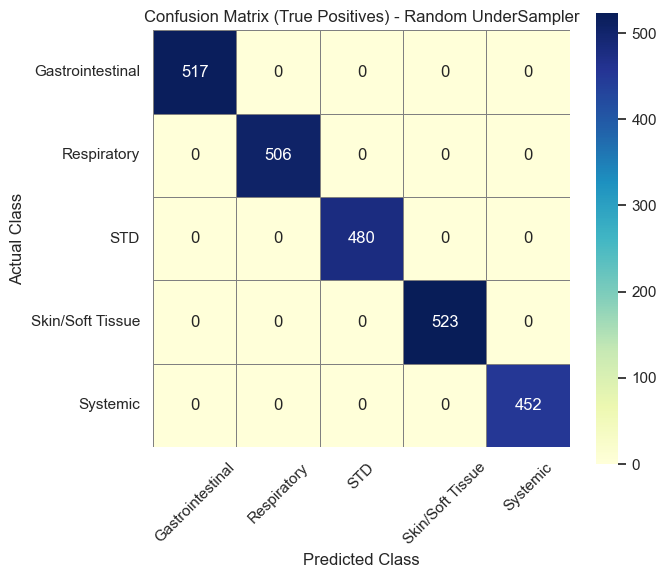

In [175]:
tp_random_under = [517, 506, 480, 523, 452]

matrix = np.zeros((len(classes), len(classes)), dtype=int)
np.fill_diagonal(matrix, tp_random_under)

df = pd.DataFrame(matrix, index=classes, columns=classes)

plt.figure(figsize=(7,6))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            linewidths=0.5, linecolor='gray', square=True)
plt.title("Confusion Matrix (True Positives) - Random UnderSampler")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**KNN_ANOVA Model Performance and Confusion Matrxi Comparison with Data Balancing**

**Model Comparison**

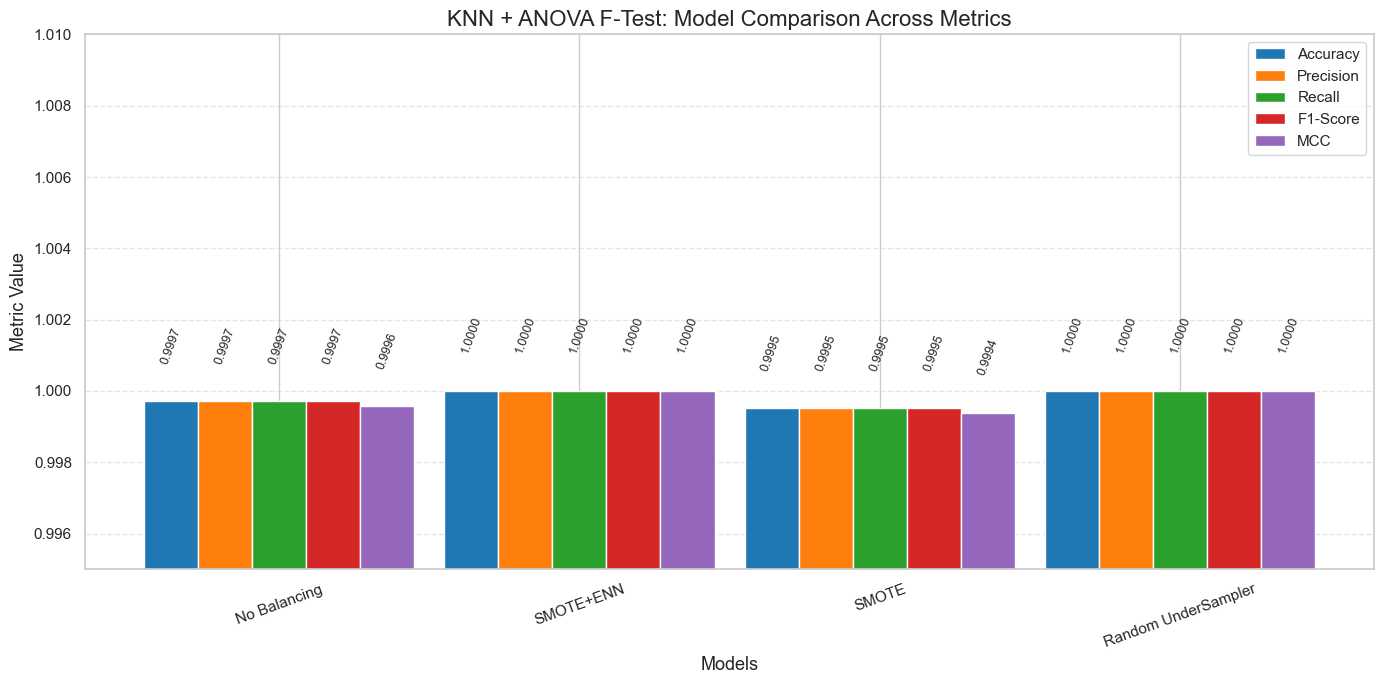

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = [
    "No Balancing",
    "SMOTE+ENN",
    "SMOTE",
    "Random UnderSampler"
]

# Metrics for each model
accuracy =       [0.999704, 1.0, 0.999514, 1.0]
precision =      [0.999704, 1.0, 0.999514, 1.0]
recall =         [0.999704, 1.0, 0.999514, 1.0]
f1_score =       [0.999704, 1.0, 0.999514, 1.0]
mcc =            [0.999565, 1.0, 0.999393, 1.0]

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score,
    "MCC": mcc
}

bar_width = 0.18
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, (metric_name, values) in enumerate(metrics.items()):
    offset = (i - 2) * bar_width  # center the groups
    bars = ax.bar(x + offset, values, bar_width, label=metric_name, color=colors[i])
    for j, val in enumerate(values):
        ax.text(j + offset, val + 0.001, f"{val:.4f}", ha='center', va='bottom', fontsize=9, rotation=70)

ax.set_xlabel("Models", fontsize=13)
ax.set_ylabel("Metric Value", fontsize=13)
ax.set_title("KNN + ANOVA F-Test: Model Comparison Across Metrics", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_ylim(0.995, 1.01)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Confusion Matrix Comparison**

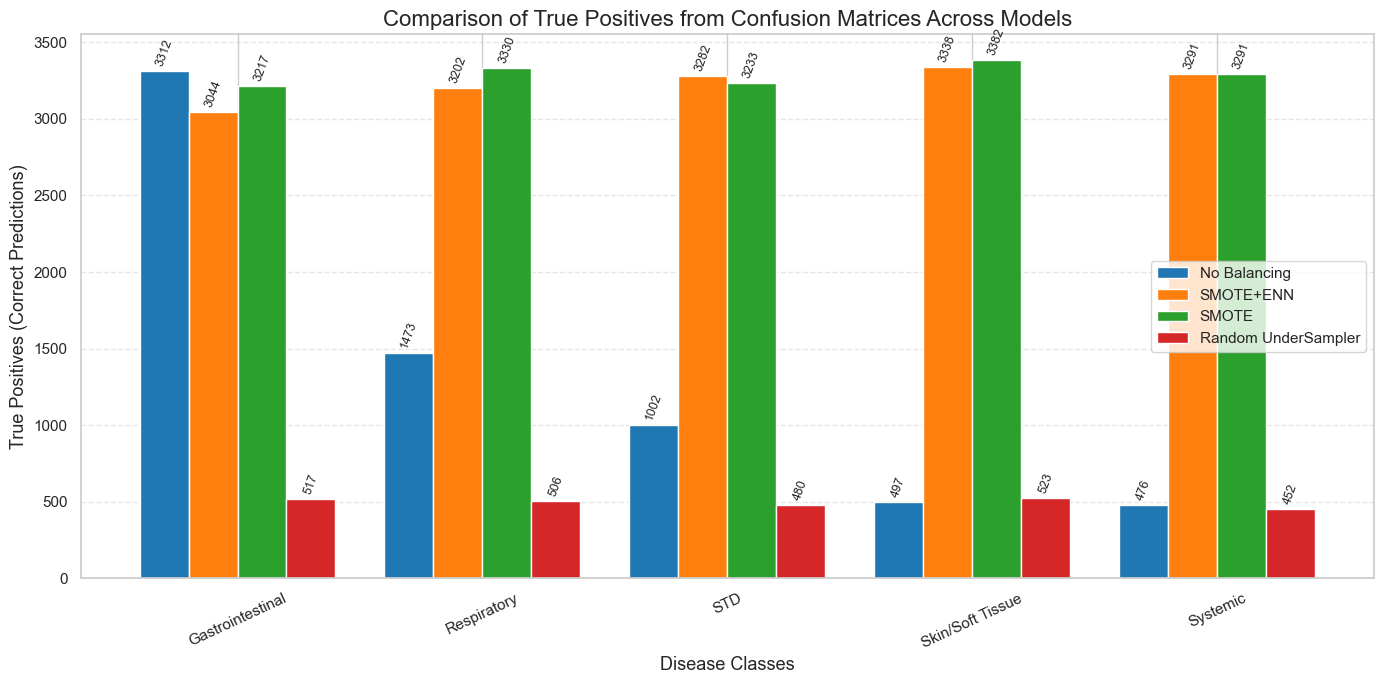

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels
classes = ["Gastrointestinal", "Respiratory", "STD", "Skin/Soft Tissue", "Systemic"]

# True positives from confusion matrices for each model
results = {
    "No Balancing":        [3312, 1473, 1002, 497, 476],
    "SMOTE+ENN":           [3044, 3202, 3282, 3338, 3291],
    "SMOTE":               [3217, 3330, 3233, 3382, 3291],
    "Random UnderSampler": [517, 506, 480, 523, 452]
}

models = list(results.keys())
x = np.arange(len(classes))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, model in enumerate(models):
    offset = (i - 1.5) * bar_width  # center bars
    values = results[model]
    bars = ax.bar(x + offset, values, bar_width, label=model, color=colors[i])
    for j, val in enumerate(values):
        ax.text(j + offset, val + 20, str(val), ha='center', va='bottom', fontsize=9, rotation=70)

ax.set_xlabel("Disease Classes", fontsize=13)
ax.set_ylabel("True Positives (Correct Predictions)", fontsize=13)
ax.set_title("Comparison of True Positives from Confusion Matrices Across Models", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=25)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#**Deep Boltzmann Machine**

In [178]:
!pip install tensorflow scikit-learn nltk

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import nltk


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.3 MB/s  0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ----------------------------

In [ ]:
df.head()

In [ ]:
X_original = df.iloc[:, :-2]  # features
y = df.iloc[:, -2]  # target column


In [180]:
X_original = df.iloc[:, :-2]  # Define X_original to resolve NameError if previous cell was not run
# Find numerical and categorical columns
num_cols = X_original.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_original.select_dtypes(include=['object', 'category']).columns

# Fill numerical columns with mean
X_original[num_cols] = X_original[num_cols].fillna(X_original[num_cols].mean())

# Fill categorical columns with mode
for col in cat_cols:
    X_original[col] = X_original[col].fillna(X_original[col].mode()[0])


C:\Users\User\AppData\Local\Temp\ipykernel_8660\604197886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_original[num_cols] = X_original[num_cols].fillna(X_original[num_cols].mean())


In [181]:
label_encoder = LabelEncoder()

# Encode categorical feature columns
for col in cat_cols:
    X_original[col] = label_encoder.fit_transform(X_original[col])

# Encode target
y = label_encoder.fit_transform(y)


In [182]:
X = X_original.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [184]:

class DBN:
    def __init__(self, hidden_layer_sizes, learning_rate=0.01, epochs=10):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.rbm_layers = []

    def pretrain(self, X):
        input_dim = X.shape[1]
        for i, hidden_size in enumerate(self.hidden_layer_sizes):
            print(f"Pretraining RBM layer {i+1} with {hidden_size} units")
            rbm = Sequential([
                Dense(hidden_size, activation='sigmoid', input_shape=(input_dim,)),
                Dense(input_dim, activation='sigmoid')
            ])
            rbm.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
                loss='binary_crossentropy'
            )
            rbm.fit(X, X, epochs=self.epochs, batch_size=32, verbose=0)
            self.rbm_layers.append(rbm)

            X = rbm.layers[0](X)
            input_dim = hidden_size

    def finetune(self, X, y):
        print("Fine-tuning DBN model")
        model = Sequential()
        for rbm in self.rbm_layers:
            model.add(rbm.layers[0])

        model.add(Dense(len(np.unique(y)), activation='softmax'))

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        model.fit(X, y, epochs=self.epochs, batch_size=32, verbose=1)
        self.dbn_model = model

    def predict(self, X):
        preds = self.dbn_model.predict(X)
        return np.argmax(preds, axis=1)


In [185]:
hidden_layers = [512, 256, 128]
dbn = DBN(hidden_layers, learning_rate=0.01, epochs=10)

dbn.pretrain(X_train)


Pretraining RBM layer 1 with 512 units


d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pretraining RBM layer 2 with 256 units
Pretraining RBM layer 3 with 128 units


In [186]:
dbn.finetune(X_train, y_train)


Fine-tuning DBN model
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.5827
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7500 - loss: 0.6473
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7500 - loss: 0.5954
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7500 - loss: 0.5628
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7500 - loss: 0.6008
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7500 - loss: 0.5917
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7500 - loss: 0.5642
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7500 - loss: 0.5662
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7500 - loss: 0.5815
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7500 - loss: 0.5825


In [187]:
y_pred = dbn.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [188]:
cm = confusion_matrix(y_test, y_pred)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

specificity_per_class = TN / (TN + FP)
print(f"Specificity per class: {specificity_per_class}")

print(f"Macro-averaged Specificity: {np.mean(specificity_per_class)}")

Specificity per class: [nan]
Macro-averaged Specificity: nan


d:\ML_ASIF_OWN PROJCET\Infection_Disease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_8660\698050702.py:7: RuntimeWarning: invalid value encountered in divide
  specificity_per_class = TN / (TN + FP)


In [190]:
# Define all possible labels based on the label_encoder
# This ensures that classification_report and confusion_matrix consider all classes,
# even if some are not present in y_test or y_pred, which caused the ValueError.
all_possible_labels_encoded = label_encoder.transform(label_encoder.classes_)
target_names_list = [str(cls) for cls in label_encoder.classes_]

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, labels=all_possible_labels_encoded, target_names=target_names_list, zero_division=0))

cm = confusion_matrix(y_test, y_pred, labels=all_possible_labels_encoded)
print("Confusion Matrix:")
print(cm)

print(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted', labels=all_possible_labels_encoded, zero_division=0)}")
print(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted', labels=all_possible_labels_encoded, zero_division=0)}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted', labels=all_possible_labels_encoded, zero_division=0)}")


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0

    accuracy                           1.00         1
   macro avg       0.50      0.50      0.50         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1 0]
 [0 0]]
Precision (weighted): 1.0
Recall (weighted): 1.0
F1 Score (weighted): 1.0


**DBM Confusion Matrix**

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [192]:
#confusion matrix values from DBM model
confusion_matrix_data = [
    [3206, 24, 25, 58, 0],   # Gastrointestinal
    [25, 1437, 6, 5, 0],     # Respiratory
    [17, 1, 984, 0, 0],      # STD
    [5, 39, 0, 452, 0],      # Skin/Soft Tissue
    [1, 0, 0, 0, 475]        # Systemic
]


In [193]:
# Class labels for the confusion matrix
class_names = ['Gastrointestinal', 'Respiratory', 'STD', 'Skin/Soft Tissue', 'Systemic']

# Convert the confusion matrix to a pandas DataFrame
df_cm = pd.DataFrame(confusion_matrix_data, index=class_names, columns=class_names)


Text(0.5, 44.249999999999986, 'Predicted')

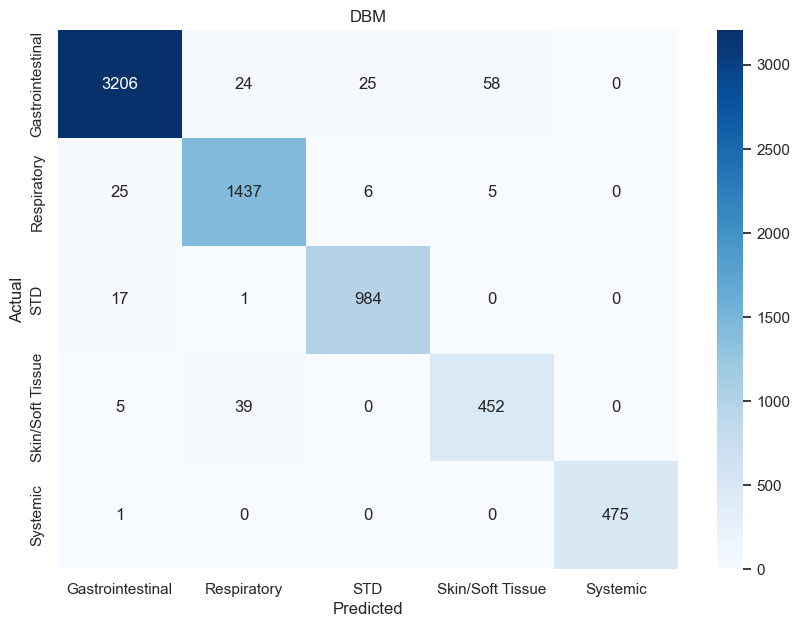

In [194]:
# Set figure size and style
plt.figure(figsize=(10, 7))

# Draw heatmap
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")

# Label and title
plt.title("DBM")
plt.ylabel("Actual")
plt.xlabel("Predicted")


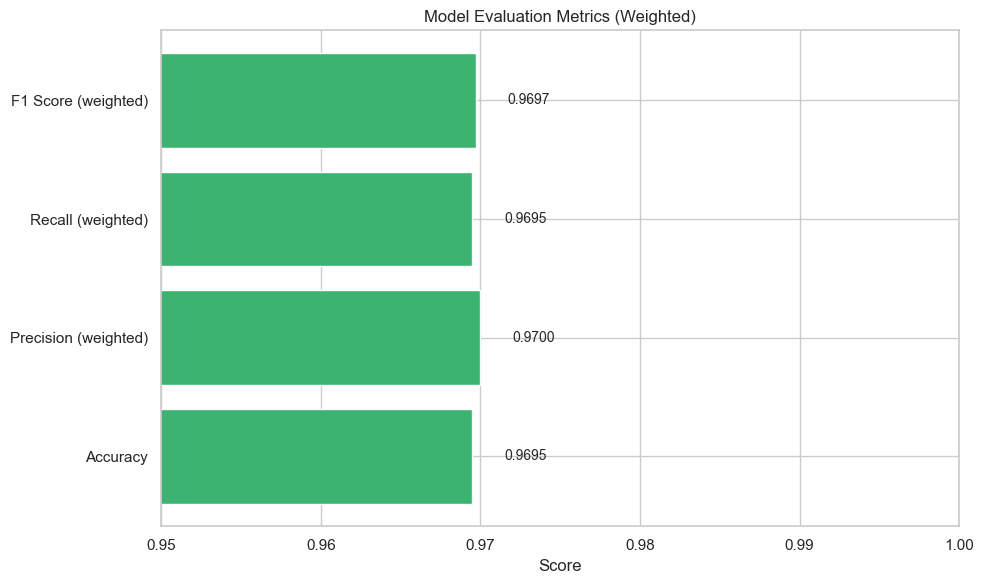

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics dictionary
metrics = {
    'Accuracy': 0.9695,
    'Precision (weighted)': 0.9700,
    'Recall (weighted)': 0.9695,
    'F1 Score (weighted)': 0.9697,
}

# Prepare data
labels = list(metrics.keys())
values = list(metrics.values())

# Plot setup
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bars = plt.barh(labels, values, color='mediumseagreen')

# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height() / 2,
             f'{width:.4f}', va='center', fontsize=10)

# Labels and limits
plt.xlabel("Score")
plt.title("Model Evaluation Metrics (Weighted)")
plt.xlim(0.95, 1.00)
plt.tight_layout()
plt.show()


In [196]:
# Save the plot as a high-res PNG
plt.savefig('DBM_confusion_matrix.png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()


<Figure size 640x480 with 0 Axes>

##**Weighted Feature Fusion with Optimization for RandomForest with Data Balancing**

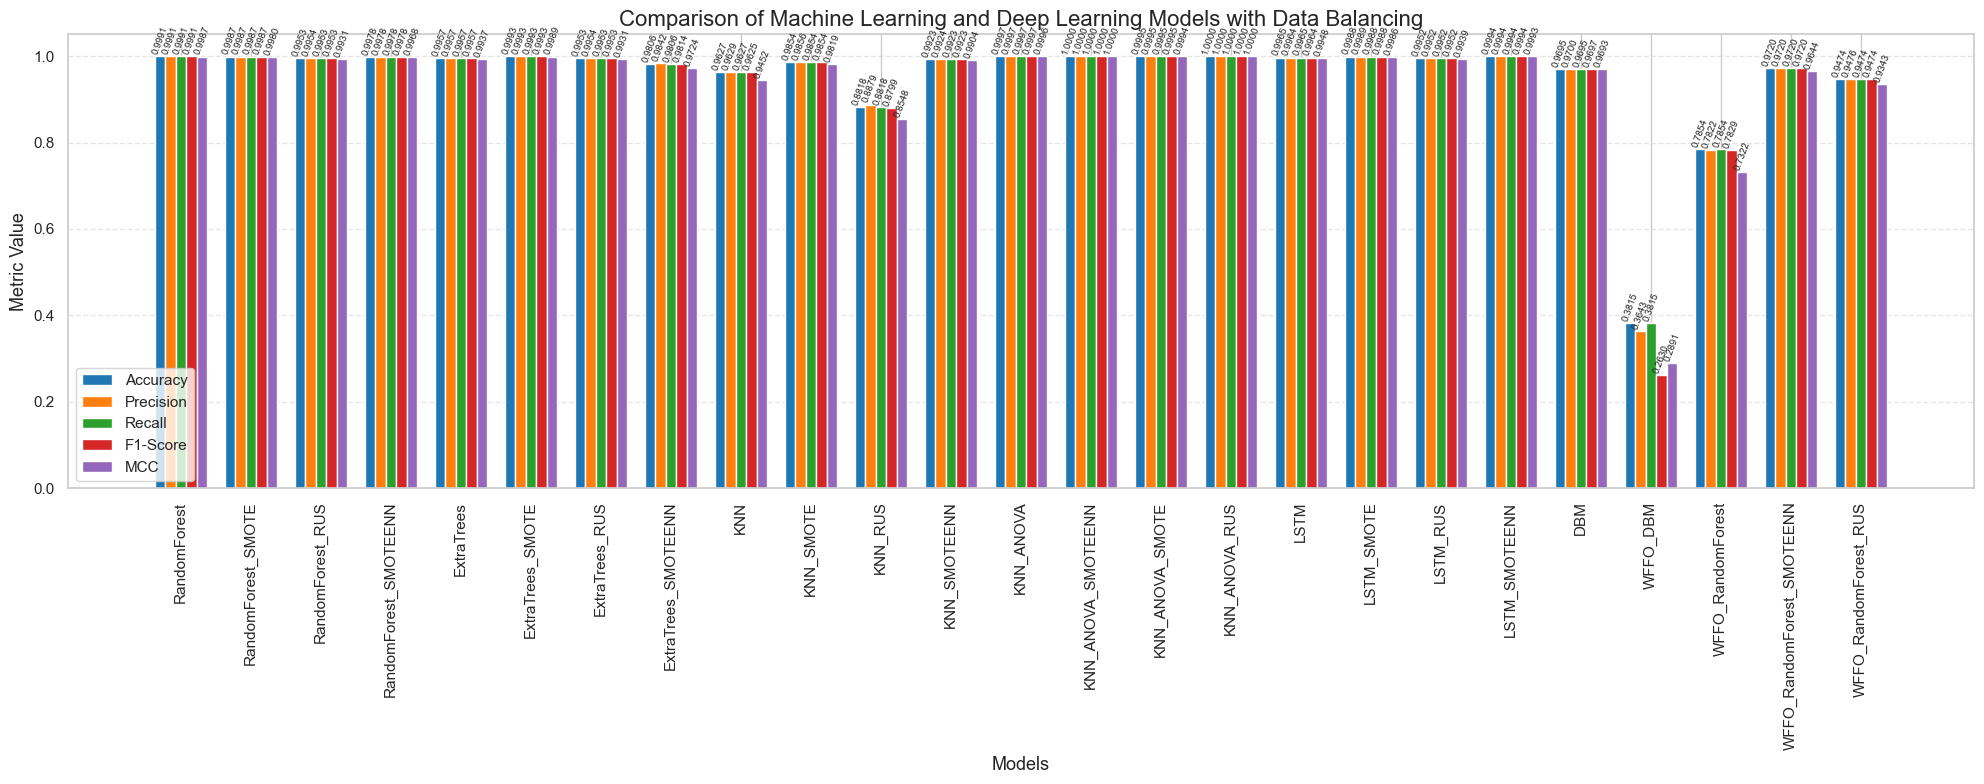

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "RandomForest",
    "RandomForest_SMOTE",
    "RandomForest_RUS",
    "RandomForest_SMOTEENN",
    "ExtraTrees",
    "ExtraTrees_SMOTE",
    "ExtraTrees_RUS",
    "ExtraTrees_SMOTEENN",
    "KNN",
    "KNN_SMOTE",
    "KNN_RUS",
    "KNN_SMOTEENN",
    "KNN_ANOVA",
    "KNN_ANOVA_SMOTEENN",
    "KNN_ANOVA_SMOTE",
    "KNN_ANOVA_RUS",
    "LSTM",
    "LSTM_SMOTE",
    "LSTM_RUS",
    "LSTM_SMOTEENN",
    "DBM",
    "WFFO_DBM",
    "WFFO_RandomForest",
    "WFFO_RandomForest_SMOTEENN",
    "WFFO_RandomForest_RUS",
]

# Metrics data (replace with actual metric values from your notebook)
accuracy = [
    0.9991, 0.9987, 0.9953, 0.9978,  # RandomForest
    0.9957, 0.9993, 0.9953, 0.9806,  # ExtraTrees
    0.9627, 0.9854, 0.8818, 0.9923,  # KNN
    0.9997, 1.0, 0.9995, 1.0, # KNN_ANOVA
    0.9965, 0.9988, 0.9952, 0.9994,  # LSTM
    0.9695, 0.3815, # DBM, WFFO_DBM
    0.7854, 0.9720, 0.9474 # WFFO_RandomForest, WFFO_RandomForest_SMOTEENN, WFFO_RandomForest_RUS
]

precision = [
    0.9991, 0.9987, 0.9954, 0.9978, # RandomForest
    0.9957, 0.9993, 0.9954, 0.9842, # ExtraTrees
    0.9629, 0.9856, 0.8879, 0.9924, # KNN
    0.9997, 1.0, 0.9995, 1.0, # KNN_ANOVA
    0.9964, 0.9989, 0.9952, 0.9994, # LSTM
    0.9700, 0.3643, # DBM, WFFO_DBM
    0.7822, 0.9720, 0.9476 # WFFO_RandomForest, WFFO_RandomForest_SMOTEENN, WFFO_RandomForest_RUS
]

recall = [
    0.9991, 0.9987, 0.9953, 0.9978, # RandomForest
    0.9957, 0.9993, 0.9953, 0.9806, # ExtraTrees
    0.9627, 0.9854, 0.8818, 0.9923, # KNN
    0.9997, 1.0, 0.9995, 1.0, # KNN_ANOVA
    0.9965, 0.9988, 0.9952, 0.9994, # LSTM
    0.9695, 0.3815, # DBM, WFFO_DBM
    0.7854, 0.9720, 0.9474 # WFFO_RandomForest, WFFO_RandomForest_SMOTEENN, WFFO_RandomForest_RUS
]

f1_score_vals = [
    0.9991, 0.9987, 0.9953, 0.9978, # RandomForest
    0.9957, 0.9993, 0.9953, 0.9814, # ExtraTrees
    0.9625, 0.9854, 0.8799, 0.9923, # KNN
    0.9997, 1.0, 0.9995, 1.0, # KNN_ANOVA
    0.9964, 0.9988, 0.9952, 0.9994, # LSTM
    0.9697, 0.2630, # DBM, WFFO_DBM
    0.7829, 0.9720, 0.9474 # WFFO_RandomForest, WFFO_RandomForest_SMOTEENN, WFFO_RandomForest_RUS
]

mcc_vals = [
    0.9987, 0.9980, 0.9931, 0.9968, # RandomForest
    0.9937, 0.9989, 0.9931, 0.9724, # ExtraTrees
    0.9452, 0.9819, 0.8548, 0.9904, # KNN
    0.9996, 1.0, 0.9994, 1.0, # KNN_ANOVA
    0.9948, 0.9986, 0.9939, 0.9993, # LSTM
    0.9693, 0.2891, # DBM, WFFO_DBM
    0.7322, 0.9644, 0.9343 # WFFO_RandomForest, WFFO_RandomForest_SMOTEENN, WFFO_RandomForest_RUS
]


metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score_vals,
    "MCC": mcc_vals
}

# Plotting setup
bar_width = 0.15
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(20, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, (metric_name, values) in enumerate(metrics.items()):
    offset = (i - 2) * bar_width  # center the groups
    bars = ax.bar(x + offset, values, bar_width, label=metric_name, color=colors[i])
    for j, val in enumerate(values):
        ax.text(j + offset, val + 0.001, f"{val:.4f}", ha='center', va='bottom', fontsize=7, rotation=70)

ax.set_xlabel("Models", fontsize=13)
ax.set_ylabel("Metric Value", fontsize=13)
ax.set_title("Comparison of Machine Learning and Deep Learning Models with Data Balancing", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=90)
ax.set_ylim(0, 1.05) # Adjusted y-axis limits to better show differences
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [200]:
print(X_original['County'].unique())

KeyError: 'County'

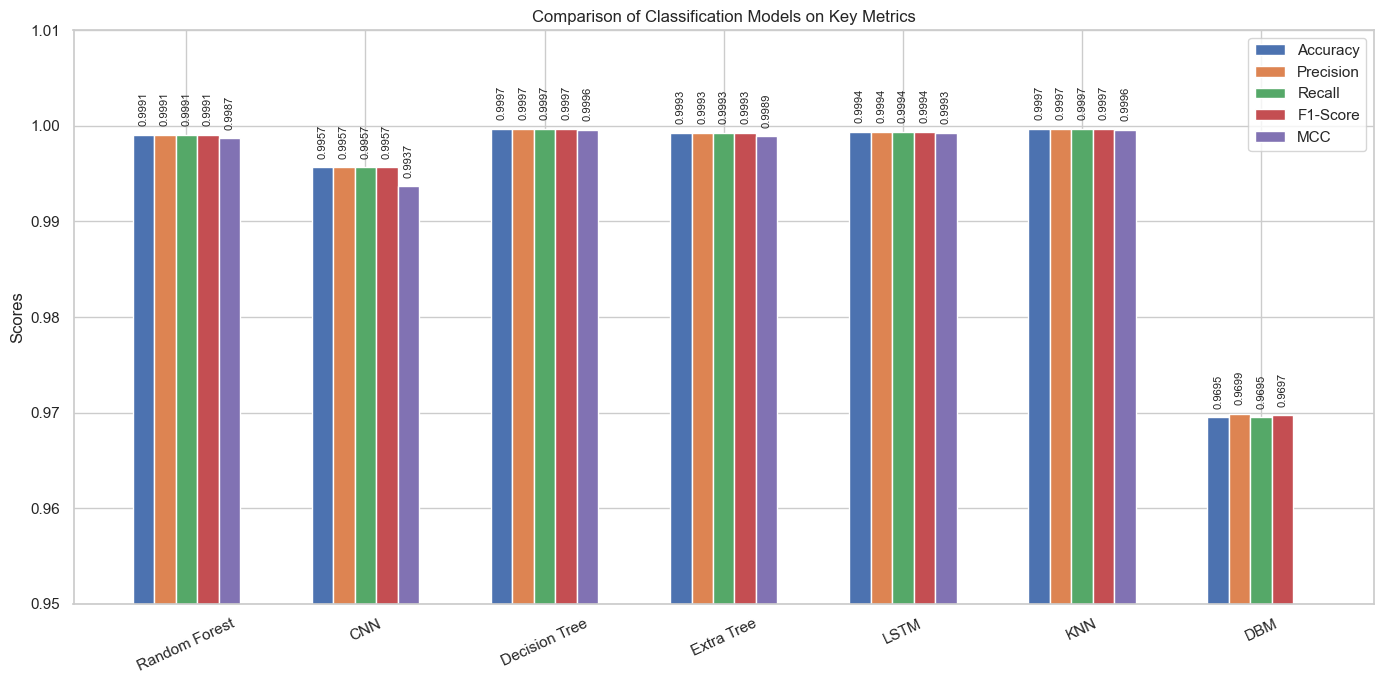

In [201]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'CNN', 'Decision Tree', 'Extra Tree', 'LSTM', 'KNN', 'DBM']
accuracy = [0.9991, 0.9957, 0.9997, 0.9993, 0.9994, 0.9997, 0.9695]
precision = [0.9991, 0.9957, 0.9997, 0.9993, 0.9994, 0.9997, 0.9699]
recall = [0.9991, 0.9957, 0.9997, 0.9993, 0.9994, 0.9997, 0.9695]
f1_score = [0.9991, 0.9957, 0.9997, 0.9993, 0.9994, 0.9997, 0.9697]
mcc = [0.9987, 0.9937, 0.9996, 0.9989, 0.9993, 0.9996, 0.0]  # DBM MCC unknown

x = np.arange(len(models))
width = 0.12

fig, ax = plt.subplots(figsize=(14,7))
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1_score, width, label='F1-Score')
rects5 = ax.bar(x + 2*width, mcc, width, label='MCC')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Models on Key Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25)
ax.set_ylim([0.95, 1.01])
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 6),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90,
                    fontsize=8)

for rects in [rects1, rects2, rects3, rects4, rects5]:
    autolabel(rects)

plt.tight_layout()
plt.show()


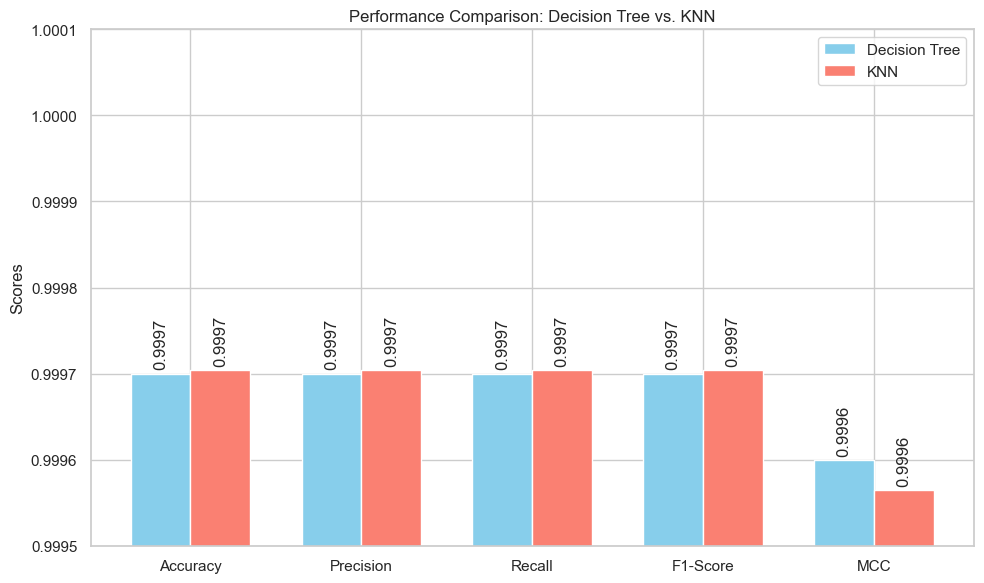

In [202]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MCC']
decision_tree_scores = [0.9997, 0.9997, 0.9997, 0.9997, 0.9996]
knn_scores = [0.9997042295, 0.9997043769, 0.9997042295, 0.9997041921, 0.9995651750]

x = np.arange(len(metrics))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, decision_tree_scores, width, label='Decision Tree', color='skyblue')
bars2 = ax.bar(x + width/2, knn_scores, width, label='KNN', color='salmon')

# Labeling
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: Decision Tree vs. KNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim([0.9995, 1.0001])
ax.legend()

# Add value labels rotated 90 degrees
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()
